<span style="font-size:32px;">**RNN-LSTM: A Deep Learning Approach for Sugarcane Yield Prediction**</span><br>
<span style="font-size:24px;">**Leveraging Meteorological Data for Optimized Yield Forecasting**</span>

# Flowchart

<details>
<summary><b>Logic Workflow Representation</b></summary>

```plaintext
START
  |
  v
IMPORT LIBRARIES
  |
  +--> pandas (pd): For data manipulation (Excel, filtering, etc.)
  +--> numpy (np): For numerical operations and arrays
  +--> tensorflow (tf): For building and training the RNN-LSTM model
  +--> sklearn: For evaluating model performance (MAE, MSE, R²)
  +--> optuna: For hyperparameter optimization
  |
  v
LOAD SEASON HISTORY RECORDS
  |
  +--> Read Excel File into DataFrame
  |       - Use `pd.read_excel()` to load the data.
  |
  v
FILTER SEASON HISTORY DATA
  |
  +--> Filter rows based on:
  |       - Season between 2017 and 2023
  |       - Met Site "Union AWS"
  |       - Yield (TCH) > 0
  |
  v
KEEP RELEVANT COLUMNS
  |
  +--> Select necessary columns:
  |       - "Area", "Field", "Season", "Variety", "Irrigation Type", "Cane Class", 
  |         "Grow Start Date", "Actual Cut Date", "Met Site", "Yield (TCH)", 
  |         "Land Type/ Agroclimatic Zone", "Altitude (m)", "Clay %", "Soil Type", 
  |         "Soil Family", "Soil Group", "Soil Phase", "Soil Texture", "Last Planted", 
  |         "Total available moisture"
  |
  v
REMOVE MISSING VALUES
  |
  +--> Drop rows with missing values in specified columns
  |
  v
DISPLAY SAMPLE DATA
  |
  +--> Display 20 random rows from the cleaned DataFrame
  |
  v
LOAD METEOROLOGICAL DATA
  |
  +--> Read Excel File into DataFrame
  |       - Use `pd.read_excel()` to load the meteorological data.
  |
  v
FILTER METEOROLOGICAL DATA
  |
  +--> Filter rows based on:
  |       - Meteorological Site "Union AWS"
  |       - Date > November 20, 2015
  |
  v
KEEP RELEVANT METEOROLOGICAL COLUMNS
  |
  +--> Select relevant meteorological variables:
  |       - "Date", "Evapotranspiration", "Rainfall", "Maximum temperature", 
  |         "Minimum temperature", "Radiation", "Maximum relative humidity", 
  |         "Minimum relative humidity", "Wind", "Sunhours"
  |
  v
DISPLAY SAMPLE METEOROLOGICAL DATA
  |
  +--> Display 20 random rows from the meteorological DataFrame
  |
  v
PROCESS MISSING DATA IN METEOROLOGICAL DATA
  |
  +--> Replace NaN values in meteorological columns with the mean of the current or previous years (up to 4 years)
  |       - Track replacement counts for each year and column
  |
  v
ADD YEAR AND MONTH COLUMNS TO METEOROLOGICAL DATA
  |
  +--> Add "Year" and "Month" columns for grouping
  |
  v
REPLACE MISSING VALUES WITH HISTORICAL MEANS
  |
  +--> Replace missing values (NaNs) in columns:
  |       - "Evapotranspiration", "Rainfall", "Maximum temperature", "Minimum temperature",
  |         "Radiation", "Maximum relative humidity", "Minimum relative humidity", "Wind", "Sunhours"
  |       - Use the mean of the respective column from the same month of the current or previous years
  |
  v
DROP YEAR AND MONTH COLUMNS
  |
  +--> Drop "Year" and "Month" columns after replacements
  |
  v
CALCULATE GDD (GROWING DEGREE DAYS) FOR EACH ROW IN METEOROLOGICAL DATA
  |
  +--> Calculate GDD for each row in `met_data` using the formula:
  |       - GDD = ((Max Temp + Min Temp) / 2) - 18
  |       - Ensure GDD values are positive only (temperature must be above base threshold of 18°C)
  |
  +--> Add the "GDD" column to `met_data`
  |
  v
MAP METEOROLOGICAL DATA TO FIELD GROWTH PERIOD (WITH CUMULATIVE GDD)
  |
  +--> For each field in `season_data`, filter meteorological data within the growth period (Grow Start Date to Actual Cut Date)
  |       - Calculate Cumulative GDD for the field by summing GDD within the growth period
  |       - Add Cumulative GDD value for each field
  |       +--> Add the **Cumulative GDD** value to the **`season_data`** DataFrame for each field
  |
  v
PREPARE INPUTS AND TARGET FOR MODEL
  |
  +--> Prepare `X` (inputs) as the meteorological time series for each field
  |       - Columns: "Evapotranspiration", "Rainfall", "Maximum temperature", "Minimum temperature", 
  |         "Radiation", "Maximum relative humidity", "Minimum relative humidity", "Wind", "Sunhours", "GDD"
  +--> Prepare `y` (target) as "Yield (TCH)" from `season_data`
  |
  v
SPLIT DATA INTO TRAINING AND TESTING SETS
  |
  +--> Training set
  +--> Test set
  |
  v
BASELINE MODEL SELECTION
  |
  +--> Test baseline models:
  |       - Simple RNN
  |       - LSTM
  |       - GRU
  |       - CNN
  |       - CNN-LSTM Combination
  |
  v
OPTUNA HYPERPARAMETER OPTIMIZATION
  |
  +--> Create an Optuna study for hyperparameter tuning:
  |       - Use `optuna.create_study()` to minimize validation loss
  |       - Define an objective function for model hyperparameters (e.g., units, dropout rate, learning rate)
  |       - Use `study.optimize()` to run optimization
  |
  v
MODEL SELECTION
  |
  +--> Compare performance of:
  |       - Simple RNN
  |       - LSTM
  |       - GRU
  |       - CNN
  |       - CNN-LSTM combination
  +--> Select best performing model (CNN selected)
  |
  v
BUILD AND TRAIN BEST MODEL
  |
  +--> Define the best model (CNN)
  +--> Compile and train the selected model on the training data
  +--> Use Adam optimizer and MSE loss function for regression
  |
  v
PREDICT WITH TEST DATA
  |
  +--> Use trained model to predict Yield (TCH) for Season 2023
  |
  v
EVALUATE MODEL PERFORMANCE
  |
  +--> Evaluate predictions using:
  |       - MAE (Mean Absolute Error)
  |       - MSE (Mean Squared Error)
  |       - R² (R-squared score)
  |
  v
DISPLAY RESULTS
  |
  +--> Print model evaluation metrics (MAE, MSE, R²)
  +--> Compare actual vs predicted values
  |
  v
END
```
<br>

**Methodology**

1. **Import Libraries**:
   The following libraries were imported for data manipulation, machine learning, and model evaluation:
   - **pandas (pd)**: Used for data manipulation, including loading the season history and meteorological data from Excel files, and performing necessary filtering and cleaning operations.
   - **numpy (np)**: Utilized for handling numerical operations and arrays, aiding in the calculations required for data analysis.
   - **tensorflow (tf)**: Employed to build and train Recurrent Neural Network (RNN) models, including LSTM (Long Short-Term Memory) networks for yield prediction.
   - **sklearn**: Applied for evaluating the performance of the models using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).
   - **optuna**: Used for hyperparameter optimization, automating the process of finding the best model parameters to enhance the performance of machine learning models.

2. **Load Season History Records**:
   The season history data, which includes important features such as the yield, season, variety, and other field-specific attributes, was loaded from Excel files into a pandas DataFrame using `pd.read_excel()`.

3. **Filter Season History Data**:
   The dataset was filtered to retain only the relevant rows, focusing on:
   - Seasons between **2017 and 2023**.
   - Meteorological site **"Union AWS"**.
   - Yield values greater than zero, ensuring that only valid data was included for further analysis.

4. **Keep Relevant Columns**:
   A subset of the columns was selected based on their relevance to the modeling process. The following columns were retained:
   - **Area**, **Field**, **Season**, **Variety**, **Irrigation Type**, **Cane Class**, **Grow Start Date**, **Actual Cut Date**, **Met Site**, **Yield (TCH)**, **Land Type/Agroclimatic Zone**, and others that provide important information for predicting sugarcane yield.

5. **Remove Missing Values**:
   Any rows with missing values in the selected columns were dropped using the `dropna()` function to ensure a clean dataset, reducing the chances of errors during model training.

6. **Display Sample Data**:
   To inspect the data, 20 random rows from the cleaned dataset were displayed, allowing for an initial review of the data's structure and correctness.

7. **Load Meteorological Data**:
   The meteorological data, which contains environmental variables such as temperature, humidity, and rainfall, was loaded into a pandas DataFrame using `pd.read_excel()`.

8. **Filter Meteorological Data**:
   The dataset was filtered to retain only data corresponding to the **"Union AWS"** meteorological site and meteorological records from **November 20, 2015**, onward, ensuring that only the relevant meteorological data was included.

9. **Keep Relevant Meteorological Columns**:
   A selection of key meteorological variables was chosen for the model, including:
   - **Date**, **Evapotranspiration**, **Rainfall**, **Maximum temperature**, **Minimum temperature**, **Radiation**, **Relative humidity (max and min)**, **Wind**, and **Sunhours**.

10. **Display Sample Meteorological Data**:
   Similarly to the season data, 20 random rows from the meteorological data were displayed to verify the correctness of the filtered data.

11. **Process Missing Data in Meteorological Data**:
   Missing values (NaN) in the meteorological dataset were filled using historical means. Specifically, missing values were replaced with the mean of the respective column from the same month in the current or previous years (up to 4 years ago). The number of replacements was tracked for quality assurance.

12. **Add Year and Month Columns to Meteorological Data**:
   New columns for **Year** and **Month** were added to the meteorological data for grouping purposes. These columns were used to replace missing values by grouping the data based on the same month across multiple years.

13. **Replace Missing Values with Historical Means**:
   After adding the **Year** and **Month** columns, missing values were replaced in key meteorological columns (e.g., Evapotranspiration, Rainfall, Temperature) using the mean of values from the same month in previous years.

14. **Drop Year and Month Columns**:
   Once the missing values were filled, the **Year** and **Month** columns were dropped as they were no longer necessary for modeling.

15. **Calculate Growing Degree Days (GDD)**:
   **Growing Degree Days (GDD)** were calculated for each row in the meteorological dataset using the formula:
$$
GDD = \left( \frac{\text{Max Temp} + \text{Min Temp}}{2} \right) - 18
$$

   GDD values were capped to be positive, ensuring that the temperature was above the base threshold of 18°C. This GDD data was then added to the meteorological dataset.

16. **Map Meteorological Data to Field Growth Period (with Cumulative GDD)**:
   The meteorological data was mapped to the field growth periods, which span from the **Grow Start Date** to the **Actual Cut Date** for each field. During this mapping:
   - Cumulative GDD values were calculated by summing the GDD over the growth period for each field.
   - The Cumulative GDD value was added to the **season_data** DataFrame.

17. **Prepare Inputs and Targets for Model**:
   The inputs (**X**) for the model were prepared as the meteorological time series for each field, which includes variables like **Evapotranspiration**, **Rainfall**, **Temperature**, **Radiation**, and **GDD**. The target (**y**) was set as the **Yield (TCH)** from the **season_data** DataFrame.

18. **Split Data into Training and Test Sets**:
   The data was split into **training** and **test** sets. The training set consisted of data from **Seasons 2017-2022**, while the test set was from **Season 2023**.

19. **Baseline Model Selection**:
   Several baseline models were tested to determine which one best predicted the yield. The models tested included:
   - **Simple RNN**
   - **LSTM (Long Short-Term Memory)**
   - **GRU (Gated Recurrent Unit)**
   - **CNN (Convolutional Neural Network)**
   - **CNN-LSTM Hybrid**
   
   These models were compared based on performance metrics (MAE, MSE, R²).

20. **Optuna Hyperparameter Optimization**:
   To fine-tune the hyperparameters of the models, **Optuna** was used. Optuna is an optimization framework that automates the search for optimal hyperparameters (such as learning rate, units, and dropout rates) to maximize model performance. The optimization process iterated through various combinations of hyperparameters to minimize the validation loss.

21. **Model Selection**:
   After evaluating the performance of the different models, the **CNN model** was selected as the final model due to its superior performance on the test data.

22. **Build and Train Final Model**:
   The final **CNN model** was built and trained using the best-found hyperparameters from the Optuna optimization process. The model was trained on the data from Seasons 2017-2022 for 50 epochs using a batch size of 32. The model was compiled using the **Adam optimizer** and **MSE** (Mean Squared Error) as the loss function.

23. **Predict with Test Data**:
   Once the final model was trained, it was used to predict the yield (TCH) for **Season 2023** (the unseen test data).

24. **Evaluate Model Performance**:
   The model's performance was evaluated using the following metrics:
   - **Mean Absolute Error (MAE)**: Measures the average magnitude of errors in predictions.
   - **Mean Squared Error (MSE)**: A measure of the average squared difference between predicted and actual values.
   - **R² (R-squared)**: Measures the proportion of variance in the target variable explained by the model.

25. **Display Results**:
   The evaluation metrics (MAE, MSE, R²) were printed, and the actual vs. predicted yield values were displayed to visually assess the model's performance.

26. **End**:
   The process concluded once all steps were completed, with the selected model’s performance evaluated and the results displayed.

</details>

# 1. Preliminary Setup and Configuration for Project Initialization

## 1.1. Virtual Environment

### 1.1.1. Create a Virtual Environment

This will create a virtual environment named `Python (myenv)` in the current directory.

In [56]:
import subprocess
import os

try:
    # Get the current working directory
    current_path = os.getcwd()
    venv_path = os.path.join(current_path, "myenv")
    
    # Attempt to create a virtual environment using the command:
    # !python -m venv myenv
    # On success: "✅ Virtual environment 'Python (myenv)' created successfully."
    # On failure: "❌ Failed to create virtual environment 'Python (myenv)'. Check the error details printed below."
    result = subprocess.run(["python", "-m", "venv", "myenv"], capture_output=True, text=True)
    
    if result.returncode == 0:
        print(f"✅ Virtual environment 'Python (myenv)' created successfully.")
        print(f"📂 Path to the virtual environment: {venv_path}")
    else:
        print("❌ Failed to create virtual environment 'Python (myenv)'.")
        print("Error Details:")
        print(result.stderr)
except Exception as e:
    # Catch unexpected errors during the execution of the command
    print(f"❌ An unexpected error occurred: {e}")

✅ Virtual environment 'Python (myenv)' created successfully.
📂 Path to the virtual environment: C:\Users\HansrajR\Desktop\myenv


### 1.1.2. Activate the Virtual Environment

In [57]:
import subprocess

try:
    # Activate the virtual environment using the command:
    # !myenv\Scripts\activate
    # On success: "✅ Virtual environment 'Python (myenv)' activated successfully."
    # On failure: "❌ Failed to activate virtual environment 'Python (myenv)'. Check the error details printed below."
    result = subprocess.run(["myenv\\Scripts\\activate"], shell=True, capture_output=True, text=True)
    
    if result.returncode == 0:
        print("✅ Virtual environment 'Python (myenv)' activated successfully.")
    else:
        print("❌ Failed to activate virtual environment 'Python (myenv)'.")
        print("Error Details:")
        print(result.stderr)
except Exception as e:
    # Catch unexpected errors during the execution of the command
    print(f"❌ An unexpected error occurred: {e}")

✅ Virtual environment 'Python (myenv)' activated successfully.


###  1.1.3. Add the Virtual Environment as a Kernel to JupyterLab

After setting up the virtual environment, you can add it as a kernel to Jupyter:

In [58]:
!pip install ipykernel
!python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"

Installed kernelspec myenv in C:\Users\HansrajR\AppData\Roaming\jupyter\kernels\myenv


###  1.1.4. Switch to the Virtual Environment Kernel

1. Open the kernel selector in JupyterLab.
2. Select the kernel named `Python (myenv)`.

Once the virtual environment is activated, you need to install Jupyter and any required extensions:

## 1.2. Upgrading JupyterLab: Ensuring Compatibility and Access to Latest Features

In [59]:
!pip install --upgrade jupyterlab

## 1.3. Import Libraries

In [60]:
# Import necessary libraries
import pandas as pd  # For loading and manipulating tabular data (Excel files, filtering, etc.)
import numpy as np  # For numerical operations and handling arrays
import tensorflow as tf  # For building and training the RNN-LSTM model
from tensorflow.keras.models import Sequential  # For creating a sequential neural network
from tensorflow.keras.layers import LSTM, Dense, Dropout  # LSTM for time series, Dense for output, Dropout for regularization
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For evaluating model performance

### 1.3.1. TensorFlow

#### 1.3.1.1. Install TensorFlow via pip from Jupyter Notebook (Microsoft Windows)

In [61]:
!pip install tensorflow

#### 1.3.1.2. Verify TensorFlow Installation

In [62]:
import tensorflow as tf
print(tf.__version__)

2.18.0


### 1.3.2. NumPy

### 1.3.2.1. Install NumPy via pip from Jupyter Notebook (Microsoft Windows)

In [63]:
!pip uninstall numpy -y

Found existing installation: numpy 1.26.0
Uninstalling numpy-1.26.0:
  Successfully uninstalled numpy-1.26.0


In [64]:
!pip install numpy==1.26.0

  Using cached numpy-1.26.0-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.0-cp312-cp312-win_amd64.whl (15.5 MB)


### 1.3.2.2. Verify NumPy Installation

In [65]:
import numpy as np
print("NumPy version:", np.__version__)

NumPy version: 1.26.0


### 1.3.3. SciPy

#### 1.3.3.1. Install SciPy via pip from Jupyter Notebook (Microsoft Windows)

In [66]:
!pip install scipy

#### 1.3.3.2. Verify SciPy Installation

In [67]:
import scipy
print("SciPy version:", scipy.__version__)

SciPy version: 1.14.1


### 1.3.4. Scikit-learn

#### 1.3.4.1. Install Scikit-learn via pip from Jupyter Notebook (Microsoft Windows)

In [68]:
!pip install scikit-learn

#### 1.3.4.2. Verify Scikit-learn Installation

In [69]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.5.2


# 2. Load and Process Data

### 2.1. Load and Process Season History Records

In [70]:
import pandas as pd  # For loading and manipulating Excel files and DataFrames

# Load Season History Records
season_data_path = r"C:\Users\HansrajR\Documents\HansrajR\Le Wagon Data Science & AI Bootcamp\Project\HansrajR\Season History Records\Season History Records_NoConn.xlsx"
# Define the file path to the Excel file containing the season history records.

season_data = pd.read_excel(season_data_path)
# Read the Excel file into a DataFrame using pandas' read_excel function.
# The result is a pandas DataFrame, which allows for easy manipulation and analysis of the data.

# Reorder the filtering conditions as per your request
season_data = season_data[
    (season_data["Season"].between(2017, 2022)) &  # Filter for seasons between 2017 and 2022 (inclusive).
    (season_data["Yield (TCH)"] > 0) &  # Exclude rows where 'Yield (TCH)' is 0 or less to ensure valid data.
    (season_data["Met Site"] == "Union AWS") &  # Filter for the specific met site "Union AWS".
    (season_data["Area"] == "Union Flacq Area") &  # Include only rows where the area is "Union Flacq Area".
    (season_data["Irrigation Type"] == "Rainfed")  # Filter for "Rainfed" irrigation type to focus on this category.
]
# This block filters the 'season_data' DataFrame based on multiple conditions:
# - Only seasons from 2017 to 2022 are kept.
# - Only rows with positive yield values are kept.
# - The 'Met Site' is filtered to be "Union AWS".
# - The 'Area' is restricted to "Union Flacq Area".
# - The 'Irrigation Type' is filtered to "Rainfed".

# Keep relevant columns
season_data = season_data[
    ["Area", "Field", "Season", "Variety", "Irrigation Type", "Cane Class",
     "Grow Start Date", "Actual Cut Date", "Met Site", "Yield (TCH)", "Harvest Age",
     "Land Type/ Agroclimatic Zone", "Altitude (m)", "Clay %", "Soil Type", 
     "Soil Family", "Soil Group", "Soil Phase", "Soil Texture", "Last Planted", "Total available moisture"]
]
# The columns listed inside the list are kept for further analysis, while the rest of the columns are dropped.
# This ensures that the DataFrame contains only the columns relevant to the analysis.

# Drop rows with any blank (null or NaN) values in the specified columns
season_data = season_data.dropna(
    subset=["Area", "Field", "Season", "Variety", "Irrigation Type", "Cane Class",
            "Grow Start Date", "Actual Cut Date", "Met Site", "Yield (TCH)", "Harvest Age",
            "Land Type/ Agroclimatic Zone", "Altitude (m)", "Clay %", "Soil Type", 
            "Soil Family", "Soil Group", "Soil Phase", "Soil Texture", "Last Planted", "Total available moisture"]
)
# This step ensures that any rows with missing values (NaN) in the specified columns are dropped.
# The 'dropna()' function is useful when the presence of missing data could interfere with analysis or modeling.
# It keeps only rows that have valid (non-null) data in all of the selected columns.

# Display 20 random rows from the DataFrame for a quick overview.
season_data.sample(3)
# 'sample(3)' returns a random sample of 3 rows from the DataFrame, which is useful for a quick inspection
# of the data to ensure that it looks correct after the filtering and cleaning steps.

Area   Field  Season  Variety Irrigation Type Cane Class  \
44863  Union Flacq Area  776726    2019     R570         Rainfed          5   
42458  Union Flacq Area  754504    2017  M703/89         Rainfed         10   
45450  Union Flacq Area  776907    2020     R579         Rainfed          7   

      Grow Start Date Actual Cut Date   Met Site  Yield (TCH)  ...  \
44863      2018-08-21      2019-12-23  Union AWS   105.492958  ...   
42458      2016-05-26      2017-06-10  Union AWS    93.237113  ...   
45450      2019-12-14      2020-10-31  Union AWS    62.470728  ...   

       Land Type/ Agroclimatic Zone Altitude (m)  Clay %           Soil Type  \
44863                             F        128.0    65.0  Low Humic Latosols   
42458                             F        218.0    65.0      Humic Latosols   
45450                             F        168.0    65.0  Low Humic Latosols   

      Soil Family Soil Group Soil Phase Soil Texture Last Planted  \
44863          L4   Latosols     Normal   Silty Clay   2013-09-12   
42458          H2   Latosols      Stony   Silty Clay   2006-05-05   
45450          L4   Latosols      Stony   Silty Clay   2012-04-26   

      Total available moisture  
44863                     40.0  
42458                     50.0  
45450                     40.0  

[3 rows x 21 columns]

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Data Loading**: We use `pandas.read_excel()` to load an Excel file into a DataFrame, which is a table-like data structure.
<br>   
2. **Filtering Data**: Filtering is done by applying conditions on columns (e.g., selecting rows where the season is between 2017 and 2022). This is crucial for narrowing down the dataset to the relevant records.
<br>
3. **Column Selection**: Selecting relevant columns ensures that you are focusing only on the variables that are important for analysis or modeling.
<br>
4. **Handling Missing Data**: The `dropna()` function is used to remove any rows with missing (NaN) values in specific columns to ensure the integrity of the data.
<br>
5. **Sampling**: The `sample()` function allows for a quick random inspection of the data. This is helpful for confirming that the dataset looks correct after preprocessing steps.

</details>

#### 2.1.1. Season History Records: Overview of Attribute Distribution (Values)

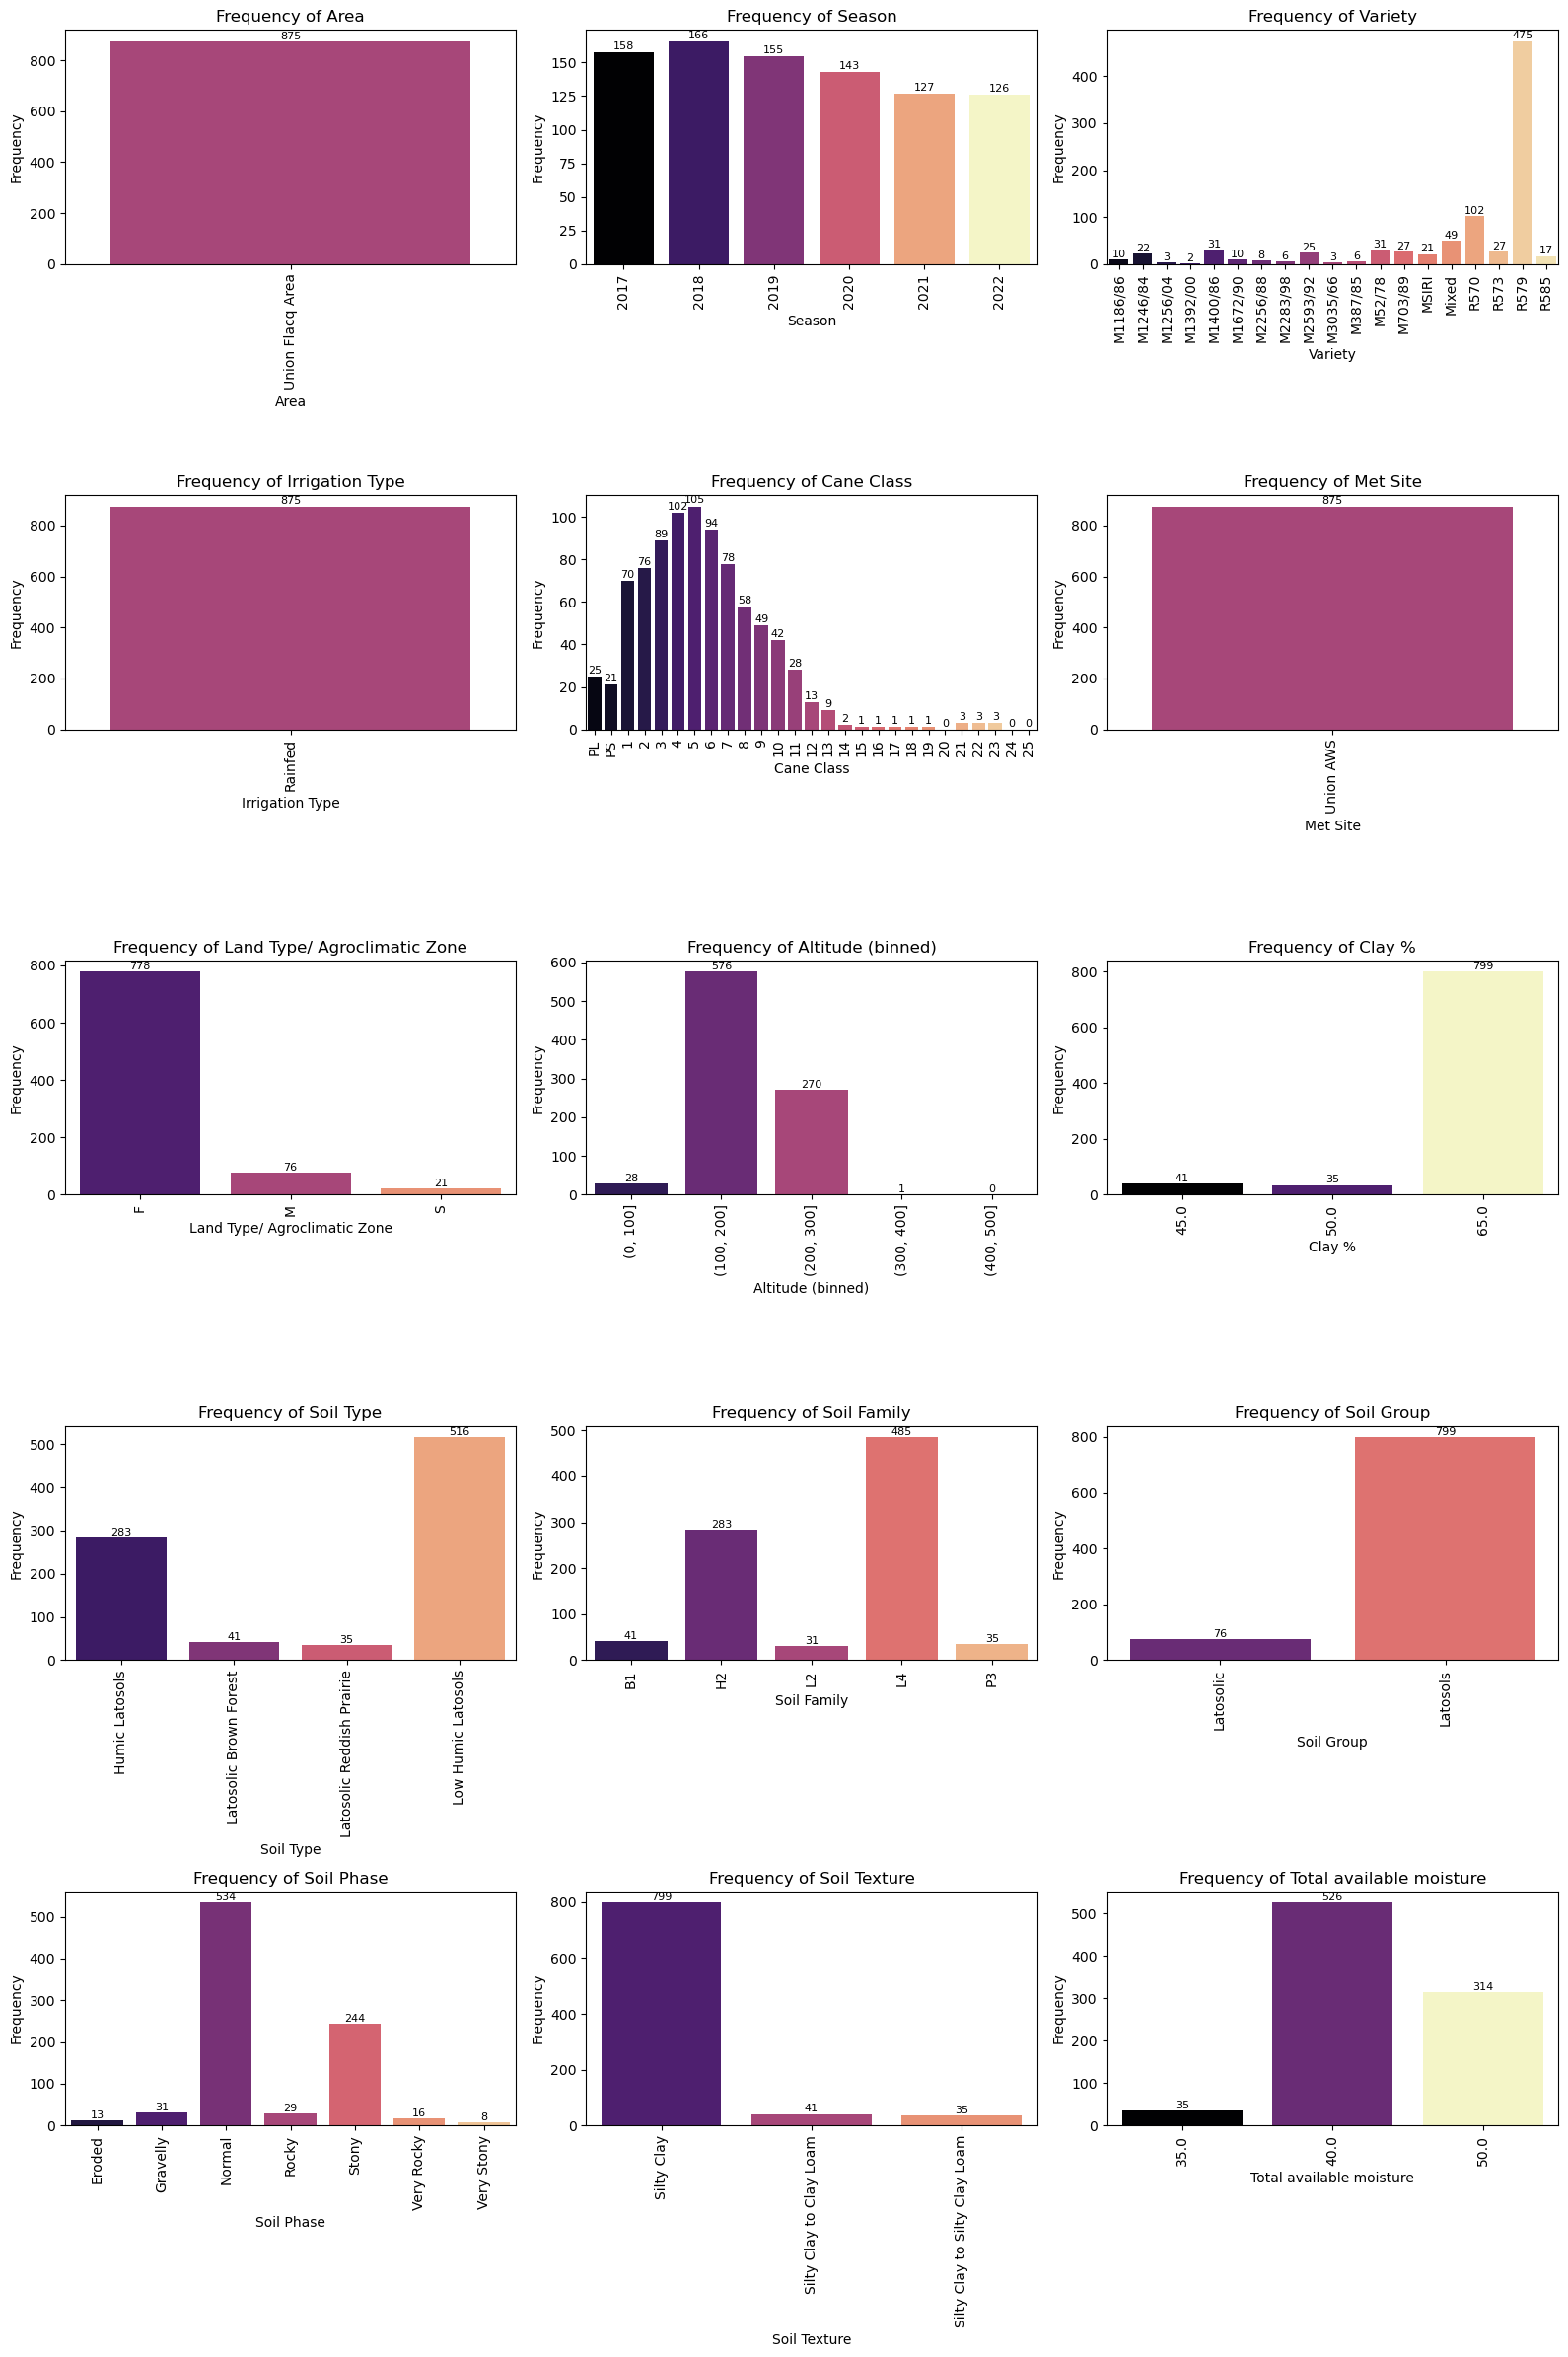

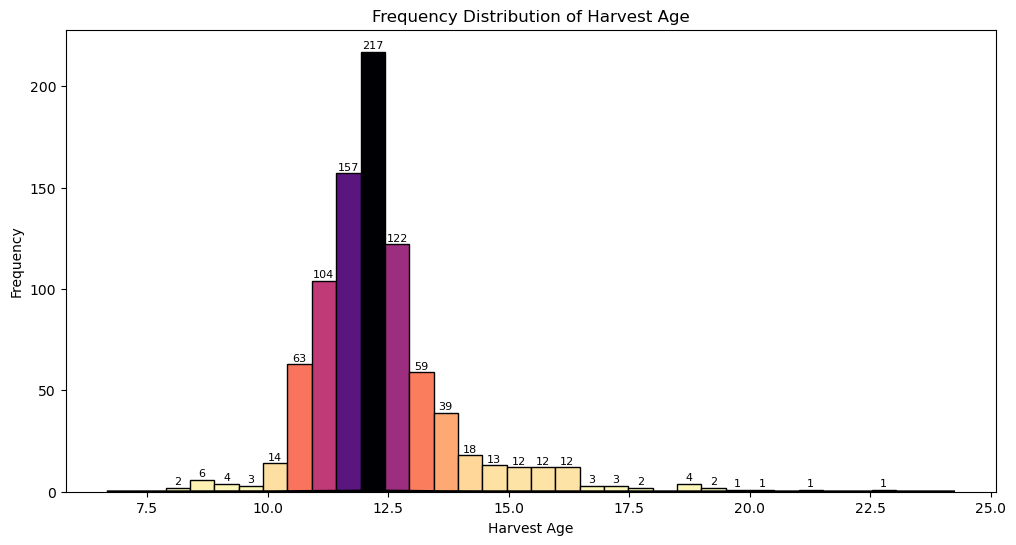

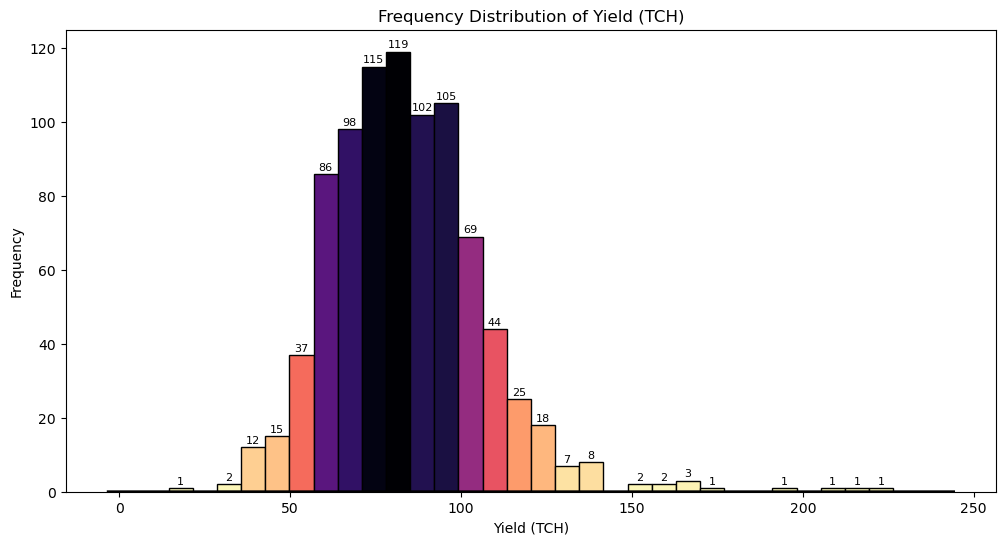

In [71]:
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating visualizations
import pandas as pd  # For data manipulation
import seaborn as sns  # For creating advanced visualizations with seaborn

# Preprocessing

# Convert Cane Class to string to ensure consistent sorting and counting
season_data["Cane Class"] = season_data["Cane Class"].astype(str)  # Convert 'Cane Class' to string type
cane_class_order = ["PL", "PS"] + [str(i) for i in range(1, 26)]  # Specify the desired order of 'Cane Class'
season_data["Cane Class"] = pd.Categorical(season_data["Cane Class"], categories=cane_class_order, ordered=True)
# This line reorders 'Cane Class' in the specified order: 'PL', 'PS', and then numbers from 1 to 25.
# The "ordered=True" ensures that the classes are ordered for sorting or categorical comparison later.

# Create bins for Altitude, stopping at 500
altitude_bins = [0, 100, 200, 300, 400, 500]  # Define altitude bins
season_data["Altitude (binned)"] = pd.cut(season_data["Altitude (m)"], bins=altitude_bins)
# 'pd.cut()' is used to categorize 'Altitude (m)' into bins as specified.
# This is useful for grouping altitude data into discrete intervals for easier analysis.

# Attributes for count plots
attributes = [
    "Area", "Season", "Variety", "Irrigation Type", "Cane Class", "Met Site",
    "Land Type/ Agroclimatic Zone", "Altitude (binned)", "Clay %", "Soil Type", 
    "Soil Family", "Soil Group", "Soil Phase", "Soil Texture", "Total available moisture"
]
# List of attributes (columns) to be plotted as count plots.

# Visualization: Grid Charts for Counts
plt.figure(figsize=(16, 24))  # Set the figure size for the grid of count plots
for i, attr in enumerate(attributes, 1):  # Loop through each attribute and create a subplot for each one
    plt.subplot(5, 3, i)  # Create a 5x3 grid of subplots
    data_counts = season_data[attr].value_counts().sort_index()  # Count occurrences and sort by index
    sns.barplot(
        x=data_counts.index,  # Categories (unique values of each attribute)
        y=data_counts.values,  # Frequencies of each category
        hue=data_counts.index,  # Color the bars by category
        dodge=False,  # Combine bars without separation
        palette="magma",  # Use the magma color palette for the bars
        legend=False  # Do not display the legend
    )
    plt.title(f"Frequency of {attr}")  # Set the title of each plot
    plt.ylabel("Frequency")  # Label the y-axis
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    for idx, value in enumerate(data_counts.values):  # Annotate the bar with its value
        plt.text(idx, value + 0.5, f"{value:,}", ha="center", va="bottom", fontsize=8)

plt.tight_layout()  # Adjust the layout to avoid overlapping subplots
plt.show()  # Display the grid of count plots

# Visualization: Frequency Distribution Curve for "Harvest Age"
plt.figure(figsize=(12, 6))  # Create a new figure for the histogram of "Harvest Age"

# Apply reversed magma color scheme for the histogram bars
cmap = plt.get_cmap("magma_r")  # Use the reversed magma colormap for histogram bars
hist_data, bin_edges = np.histogram(season_data["Harvest Age"], bins=30)  # Create a histogram of 'Harvest Age'
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])  # Calculate the center of each bin for plotting
colors = [cmap(x / max(hist_data)) for x in hist_data]  # Normalize counts for color intensity

# Plot the histogram bars with color intensity based on the counts
for i, (height, color) in enumerate(zip(hist_data, colors)):
    plt.bar(bin_centers[i], height, width=bin_edges[1] - bin_edges[0], color=color, edgecolor="black")

# Plot the Kernel Density Estimate (KDE) curve on top of the histogram
sns.kdeplot(
    season_data["Harvest Age"], 
    color="black", 
    linewidth=2, 
    label="KDE Curve"  # Add KDE curve with a label
)

plt.title("Frequency Distribution of Harvest Age")  # Set the plot title
plt.xlabel("Harvest Age")  # Set the x-axis label
plt.ylabel("Frequency")  # Set the y-axis label
plt.legend([], [], frameon=False)  # Remove legend from the plot

# Add data labels to bins with counts
for center, count in zip(bin_centers, hist_data):
    if count > 0:  # Only label bins with counts greater than 0
        plt.text(center, count + 0.5, f"{count:,}", ha="center", va="bottom", fontsize=8)

plt.show()  # Display the histogram and KDE curve

# Visualization: Frequency Distribution Curve for "Yield (TCH)"
plt.figure(figsize=(12, 6))  # Create a new figure for the histogram of "Yield (TCH)"

# Apply reversed magma color scheme for the histogram bars
cmap = plt.get_cmap("magma_r")  # Use the reversed magma colormap for histogram bars
hist_data, bin_edges = np.histogram(season_data["Yield (TCH)"], bins=30)  # Create a histogram of 'Yield (TCH)'
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])  # Calculate the center of each bin for plotting
colors = [cmap(x / max(hist_data)) for x in hist_data]  # Normalize counts for color intensity

# Plot the histogram bars with color intensity based on the counts
for i, (height, color) in enumerate(zip(hist_data, colors)):
    plt.bar(bin_centers[i], height, width=bin_edges[1] - bin_edges[0], color=color, edgecolor="black")

# Plot the Kernel Density Estimate (KDE) curve on top of the histogram
sns.kdeplot(
    season_data["Yield (TCH)"], 
    color="black", 
    linewidth=2, 
    label="KDE Curve"  # Add KDE curve with a label
)

plt.title("Frequency Distribution of Yield (TCH)")  # Set the plot title
plt.xlabel("Yield (TCH)")  # Set the x-axis label
plt.ylabel("Frequency")  # Set the y-axis label
plt.legend([], [], frameon=False)  # Remove legend from the plot

# Add data labels to bins with counts
for center, count in zip(bin_centers, hist_data):
    if count > 0:  # Only label bins with counts greater than 0
        plt.text(center, count + 0.5, f"{count:,}", ha="center", va="bottom", fontsize=8)

plt.show()  # Display the histogram and KDE curve

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Data Transformation**: 
   - The `astype(str)` method ensures that the 'Cane Class' is treated as categorical data, making it easier to sort and analyze.
   - `pd.cut()` creates bins for the 'Altitude' column, which helps in segmenting continuous data into categories (useful for visualization and comparison).
<br>   
2. **Data Visualization**: 
   - Count plots (`sns.barplot()`) are used to visualize the frequency of categorical variables, making it easier to spot patterns or imbalances in the dataset.
   - Histograms and Kernel Density Estimate (KDE) curves visualize the distribution of continuous data. The KDE curve gives a smoothed estimate of the data's distribution.
<br>
3. **Color Schemes**: 
   - Reversed color schemes (`magma_r`) are applied to histograms to visually distinguish frequency values more clearly by using color intensity.
<br> 
4. **Adding Annotations**: 
   - `plt.text()` is used to annotate bars with their actual counts, making the chart more informative and easier to interpret.
<br>
5. **Seaborn and Matplotlib**: 
   - Seaborn (`sns.barplot`, `sns.kdeplot`) provides high-level functionality for statistical visualizations like count plots and KDE curves.
   - Matplotlib (`plt.bar`, `plt.text`) allows more customized plotting, such as adding text labels and adjusting layout.

</details>

#### 2.1.2. Season History Records: Overview of Attribute Distribution (Percentages)

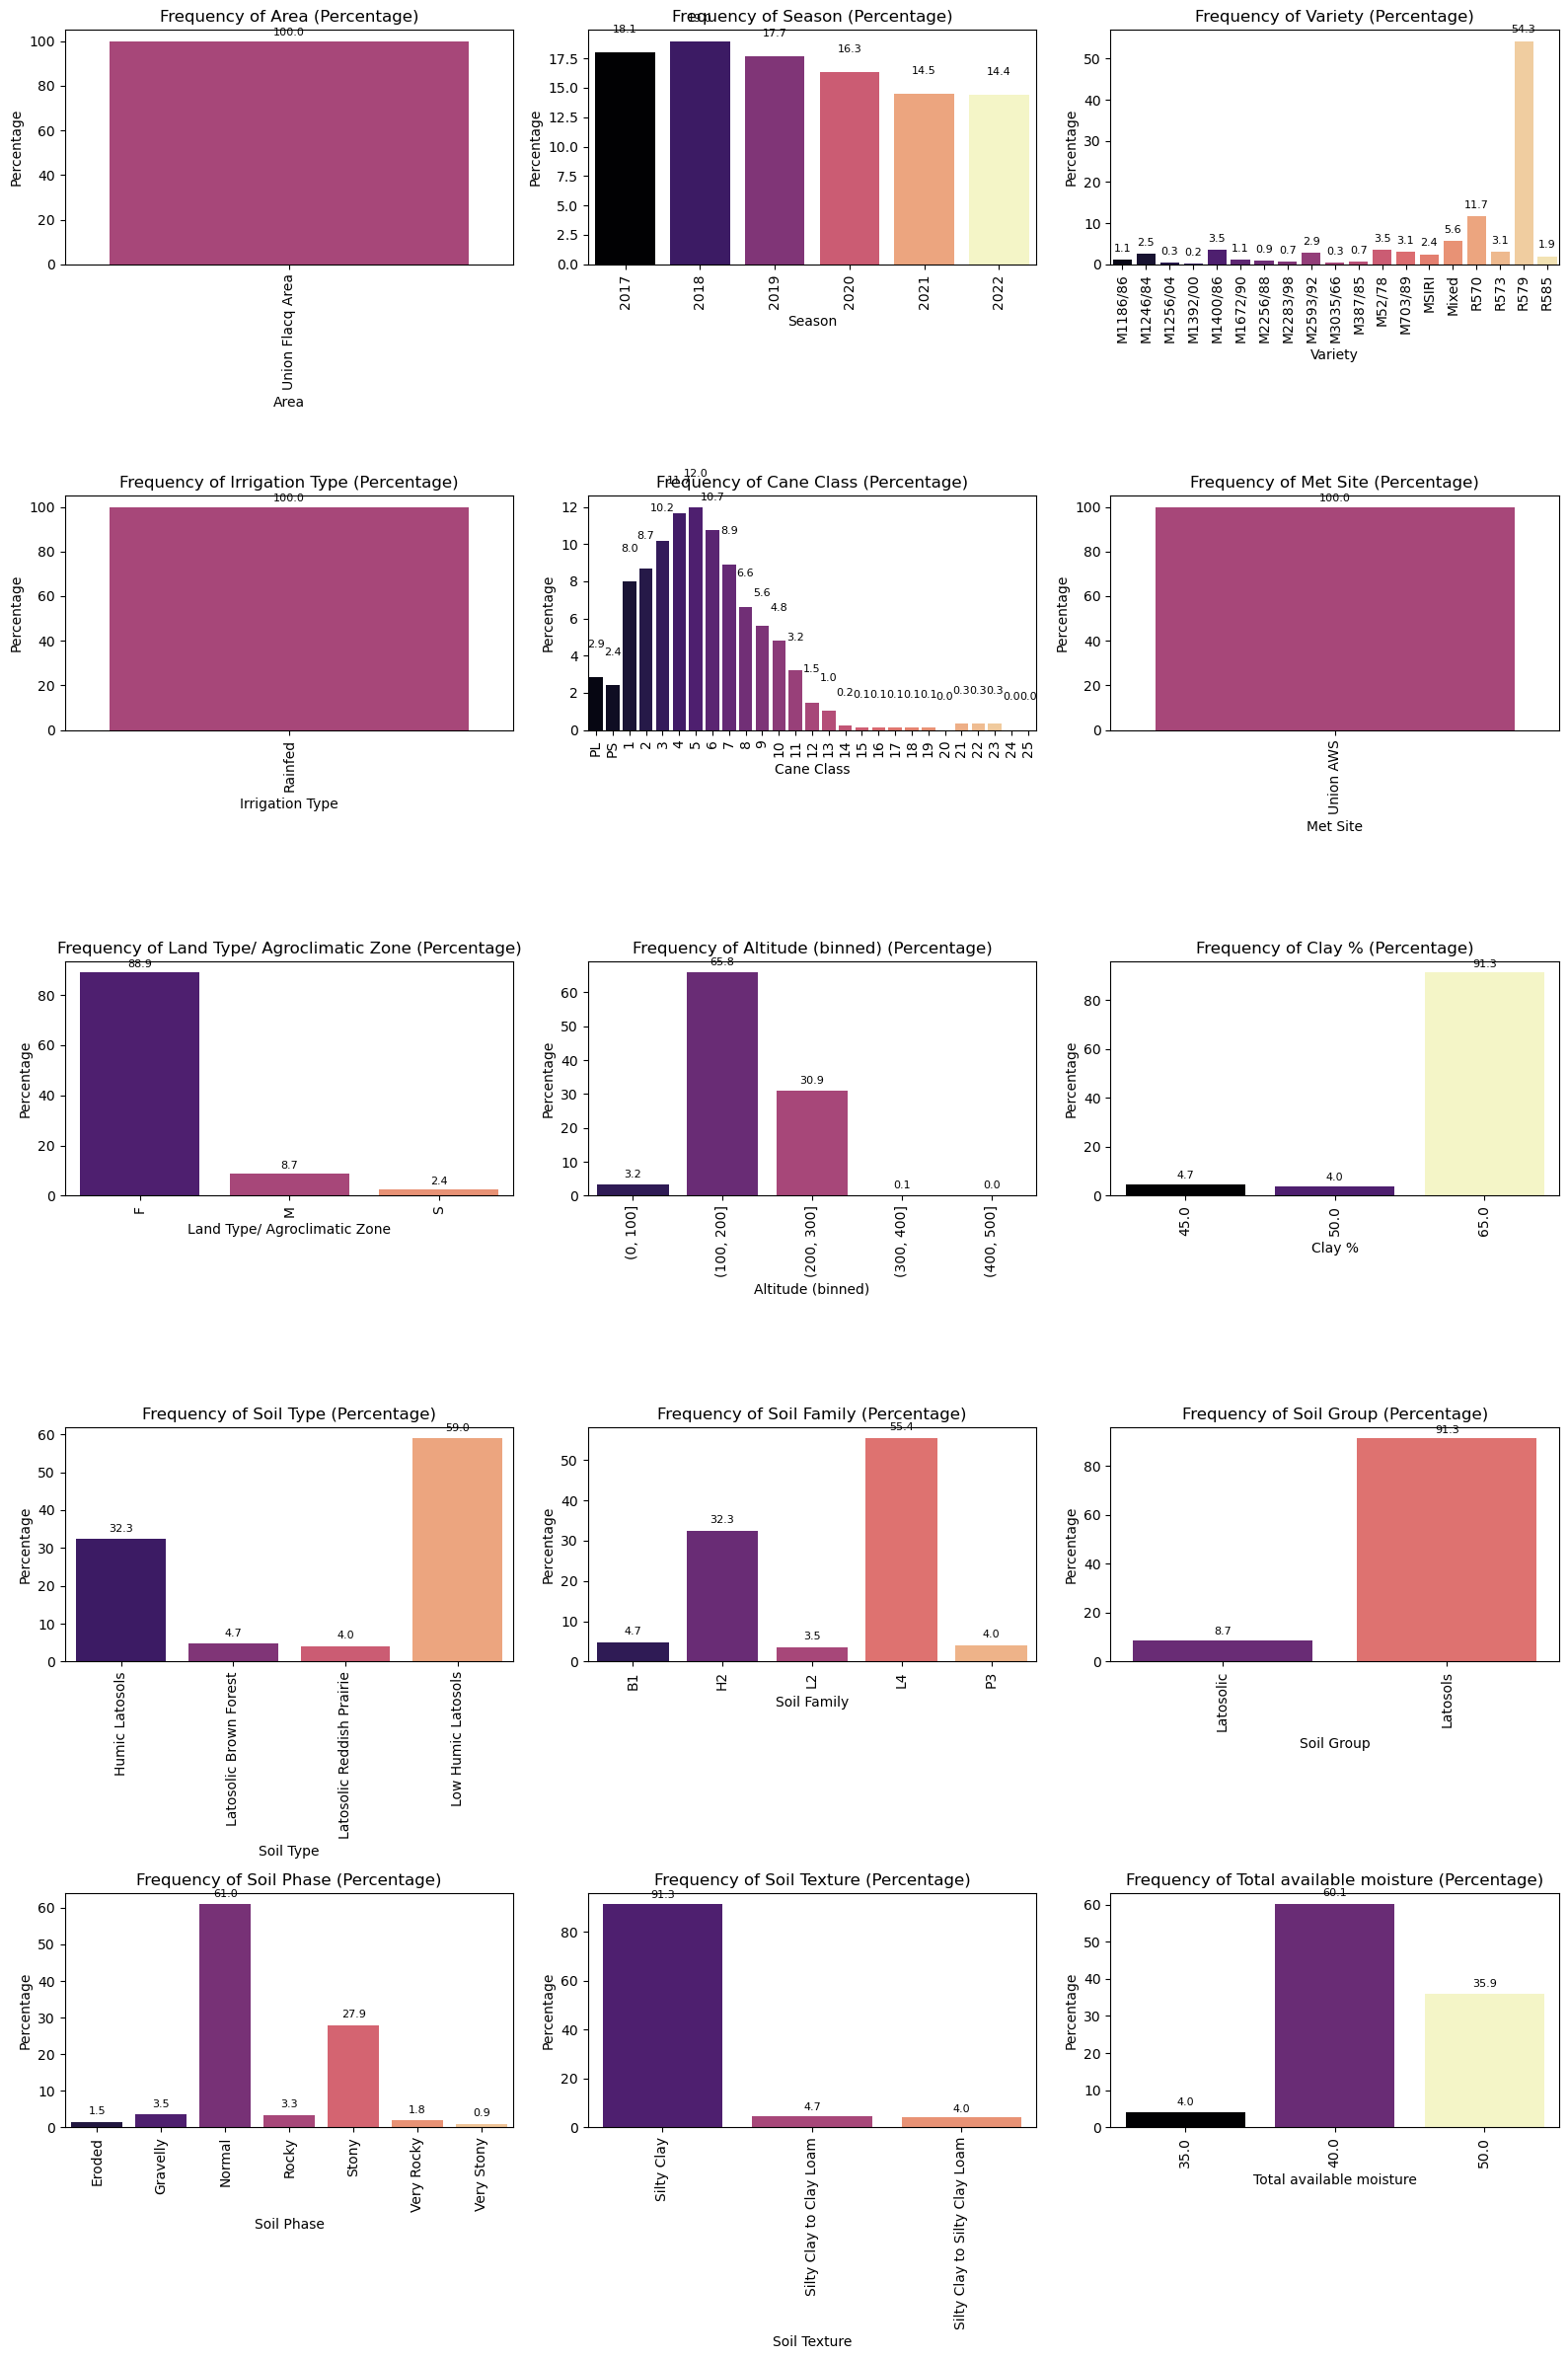

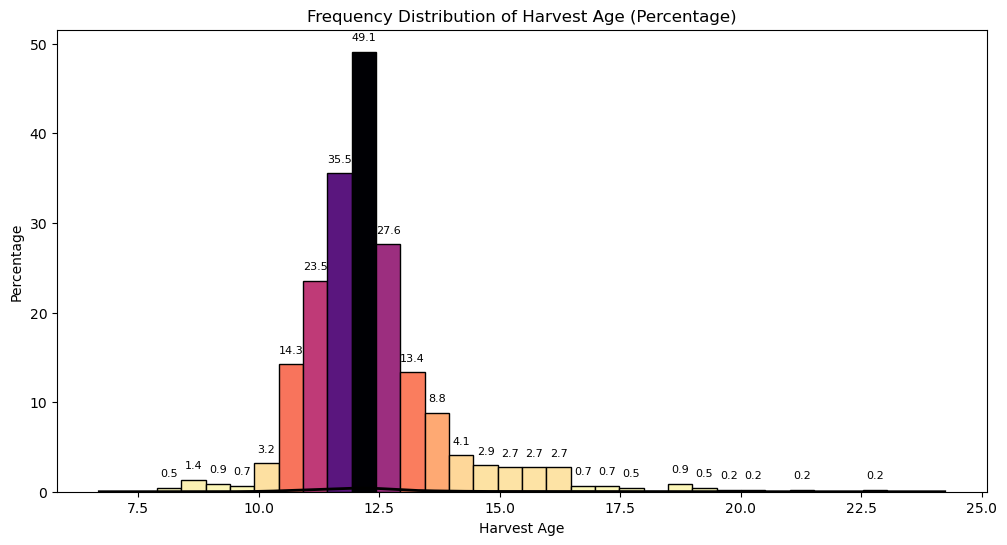

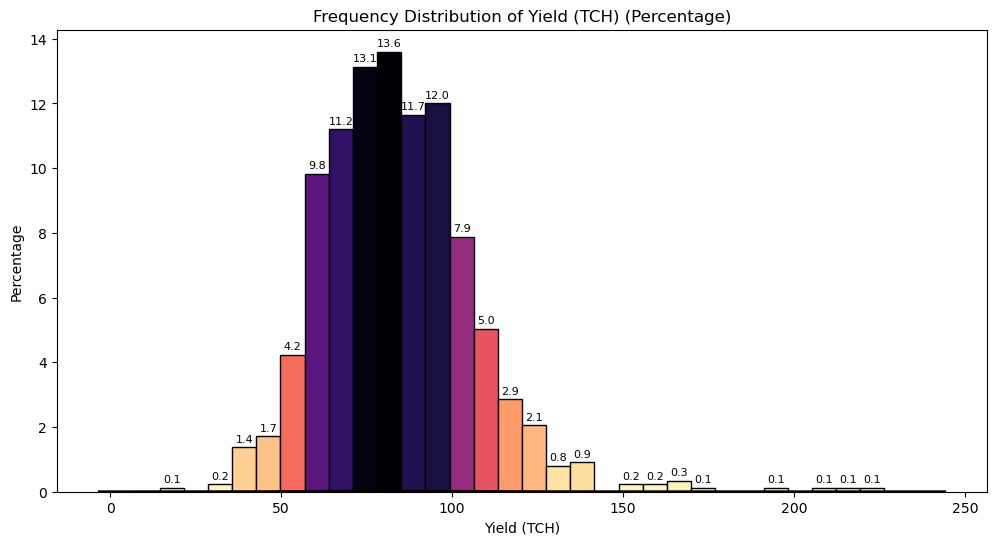

In [72]:
import numpy as np  # For numerical operations and handling arrays
import matplotlib.pyplot as plt  # For creating visualizations such as bar plots and histograms
import seaborn as sns  # For creating advanced statistical visualizations
import pandas as pd  # For data manipulation and handling DataFrames

# Preprocessing

# Convert 'Cane Class' to string to ensure consistent sorting and counting
season_data["Cane Class"] = season_data["Cane Class"].astype(str)  # Convert 'Cane Class' to string type
cane_class_order = ["PL", "PS"] + [str(i) for i in range(1, 26)]  # Define the desired order of 'Cane Class'
season_data["Cane Class"] = pd.Categorical(season_data["Cane Class"], categories=cane_class_order, ordered=True)
# This ensures the 'Cane Class' is ordered from "PL", "PS", and then 1 through 25 for consistency in analysis.

# Create bins for 'Altitude (m)', stopping at 500
altitude_bins = [0, 100, 200, 300, 400, 500]  # Define altitude bins for classification
season_data["Altitude (binned)"] = pd.cut(season_data["Altitude (m)"], bins=altitude_bins)
# The 'pd.cut()' function groups the altitude values into defined intervals (e.g., 0-100, 100-200, etc.) for analysis.

# Define the list of attributes to plot
attributes = [
    "Area", "Season", "Variety", "Irrigation Type", "Cane Class", "Met Site",
    "Land Type/ Agroclimatic Zone", "Altitude (binned)", "Clay %", "Soil Type", 
    "Soil Family", "Soil Group", "Soil Phase", "Soil Texture", "Total available moisture"
]
# These are the column names from the dataset that we want to analyze and visualize.

# Visualization: Grid Charts for Counts (as percentages)
plt.figure(figsize=(16, 24))  # Set the figure size for the grid of subplots
for i, attr in enumerate(attributes, 1):  # Loop through each attribute and create a subplot for each
    plt.subplot(5, 3, i)  # Create a grid layout of 5 rows and 3 columns for the subplots
    data_counts = season_data[attr].value_counts(normalize=True).sort_index() * 100  # Count occurrences as percentages
    # 'value_counts(normalize=True)' returns the relative frequency of each category, and multiplying by 100 converts it to percentage.
    
    sns.barplot(
        x=data_counts.index,  # Categories of the attribute
        y=data_counts.values,  # Frequencies (percentages)
        hue=data_counts.index,  # Hue by category (colors different bars for each category)
        dodge=False,  # Combine the bars for the same categories
        palette="magma",  # Use 'magma' color palette for bar colors
        legend=False  # Remove the legend
    )
    plt.title(f"Frequency of {attr} (Percentage)")  # Set the title for each subplot
    plt.ylabel("Percentage")  # Label the y-axis as percentage
    plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
    # Annotate the bars with their respective values
    for idx, value in enumerate(data_counts.values):
        plt.text(idx, value + 1.5, f"{value:.1f}", ha="center", va="bottom", fontsize=8)  # Display the percentage on top of each bar

plt.tight_layout()  # Adjust the layout to avoid overlapping subplots
plt.show()  # Display the grid of count plots

# Visualization: Frequency Distribution Curve for "Harvest Age" (as percentages)
plt.figure(figsize=(12, 6))  # Create a new figure for the histogram of "Harvest Age"

# Apply reversed magma color scheme for the histogram bars
cmap = plt.get_cmap("magma_r")  # Use the reversed 'magma' colormap for the histogram bars
hist_data, bin_edges = np.histogram(season_data["Harvest Age"], bins=30, density=True)  # Create a histogram with density normalization
hist_data *= 100  # Convert density to percentage
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])  # Calculate bin centers for plotting
colors = [cmap(x / max(hist_data)) for x in hist_data]  # Normalize counts for color intensity

# Plot the histogram bars with color intensity based on the counts
for i, (height, color) in enumerate(zip(hist_data, colors)):
    plt.bar(bin_centers[i], height, width=bin_edges[1] - bin_edges[0], color=color, edgecolor="black")

# Plot the Kernel Density Estimate (KDE) curve on top of the histogram
sns.kdeplot(
    season_data["Harvest Age"], 
    color="black", 
    linewidth=2, 
    label="KDE Curve (Density)"  # Add KDE curve to estimate the smooth distribution
)

plt.title("Frequency Distribution of Harvest Age (Percentage)")  # Set plot title
plt.xlabel("Harvest Age")  # Set the x-axis label
plt.ylabel("Percentage")  # Set the y-axis label
plt.legend([], [], frameon=False)  # Remove the legend

# Add data labels to the histogram bins
for center, count in zip(bin_centers, hist_data):
    if count > 0:  # Only label bins with counts greater than 0
        plt.text(center, count + 1.0, f"{count:.1f}", ha="center", va="bottom", fontsize=8)

plt.show()  # Display the histogram and KDE curve for 'Harvest Age'

# Visualization: Frequency Distribution Curve for "Yield (TCH)" (as percentages)
plt.figure(figsize=(12, 6))  # Create a new figure for the histogram of "Yield (TCH)"

# Compute histogram with absolute frequencies for "Yield (TCH)"
hist_data, bin_edges = np.histogram(season_data["Yield (TCH)"], bins=30)
total_count = hist_data.sum()  # Total number of data points in 'Yield (TCH)'
hist_data = (hist_data / total_count) * 100  # Convert counts to percentages

# Calculate bin centers for plotting
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Apply reversed magma color scheme for the histogram bars
cmap = plt.get_cmap("magma_r")
colors = [cmap(x / max(hist_data)) for x in hist_data]  # Normalize counts for color intensity

# Plot the histogram bars with color intensity based on the counts
for i, (height, color) in enumerate(zip(hist_data, colors)):
    plt.bar(bin_centers[i], height, width=bin_edges[1] - bin_edges[0], color=color, edgecolor="black")

# Add the Kernel Density Estimate (KDE) curve on top of the histogram
sns.kdeplot(
    season_data["Yield (TCH)"], 
    color="black", 
    linewidth=2, 
    label="KDE Curve (Density)"
)

# Set plot titles and labels
plt.title("Frequency Distribution of Yield (TCH) (Percentage)")  # Title for 'Yield (TCH)'
plt.xlabel("Yield (TCH)")  # Label for the x-axis
plt.ylabel("Percentage")  # Label for the y-axis
plt.legend([], [], frameon=False)  # Remove the legend

# Add data labels to the histogram bins
for center, count in zip(bin_centers, hist_data):
    if count > 0:  # Only label bins with counts greater than 0
        plt.text(center, count + 0.1, f"{count:.1f}", ha="center", va="bottom", fontsize=8)

plt.show()  # Display the histogram and KDE curve for 'Yield (TCH)'

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Preprocessing and Data Transformation**:
   - **`astype(str)`**: Converts the 'Cane Class' to string, ensuring that sorting and counting work as expected.
   - **`pd.cut()`**: Divides the altitude data into bins (ranges), categorizing the data into different levels of altitude.
   - **`pd.Categorical()`**: This function is used to make the 'Cane Class' ordered, allowing for logical ordering, which is useful when visualizing categories that have a natural order.
<br>
2. **Visualization**:
   - **Bar Plot**: In the first block, `sns.barplot()` is used to visualize the frequency distribution of various categorical attributes as percentages. The `hue` argument colors the bars by category, and the percentages are displayed on top of the bars.
   - **Histogram and KDE Plot**: The second block visualizes the frequency distribution of continuous variables ('Harvest Age' and 'Yield (TCH)') using histograms and kernel density estimates (KDE). This allows us to see both the raw distribution (via histograms) and the smoothed distribution (via KDE).
   - **Coloring**: A reversed 'magma' colormap is used to provide better visual contrast between bars, where more frequent categories are highlighted with stronger colors.
<br>
3. **Data Labeling**:
   - The code uses `plt.text()` to add labels to the bars and bins, displaying the actual percentage value directly on the plot. This makes the charts more informative without needing to hover over them.
<br>
4. **Seaborn and Matplotlib**:
   - **Seaborn**: `sns.barplot()` and `sns.kdeplot()` are high-level functions that make it easy to visualize categorical and continuous data distributions. Seaborn handles many aspects of the plot automatically, like legends and axis labels, but also allows for customization.
   - **Matplotlib**: `plt.bar()` and `plt.text()` give us more control over the finer details of the plot, such as manually adding text labels and adjusting layout.

</details>

#### 2.1.3. Season History Records: Harvest Age Box Plot with Outlier Detection

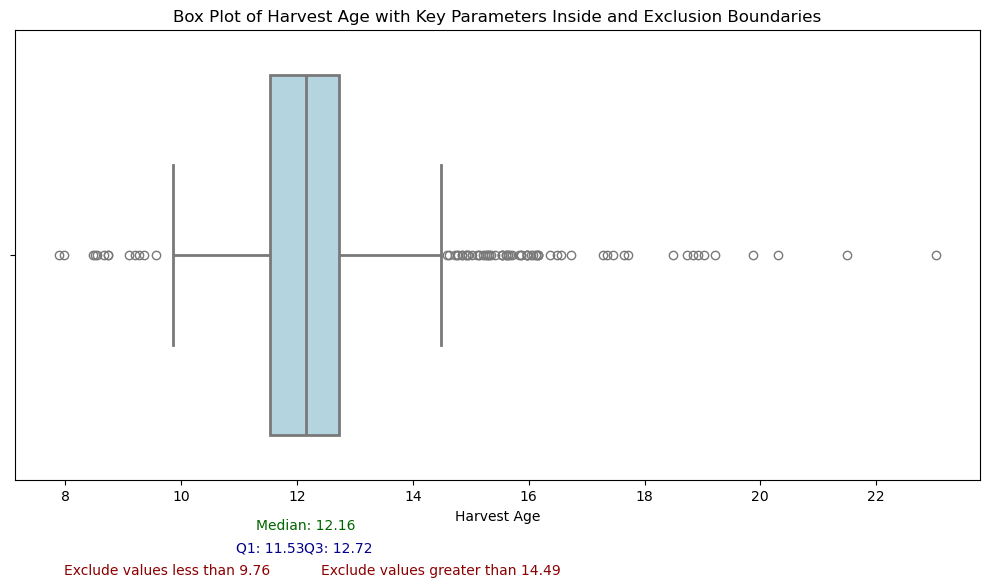

Outliers for 'Harvest Age':

Outliers less than lower bound (values to exclude):
       Harvest Age
41822     9.364988
43397     9.102111
44645     8.740656
44862     7.886306
44885     7.984885
44926     9.266409
45500     8.543498
45521     9.200690
45569     8.740656
45615     8.477779
45640     8.510638
45916     9.562146
55738     8.674936

Outliers greater than upper bound (values to exclude):
       Harvest Age
41743    15.115419
41765    14.622525
41791    14.721104
41860    15.279717
41933    18.927134
...            ...
45565    15.279717
45666    16.166927
45831    14.852543
45913    16.166927
48830    15.542594

[65 rows x 1 columns]


In [73]:
import matplotlib.pyplot as plt  # Importing matplotlib for creating plots
import seaborn as sns  # Importing seaborn for easier statistical plotting
import pandas as pd  # Importing pandas for data manipulation
import numpy as np  # Importing numpy for numerical operations

# Box Plot and Outlier Detection for Harvest Age

# Calculate the first (Q1) and third (Q3) quartiles, median, and the interquartile range (IQR)
Q1_age = season_data["Harvest Age"].quantile(0.25)  # 25th percentile (Q1)
Q3_age = season_data["Harvest Age"].quantile(0.75)  # 75th percentile (Q3)
median_age = season_data["Harvest Age"].median()  # The median value
IQR_age = Q3_age - Q1_age  # Interquartile range: difference between Q3 and Q1
lower_bound_age = Q1_age - 1.5 * IQR_age  # Lower bound to detect outliers (values below this are outliers)
upper_bound_age = Q3_age + 1.5 * IQR_age  # Upper bound to detect outliers (values above this are outliers)

# Create a reduced chart size for better fit
plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
sns.boxplot(x=season_data["Harvest Age"], color="lightblue", fliersize=6, linewidth=2)
# Create a box plot of 'Harvest Age', with light blue color and setting flyer size and line width for the box plot

# Add annotations for Q1, Q3, and Median inside the box plot with reduced vertical distance
plt.text(Q1_age, 0.65, f'Q1: {Q1_age:.2f}', ha='center', va='center', fontsize=10, color='darkblue')
# Annotate the first quartile (Q1) with the value, placed at y=0.65 on the plot.
plt.text(Q3_age, 0.65, f'Q3: {Q3_age:.2f}', ha='center', va='center', fontsize=10, color='darkblue')
# Annotate the third quartile (Q3) similarly
plt.text(median_age, 0.60, f'Median: {median_age:.2f}', ha='center', va='center', fontsize=10, color='darkgreen')
# Annotate the median value inside the plot, placed slightly below the Q3 annotation

# Adjust the position of lower and upper bound labels to be closer inside the chart
plt.text(lower_bound_age, 0.70, f'Exclude values less than {lower_bound_age:.2f}', ha='center', va='center', fontsize=10, color='darkred')
# Add a label for values less than the lower bound, indicating exclusion (outliers)
plt.text(upper_bound_age, 0.70, f'Exclude values greater than {upper_bound_age:.2f}', ha='center', va='center', fontsize=10, color='darkred')
# Add a label for values greater than the upper bound, indicating exclusion (outliers)

# Title and labels
plt.title("Box Plot of Harvest Age with Key Parameters Inside and Exclusion Boundaries")
# Add a title to the plot
plt.xlabel("Harvest Age")  # Add label to the x-axis

# Show plot
plt.tight_layout()  # Adjust layout to ensure that everything fits within the plot
plt.show()  # Display the plot

# Outlier Detection for Harvest Age

# Find outlier values below the lower bound and above the upper bound
outliers_lower_age = season_data[season_data["Harvest Age"] < lower_bound_age]
# Filter out the rows where 'Harvest Age' is below the lower bound
outliers_upper_age = season_data[season_data["Harvest Age"] > upper_bound_age]
# Filter out the rows where 'Harvest Age' is above the upper bound

# Concatenate the lower and upper outliers to get all outliers in one dataframe
outliers_age = pd.concat([outliers_lower_age, outliers_upper_age])

# Display outlier values: less than lower bound and greater than upper bound with indices
print(f"Outliers for 'Harvest Age':")  # Print a header for the outlier information
print("\nOutliers less than lower bound (values to exclude):")
print(outliers_lower_age[["Harvest Age"]])  # Print rows where 'Harvest Age' is below the lower bound

print("\nOutliers greater than upper bound (values to exclude):")
print(outliers_upper_age[["Harvest Age"]])  # Print rows where 'Harvest Age' is above the upper bound

# Optionally, if you want to exclude these outliers, you can drop them like this:
# season_data_cleaned = season_data[~season_data.index.isin(outliers_age.index)]
# This will remove the rows that have outliers by excluding the rows that are in outliers_age DataFrame

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Box Plot and Quartiles**:
   - A **box plot** is a graphical representation of the distribution of a dataset. It shows the median, first and third quartiles (Q1 and Q3), and potential outliers.
   - **Quartiles** divide the data into four equal parts. The **first quartile (Q1)** is the 25th percentile, the **third quartile (Q3)** is the 75th percentile, and the **median** is the 50th percentile.
<br>
2. **Interquartile Range (IQR)**:
   - The **IQR** is the range between Q3 and Q1, and it represents the middle 50% of the data. It’s useful for detecting outliers, which are values that fall below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.
<br>
3. **Outliers**:
   - Outliers are values that lie significantly outside the interquartile range, as determined by the bounds calculated above. These outliers can skew the analysis, and it’s common to either remove or analyze them separately.
   - In this code, values below the **lower bound** and above the **upper bound** are considered outliers, and they are displayed and optionally removed from the dataset.
<br>
4. **Plotting and Customization**:
   - **Annotations**: The `plt.text()` function is used to add text labels at specific positions in the plot, such as annotating the quartile values and exclusion bounds on the box plot.
   - **KDE (Kernel Density Estimate)**: The **KDE** curve is a smooth estimate of the probability density function of a dataset. It’s plotted on top of the histogram to visualize the data distribution more smoothly.
<br>
5. **Handling Outliers**:
   - After detecting outliers, they are displayed using the `print()` function. Additionally, if desired, the outliers can be removed from the dataset using `season_data_cleaned = season_data[~season_data.index.isin(outliers_age.index)]`, which excludes rows with outliers.

This code helps in detecting and visualizing outliers in the "Harvest Age" attribute, providing useful insights for data cleaning and analysis.

</details>

#### 2.1.4. Updated Season History Records

In [74]:
# Add additional filters to the DataFrame to refine the dataset

season_data = season_data[
    (season_data["Season"].between(2017, 2023)) &  # Filter for seasons between 2017 and 2023.
    (season_data["Yield (TCH)"] > 0) &  # Exclude rows where Yield (TCH) is 0 or less (invalid yields).
    (season_data["Met Site"] == "Union AWS") &  # Filter for records where "Met Site" is "Union AWS".
    (season_data["Area"] == "Union Flacq Area") &  # Filter to include only "Union Flacq Area".
    (season_data["Irrigation Type"] == "Rainfed") &  # Include only rows where the irrigation type is "Rainfed".
    (season_data["Variety"] == "R579") &  # Include only records with the variety "R579".
    (season_data["Cane Class"].astype(str).isin(["PL", "PS"] + [str(i) for i in range(1, 15)])) &  # Include Cane Classes: "PL", "PS", and 1-14.
    (season_data["Land Type/ Agroclimatic Zone"] == "F") &  # Filter for "Land Type/ Agroclimatic Zone" being "F".
    (season_data["Altitude (m)"] <= 300) &  # Filter for records where Altitude is less than or equal to 300 meters.
    (season_data["Clay %"] == 65.0) &  # Only include rows with a Clay % of exactly 65.
    (season_data["Soil Type"].isin(["Humic Latosols", "Low Humic Latosols"])) &  # Include specific soil types: "Humic Latosols" or "Low Humic Latosols".
    (season_data["Soil Family"].isin(["H2", "L4"])) &  # Include soil families "H2" or "L4".
    (season_data["Soil Group"] == "Latosols") &  # Filter for "Soil Group" as "Latosols".
    (season_data["Soil Phase"].isin(["Normal", "Stony"])) &  # Filter for soil phases "Normal" or "Stony".
    (season_data["Soil Texture"] == "Silty Clay") &  # Include rows with soil texture "Silty Clay".
    (season_data["Total available moisture"].isin([40.0, 50.0])) &  # Only include rows where "Total available moisture" is 40 or 50.
    (season_data["Harvest Age"] >= lower_bound_age) &  # Filter for rows where Harvest Age is greater than or equal to the lower bound.
    (season_data["Harvest Age"] <= upper_bound_age)  # Filter for rows where Harvest Age is less than or equal to the upper bound.
]
# These conditions filter the dataset based on the given criteria, refining the data to fit the study's requirements.

# Keep only the relevant columns for analysis
season_data = season_data[
    ["Area", "Field", "Season", "Variety", "Irrigation Type", "Cane Class",
     "Grow Start Date", "Actual Cut Date", "Met Site", "Yield (TCH)", "Harvest Age",
     "Land Type/ Agroclimatic Zone", "Altitude (m)", "Clay %", "Soil Type", 
     "Soil Family", "Soil Group", "Soil Phase", "Soil Texture", "Last Planted", "Total available moisture"]
]
# This step selects only the columns necessary for analysis, discarding any irrelevant columns.

# Drop rows with any missing (null or NaN) values in the specified columns
season_data = season_data.dropna(
    subset=["Area", "Field", "Season", "Variety", "Irrigation Type", "Cane Class",
            "Grow Start Date", "Actual Cut Date", "Met Site", "Yield (TCH)", "Harvest Age",
            "Land Type/ Agroclimatic Zone", "Altitude (m)", "Clay %", "Soil Type", 
            "Soil Family", "Soil Group", "Soil Phase", "Soil Texture", "Last Planted", "Total available moisture"]
)
# This ensures that only rows with complete information are retained, preventing any errors caused by missing data.

# Display 5 random rows from the DataFrame for a quick overview and verification
season_data.sample(5)
# This provides a snapshot of the cleaned and filtered data, allowing you to inspect random rows for consistency and correctness.

Area   Field  Season Variety Irrigation Type Cane Class  \
42150  Union Flacq Area  754221    2021    R579         Rainfed          5   
45451  Union Flacq Area  776907    2021    R579         Rainfed          8   
45660  Union Flacq Area  756629    2020    R579         Rainfed          5   
42297  Union Flacq Area  754404    2017    R579         Rainfed          1   
42195  Union Flacq Area  754254    2021    R579         Rainfed          1   

      Grow Start Date Actual Cut Date   Met Site  Yield (TCH)  ...  \
42150      2020-10-06      2021-11-11  Union AWS    86.338111  ...   
45451      2020-11-01      2021-11-16  Union AWS    70.705269  ...   
45660      2019-12-20      2020-12-04  Union AWS    83.083541  ...   
42297      2016-07-15      2017-09-23  Union AWS   115.111513  ...   
42195      2020-10-21      2021-10-27  Union AWS    95.133731  ...   

       Land Type/ Agroclimatic Zone Altitude (m)  Clay %           Soil Type  \
42150                             F        248.0    65.0      Humic Latosols   
45451                             F        168.0    65.0  Low Humic Latosols   
45660                             F        180.0    65.0  Low Humic Latosols   
42297                             F        245.0    65.0      Humic Latosols   
42195                             F        262.0    65.0      Humic Latosols   

      Soil Family Soil Group Soil Phase Soil Texture Last Planted  \
42150          H2   Latosols     Normal   Silty Clay   2015-04-23   
45451          L4   Latosols      Stony   Silty Clay   2012-04-26   
45660          L4   Latosols     Normal   Silty Clay   2014-09-02   
42297          H2   Latosols     Normal   Silty Clay   2015-04-22   
42195          H2   Latosols      Stony   Silty Clay   2019-02-23   

      Total available moisture  
42150                     50.0  
45451                     40.0  
45660                     40.0  
42297                     50.0  
42195                     50.0  

[5 rows x 21 columns]

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Filtering the Data**:
   - The code filters the dataset `season_data` by applying multiple conditions, ensuring that only relevant data for the analysis is kept.
   - For example, the `Season` is filtered between 2017 and 2023, `Yield (TCH)` is required to be greater than 0, and only specific values for variables like `"Met Site"`, `"Variety"`, `"Irrigation Type"`, and others are kept.
   - The filtering of categorical variables like `"Cane Class"` is done using `.isin()` to select a range of values (e.g., "PL", "PS", and classes from 1 to 14).
<br>
2. **Column Selection**:
   - After filtering the data, the code keeps only the columns that are needed for the analysis. This helps reduce memory usage and simplifies the subsequent steps.
<br>
3. **Handling Missing Data**:
   - The `.dropna()` method is used to remove rows with missing or `NaN` values in any of the specified columns. This is important because models and analysis often fail when there's missing data.
   - The columns specified in `subset` are those that must not contain any `NaN` values for the rows to be retained.
<br>
4. **Displaying a Random Sample**:
   - `.sample(5)` is used to print 5 random rows from the filtered and cleaned dataset. This allows you to quickly verify that the data looks correct after the preprocessing steps.

This script helps prepare the dataset for further analysis or modeling by cleaning it, applying filters, and selecting the relevant variables to focus on.

</details>

#### 2.1.5. Updated Season History Records: Overview of Attribute Distribution (Values)

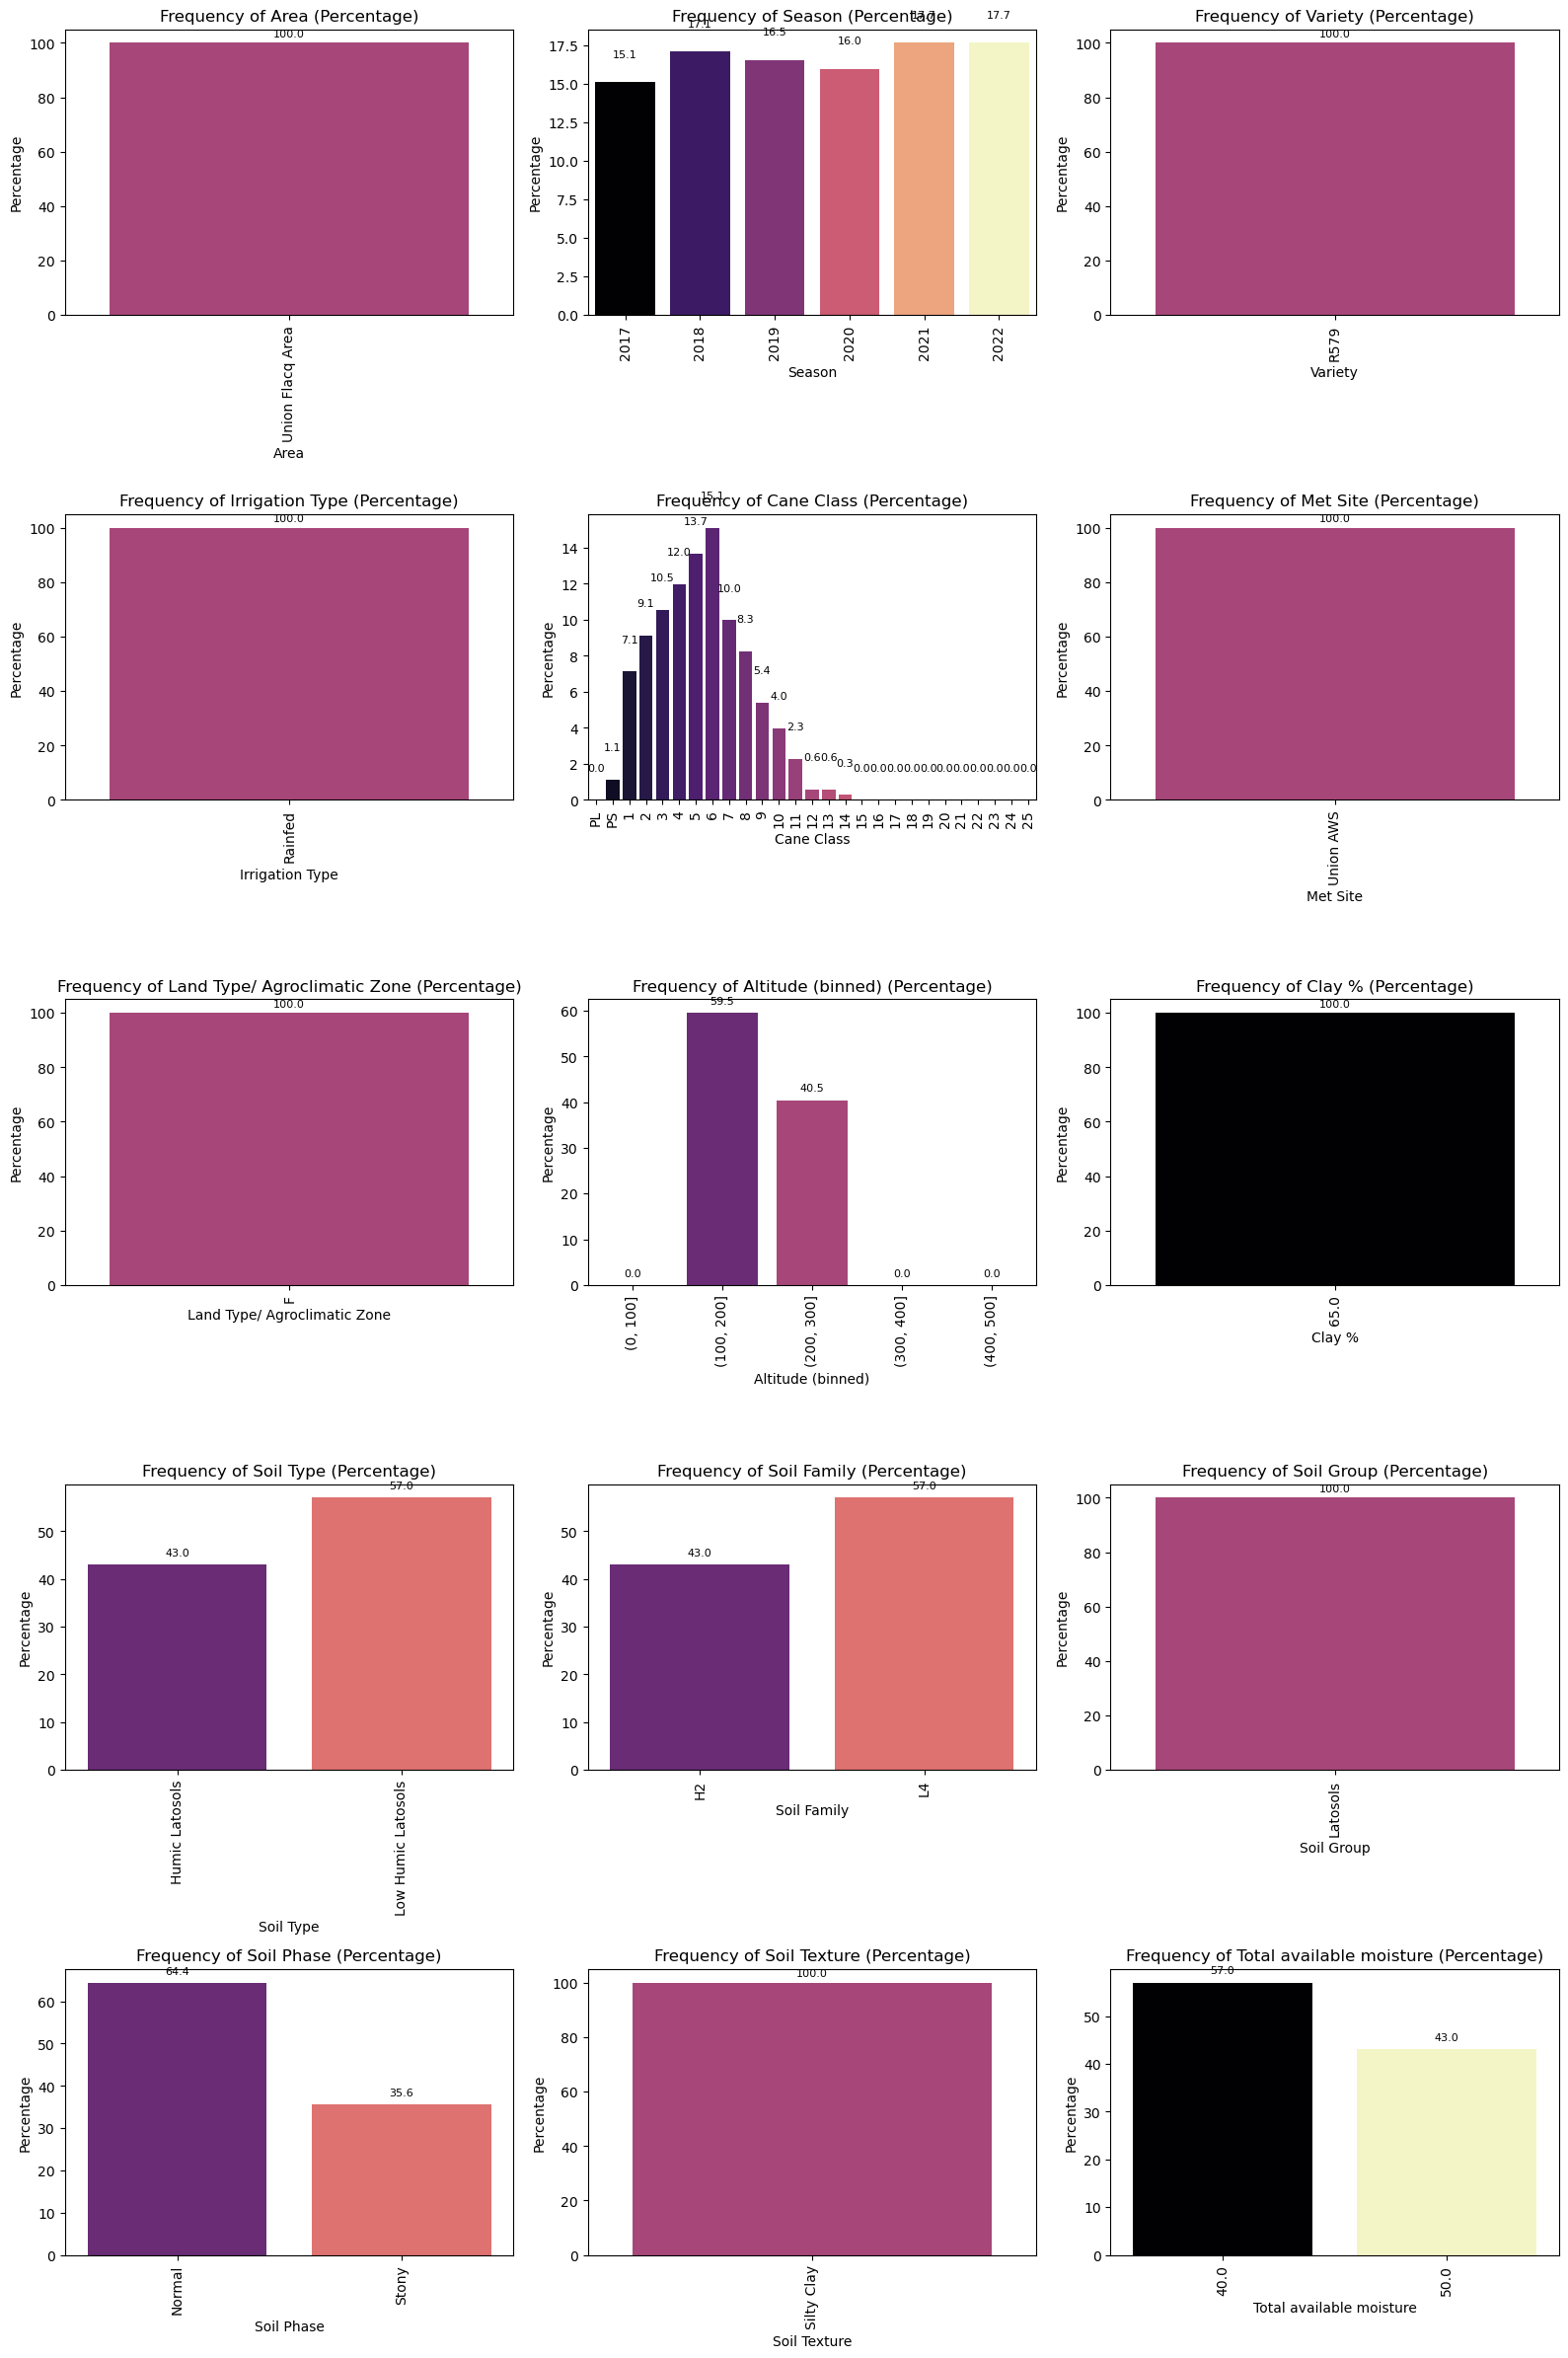

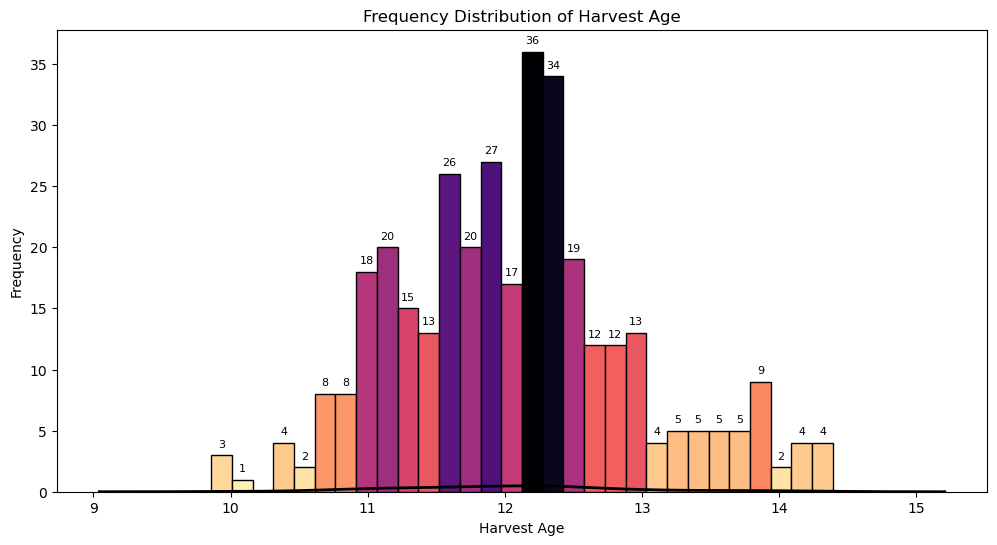

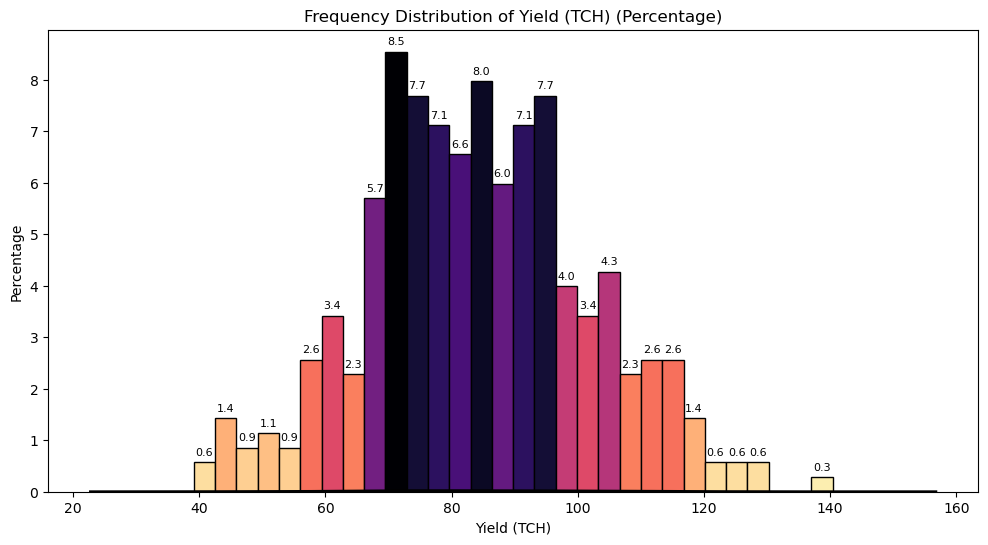

In [75]:
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical data visualization
import pandas as pd  # For working with DataFrames
import numpy as np  # For numerical computations

# Preprocessing

# Convert 'Cane Class' to string to ensure consistent sorting and counting
season_data["Cane Class"] = season_data["Cane Class"].astype(str)  # Convert to string for sorting
cane_class_order = ["PL", "PS"] + [str(i) for i in range(1, 26)]  # Define custom order for Cane Classes: "PL", "PS", and 1-25
season_data["Cane Class"] = pd.Categorical(season_data["Cane Class"], categories=cane_class_order, ordered=True)
# This ensures the Cane Class is sorted in a specific order.

# Create bins for 'Altitude (m)', stopping at 500 meters
altitude_bins = [0, 100, 200, 300, 400, 500]  # Define bins for altitude
season_data["Altitude (binned)"] = pd.cut(season_data["Altitude (m)"], bins=altitude_bins)
# This step creates a new categorical column based on altitude ranges.

# Attributes for count plots
attributes = [
    "Area", "Season", "Variety", "Irrigation Type", "Cane Class", "Met Site",
    "Land Type/ Agroclimatic Zone", "Altitude (binned)", "Clay %", "Soil Type", 
    "Soil Family", "Soil Group", "Soil Phase", "Soil Texture", "Total available moisture"
]
# These are the columns from which we will create count plots to visualize the distribution.

# Visualization: Grid Charts for Counts (showing frequency as percentage)
plt.figure(figsize=(16, 24))  # Set the figure size for the grid of charts
for i, attr in enumerate(attributes, 1):  # Iterate through the list of attributes
    plt.subplot(5, 3, i)  # Create a grid of subplots (5 rows and 3 columns)
    data_counts = season_data[attr].value_counts(normalize=True).sort_index() * 100  # Get percentage counts for each attribute
    sns.barplot(
        x=data_counts.index,  # X-axis: categories of the attribute
        y=data_counts.values,  # Y-axis: percentage of occurrences
        hue=data_counts.index,  # Assign x values to hue to satisfy Seaborn API
        dodge=False,  # Keep the bars grouped together
        palette="magma",  # Color palette for the bars
        legend=False  # Disable the legend
    )
    plt.title(f"Frequency of {attr} (Percentage)")  # Title for each subplot
    plt.ylabel("Percentage")  # Label for the y-axis
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    for idx, value in enumerate(data_counts.values):
        # Add data labels on the bars to show the percentage
        plt.text(idx, value + 1.5, f"{value:.1f}", ha="center", va="bottom", fontsize=8)

plt.tight_layout()  # Adjust layout to ensure subplots fit neatly
plt.show()  # Display the plot

# Visualization: Frequency Distribution Curve for "Harvest Age"
plt.figure(figsize=(12, 6))  # Set the size for the plot

# Apply reversed magma color scheme for the histogram bars
cmap = plt.get_cmap("magma_r")  # Use the reversed magma colormap for the bars
hist_data, bin_edges = np.histogram(season_data["Harvest Age"], bins=30)  # Create histogram data
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])  # Calculate the bin centers for plotting
colors = [cmap(x / max(hist_data)) for x in hist_data]  # Normalize the colors based on the frequency

# Plot the histogram bars with color intensity based on frequency
for i, (height, color) in enumerate(zip(hist_data, colors)):
    plt.bar(bin_centers[i], height, width=bin_edges[1] - bin_edges[0], color=color, edgecolor="black")

sns.kdeplot(
    season_data["Harvest Age"],  # Add a Kernel Density Estimation (KDE) plot
    color="black",  # Set the line color to black
    linewidth=2,  # Set the line width
    label="KDE Curve"  # Label the KDE curve
)

plt.title("Frequency Distribution of Harvest Age")  # Set the title of the plot
plt.xlabel("Harvest Age")  # Label for x-axis
plt.ylabel("Frequency")  # Label for y-axis
plt.legend([], [], frameon=False)  # Remove legend

# Add data labels on the histogram bars
for center, count in zip(bin_centers, hist_data):
    if count > 0:  # Only add data labels where count is greater than 0
        plt.text(center, count + 0.5, f"{count:,}", ha="center", va="bottom", fontsize=8)

plt.show()  # Display the plot

# Visualization: Frequency Distribution Curve for "Yield (TCH)"
plt.figure(figsize=(12, 6))  # Set the size for the plot

# Compute the histogram with absolute frequencies for Yield (TCH)
hist_data, bin_edges = np.histogram(season_data["Yield (TCH)"], bins=30)  # Get the histogram data
total_count = hist_data.sum()  # Calculate the total number of data points
hist_data = (hist_data / total_count) * 100  # Convert frequencies to percentages

# Bin centers for plotting
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Apply reversed magma color scheme for the histogram bars
cmap = plt.get_cmap("magma_r")
colors = [cmap(x / max(hist_data)) for x in hist_data]  # Normalize the color intensity

# Plot histogram bars with percentages
for i, (height, color) in enumerate(zip(hist_data, colors)):
    plt.bar(bin_centers[i], height, width=bin_edges[1] - bin_edges[0], color=color, edgecolor="black")

# Add KDE plot for Yield (TCH)
sns.kdeplot(
    season_data["Yield (TCH)"],  # Plot the KDE for Yield (TCH)
    color="black",  # Set the line color to black
    linewidth=2,  # Set the line width
    label="KDE Curve"  # Label the KDE curve
)

# Set titles and labels for the plot
plt.title("Frequency Distribution of Yield (TCH) (Percentage)")
plt.xlabel("Yield (TCH)")  # Label for x-axis
plt.ylabel("Percentage")  # Label for y-axis
plt.legend([], [], frameon=False)  # Remove legend

# Add data labels on the histogram bars
for center, count in zip(bin_centers, hist_data):
    if count > 0:  # Only add data labels where count is greater than 0
        plt.text(center, count + 0.1, f"{count:.1f}", ha="center", va="bottom", fontsize=8)

plt.show()  # Display the plot

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Preprocessing**:
   - **Cane Class Sorting**: The `Cane Class` column is converted to a string and categorized in a specific order using `pd.Categorical`. This ensures consistent sorting and counting for visualizations.
   - **Altitude Binning**: The `Altitude (m)` column is divided into bins using `pd.cut()` to categorize the data into discrete altitude ranges. This helps in visualizing the data in a grouped manner.
<br>
2. **Count Plots**:
   - **Normalization**: For each attribute in the `attributes` list, the frequency count is calculated and displayed as a percentage using `normalize=True` in `value_counts()`. The bar plot then visualizes these counts as percentages.
   - **Labeling**: Data labels are added to the bars in the count plots to show the exact percentage values.
<br>
3. **Frequency Distribution Curve**:
   - **Histogram**: The histogram is computed using `np.histogram()`, and the data is plotted using `plt.bar()`. The colors of the bars are determined by the normalized histogram counts, giving a visually appealing gradient effect.
   - **Kernel Density Estimation (KDE)**: A KDE curve is plotted on top of the histogram using `sns.kdeplot()`. The KDE gives a smooth estimate of the distribution, making it easier to understand the underlying trends in the data.
<br>
4. **Visualization**:
   - **Histogram with KDE**: The histogram bars are visualized in percentage terms, making it easier to understand the distribution of `Harvest Age` and `Yield (TCH)`. The KDE line shows the smoothed distribution curve over the histogram.
   - **Labels**: Data labels are added above the bars to show the exact values for each bin. This enhances the clarity of the plots.

This script is designed to visualize the distributions of key attributes like `Harvest Age` and `Yield (TCH)` with respect to various filters and preprocessing steps, using both bar plots and KDE curves for a deeper understanding of the data.

</details>

#### 2.1.6. Updated Season History Records: Overview of Attribute Distribution (Percentages)

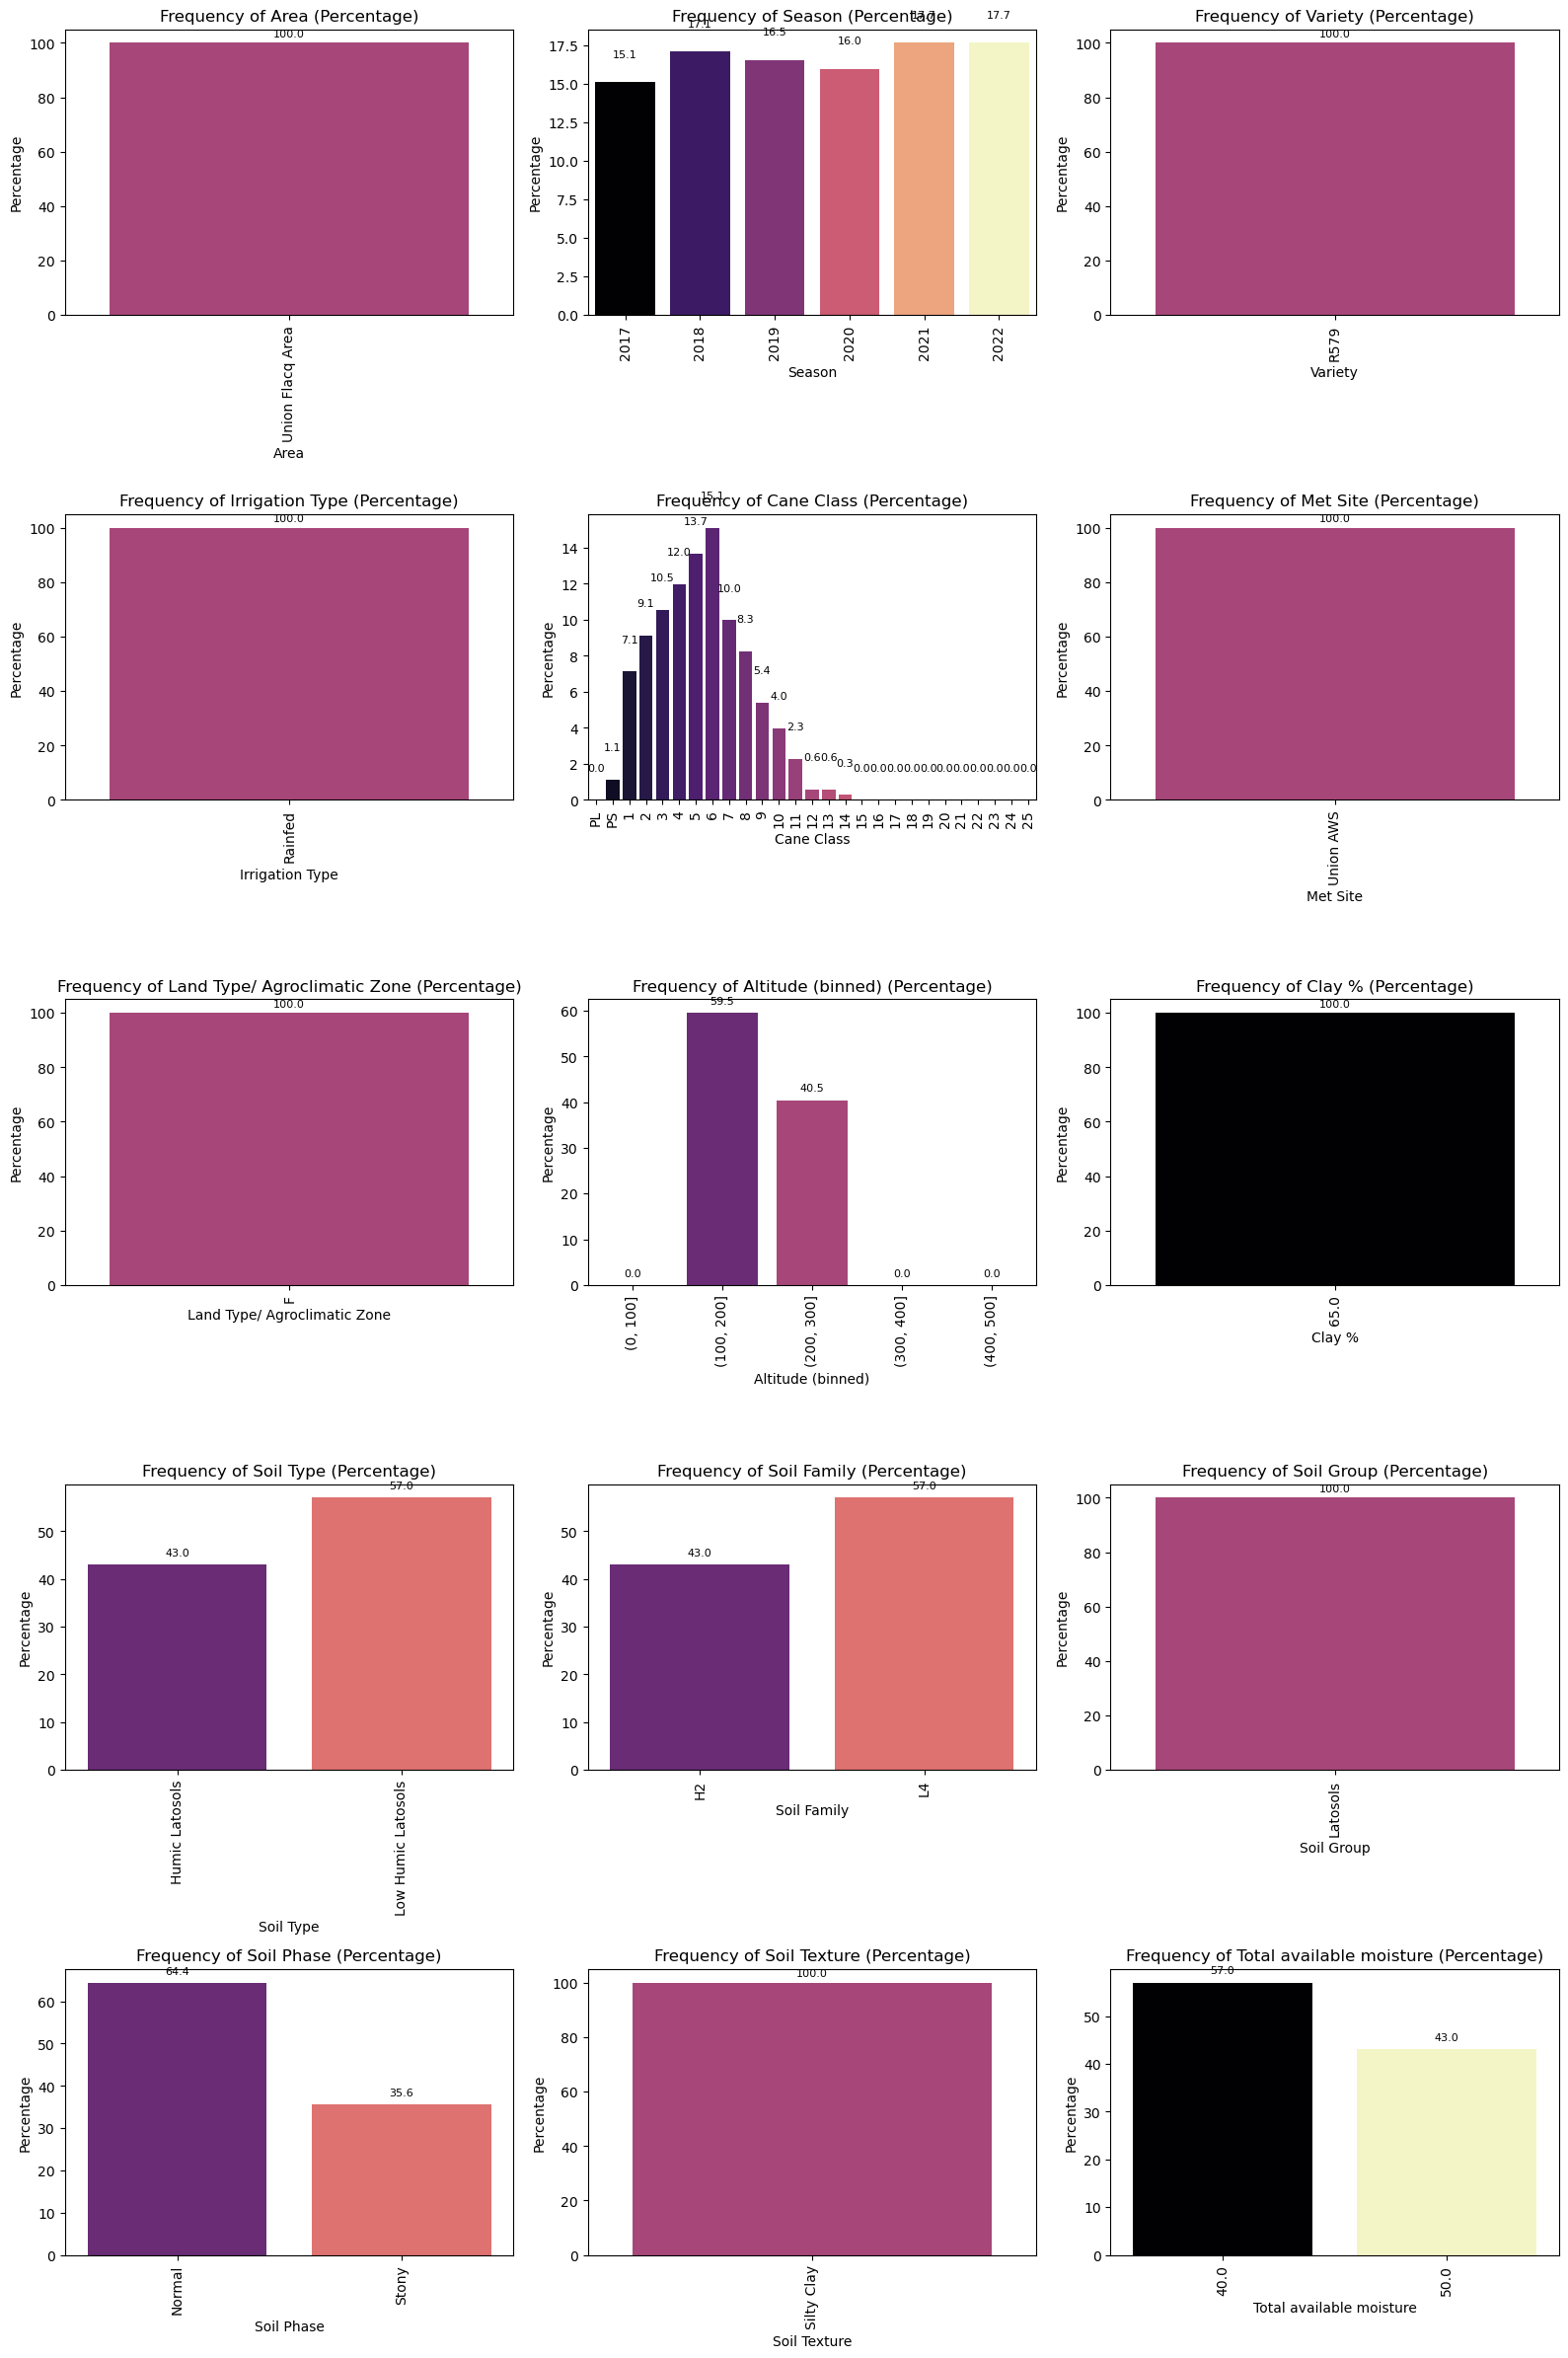

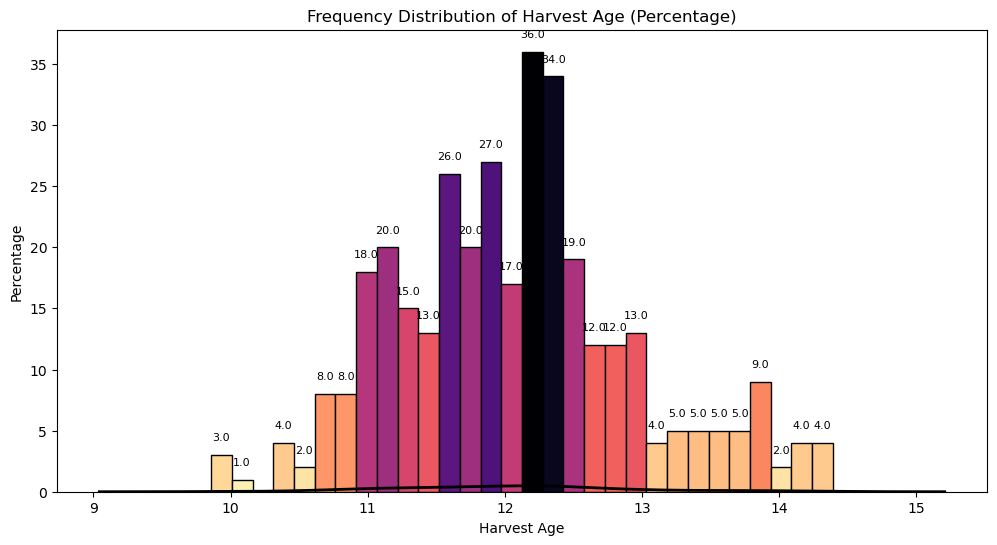

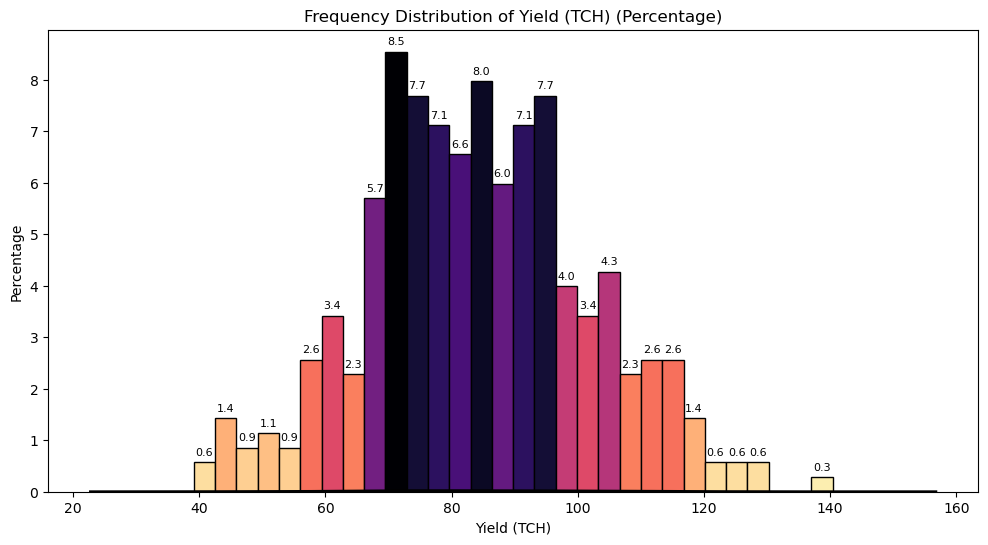

In [76]:
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization
import seaborn as sns  # Importing Seaborn for statistical plots
import pandas as pd  # Importing Pandas for handling data in DataFrame format
import numpy as np  # Importing NumPy for numerical operations

# Preprocessing

# Convert 'Cane Class' to string type to ensure consistent sorting and counting
season_data["Cane Class"] = season_data["Cane Class"].astype(str)  # Ensures Cane Class is treated as a string
# Define custom order for Cane Class categories (PL, PS, and 1 to 25)
cane_class_order = ["PL", "PS"] + [str(i) for i in range(1, 26)]  # Defining the order of Cane Class categories
# Apply the custom ordering to 'Cane Class' column
season_data["Cane Class"] = pd.Categorical(season_data["Cane Class"], categories=cane_class_order, ordered=True)

# Create bins for the 'Altitude (m)' column, with upper bound at 500 meters
altitude_bins = [0, 100, 200, 300, 400, 500]  # Define the altitude ranges
season_data["Altitude (binned)"] = pd.cut(season_data["Altitude (m)"], bins=altitude_bins)
# This categorizes the data into bins based on the altitude range (e.g., 0-100m, 101-200m, etc.)

# List of attributes for which we will generate count plots
attributes = [
    "Area", "Season", "Variety", "Irrigation Type", "Cane Class", "Met Site",
    "Land Type/ Agroclimatic Zone", "Altitude (binned)", "Clay %", "Soil Type", 
    "Soil Family", "Soil Group", "Soil Phase", "Soil Texture", "Total available moisture"
]

# Visualization: Grid of Count Plots showing frequencies as percentages
plt.figure(figsize=(16, 24))  # Set the figure size for the grid of charts
for i, attr in enumerate(attributes, 1):  # Iterate through the attributes
    plt.subplot(5, 3, i)  # Create a 5x3 grid for subplots
    data_counts = season_data[attr].value_counts(normalize=True).sort_index() * 100  # Calculate percentage frequency
    sns.barplot(
        x=data_counts.index,  # X-axis: attribute categories
        y=data_counts.values,  # Y-axis: corresponding percentage values
        hue=data_counts.index,  # Assign categories to 'hue' to satisfy Seaborn API
        dodge=False,  # Combine bars for each category into a single bar
        palette="magma",  # Set color palette for the bars
        legend=False  # Disable the legend (since we're showing only one category at a time)
    )
    plt.title(f"Frequency of {attr} (Percentage)")  # Title of each subplot
    plt.ylabel("Percentage")  # Y-axis label showing the percentage frequency
    plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
    for idx, value in enumerate(data_counts.values):  # Loop through each bar to add data labels
        plt.text(idx, value + 1.5, f"{value:.1f}", ha="center", va="bottom", fontsize=8)  # Display the percentage above each bar

plt.tight_layout()  # Adjust the layout to ensure subplots fit within the figure area
plt.show()  # Display the grid of plots

# Visualization: Frequency Distribution Curve for "Harvest Age"
plt.figure(figsize=(12, 6))  # Set the figure size for the plot

# Apply reversed magma color scheme for histogram bars
cmap = plt.get_cmap("magma_r")  # Use reversed 'magma' color map for histogram bars
hist_data, bin_edges = np.histogram(season_data["Harvest Age"], bins=30)  # Compute histogram data for 'Harvest Age'
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])  # Calculate the centers of each bin for plotting
colors = [cmap(x / max(hist_data)) for x in hist_data]  # Normalize the color intensity based on frequency

# Plot histogram bars with color intensity representing frequency
for i, (height, color) in enumerate(zip(hist_data, colors)):
    plt.bar(bin_centers[i], height, width=bin_edges[1] - bin_edges[0], color=color, edgecolor="black")

# Add KDE (Kernel Density Estimation) curve to the histogram
sns.kdeplot(
    season_data["Harvest Age"],  # KDE plot for "Harvest Age"
    color="black",  # Set KDE line color to black
    linewidth=2,  # Set the line width for the KDE curve
    label="KDE Curve (Density)"  # Label the KDE curve
)

plt.title("Frequency Distribution of Harvest Age (Percentage)")  # Set title of the plot
plt.xlabel("Harvest Age")  # Label the x-axis
plt.ylabel("Percentage")  # Label the y-axis (percentage of occurrences)
plt.legend([], [], frameon=False)  # Remove the legend for clarity

# Add data labels for the histogram bars
for center, count in zip(bin_centers, hist_data):
    if count > 0:  # Only label bins with positive counts
        plt.text(center, count + 1.0, f"{count:.1f}", ha="center", va="bottom", fontsize=8)

plt.show()  # Display the plot

# Visualization: Frequency Distribution Curve for "Yield (TCH)"
plt.figure(figsize=(12, 6))  # Set the figure size for the plot

# Compute histogram with absolute frequencies for Yield (TCH)
hist_data, bin_edges = np.histogram(season_data["Yield (TCH)"], bins=30)  # Calculate histogram data for 'Yield (TCH)'
total_count = hist_data.sum()  # Total number of data points
hist_data = (hist_data / total_count) * 100  # Convert histogram frequencies to percentages

# Calculate bin centers for plotting
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Apply reversed magma color scheme for the histogram bars
cmap = plt.get_cmap("magma_r")
colors = [cmap(x / max(hist_data)) for x in hist_data]  # Normalize the colors based on frequency

# Plot histogram bars with percentages
for i, (height, color) in enumerate(zip(hist_data, colors)):
    plt.bar(bin_centers[i], height, width=bin_edges[1] - bin_edges[0], color=color, edgecolor="black")

# Add KDE plot for 'Yield (TCH)'
sns.kdeplot(
    season_data["Yield (TCH)"],  # Plot KDE for Yield (TCH)
    color="black",  # Set KDE line color to black
    linewidth=2,  # Set the KDE line width
    label="KDE Curve (Density)"  # Label the KDE curve
)

# Set titles and labels for the plot
plt.title("Frequency Distribution of Yield (TCH) (Percentage)")  # Set title
plt.xlabel("Yield (TCH)")  # Label the x-axis
plt.ylabel("Percentage")  # Label the y-axis (percentage)
plt.legend([], [], frameon=False)  # Remove the legend for clarity

# Add data labels for the histogram bars
for center, count in zip(bin_centers, hist_data):
    if count > 0:  # Only label bins with counts greater than 0
        plt.text(center, count + 0.1, f"{count:.1f}", ha="center", va="bottom", fontsize=8)

plt.show()  # Display the plot

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Preprocessing**:
   - **Cane Class Sorting**: The `Cane Class` column is converted to a string and ordered using `pd.Categorical()`. This ensures that the categories are in a logical order for sorting and counting.
   - **Altitude Binning**: The `Altitude (m)` column is divided into bins (0-100, 101-200, etc.) using `pd.cut()` to simplify analysis based on altitude ranges.
<br>
2. **Count Plot Visualization**:
   - **Normalization**: The value counts of the attributes are normalized to percentages (`normalize=True`), so the bar plot shows the distribution of the data in percentage terms rather than raw counts.
   - **Data Labeling**: The exact percentage values are annotated on top of each bar for clarity.
<br>
3. **Frequency Distribution with KDE**:
   - **Histogram**: A histogram is created using `np.histogram()`, and the frequency is plotted as a bar chart. The histogram data is normalized to show percentages.
   - **KDE (Kernel Density Estimation)**: A KDE curve is overlaid on the histogram using `sns.kdeplot()`. The KDE provides a smoothed estimation of the distribution.
   - **Coloring**: The bars are colored using the `magma` colormap, which is reversed (`magma_r`) to give a visually appealing color scheme based on the frequency of the data.
<br>
4. **Final Plots**:
   - The final visualizations provide insights into the distributions of `Harvest Age` and `Yield (TCH)` based on the data, with both the histogram and KDE plotted for clarity. Labels are added to bins with data for better understanding.

</details>

#### 2.1.7. Updated Season History Records: Visualization of Percentage Overlaps Between Soil Attributes: Soil Type, Soil Family, and Soil Phase

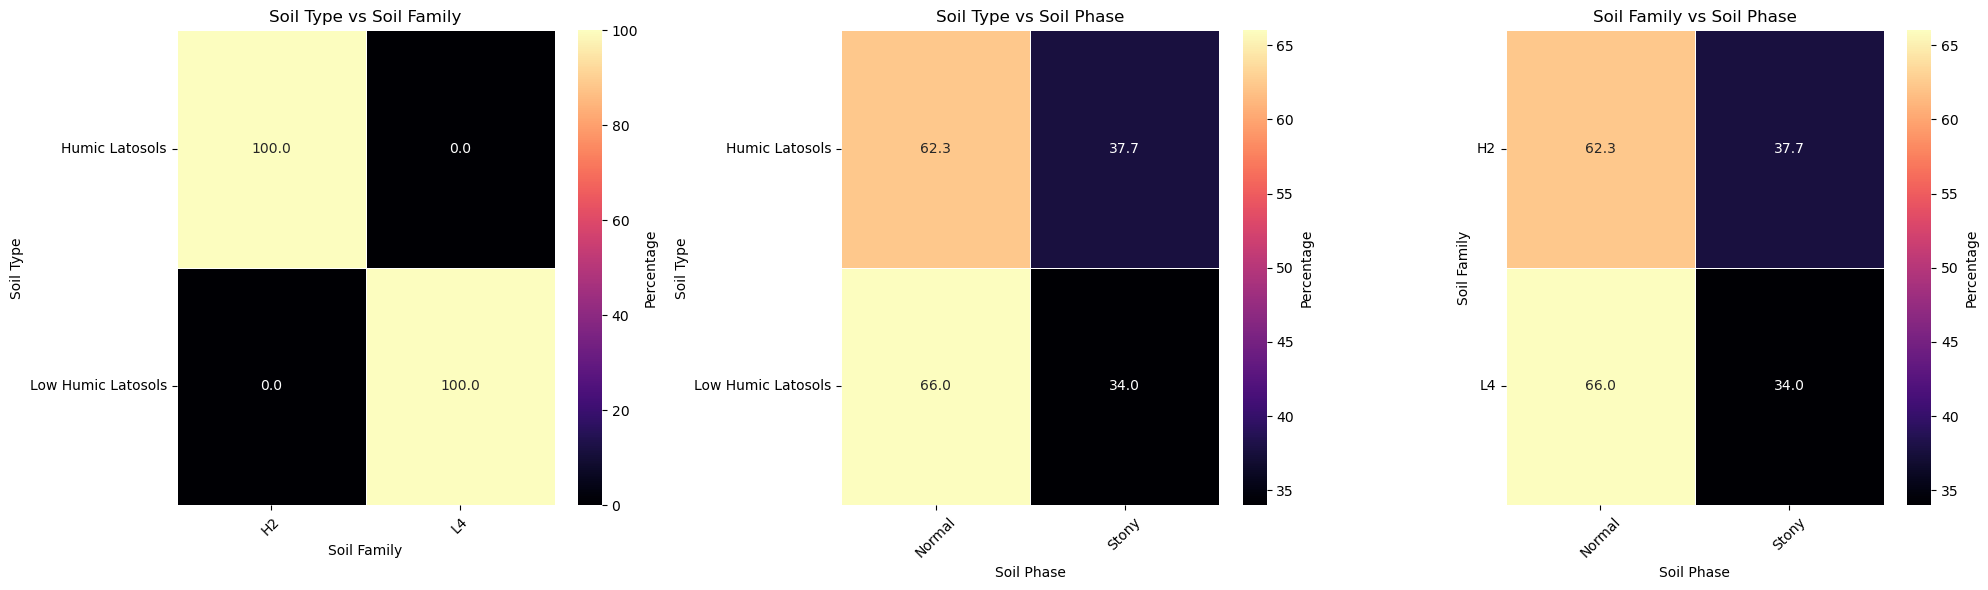

In [77]:
import pandas as pd  # Importing Pandas for data manipulation and analysis
import seaborn as sns  # Importing Seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

# Attributes to analyze for overlap
attributes = ["Soil Type", "Soil Family", "Soil Phase"]  # List of attributes to analyze for overlap in the data

# Generate unique combinations of attributes
# This will create pairs of attributes from the 'attributes' list
unique_combinations = [(attributes[i], attributes[j]) for i in range(len(attributes)) for j in range(i + 1, len(attributes))]
# This results in a list of tuples like: ('Soil Type', 'Soil Family'), ('Soil Type', 'Soil Phase'), ('Soil Family', 'Soil Phase')

# Initialize a dictionary to store cross-tabulation data
crosstabs = {}  # This dictionary will store the cross-tabulation data for each attribute combination

# Calculate cross-tabulations as percentages
for attr1, attr2 in unique_combinations:  # Iterate through each unique pair of attributes
    # Calculate cross-tabulation
    crosstab = pd.crosstab(season_data[attr1], season_data[attr2], normalize="index") * 100
    # `pd.crosstab()` generates a cross-tabulation between two columns
    # `normalize="index"` normalizes the values by the row, so each row sums to 100%
    # The result is multiplied by 100 to convert it to percentage values
    crosstabs[(attr1, attr2)] = crosstab  # Store the resulting cross-tabulation in the dictionary

# Plot all unique heatmaps in a grid
# Create a figure with subplots for each heatmap, adjusting the size of the figure
fig, axes = plt.subplots(1, len(crosstabs), figsize=(20, 6))
# The number of subplots is determined by the length of the `crosstabs` dictionary

for idx, ((attr1, attr2), crosstab) in enumerate(crosstabs.items()):  # Iterate through the cross-tabulations and their axes
    ax = axes[idx]  # Access the corresponding axis for the subplot
    sns.heatmap(
        crosstab,  # The data to be plotted as a heatmap
        annot=True,  # Annotate the cells with the numeric values
        fmt=".1f",  # Format the annotations as floating-point numbers with 1 decimal place
        cmap="magma",  # Set the color map to 'magma', which provides a perceptually uniform color scale
        cbar_kws={"label": "Percentage"},  # Set the color bar label to 'Percentage'
        linewidths=0.5,  # Set the linewidths between heatmap cells
        ax=ax,  # Specify the axis for this subplot
    )
    ax.set_title(f"{attr1} vs {attr2}")  # Set the title of the subplot
    ax.set_xlabel(attr2)  # Label the x-axis with the second attribute
    ax.set_ylabel(attr1)  # Label the y-axis with the first attribute
    ax.tick_params(axis="x", rotation=45)  # Rotate the x-axis labels for better readability
    ax.tick_params(axis="y", rotation=0)  # Keep y-axis labels horizontal

plt.tight_layout()  # Adjust the layout of the subplots to prevent overlapping labels and titles
plt.show()  # Display the plot

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Cross-Tabulation**: 
   - `pd.crosstab()` is used to compute a cross-tabulation (contingency table) between two categorical variables, showing how the values of one variable relate to the values of another.
   - `normalize="index"` ensures that the percentages are calculated within each row, making the rows sum to 100%.
<br>
2. **Heatmaps**: 
   - Seaborn’s `sns.heatmap()` is used to visualize the cross-tabulated data. Each heatmap represents the relationship between two attributes, with the color intensity indicating the percentage values. 
   - `annot=True` adds the numerical value inside each cell of the heatmap, making it easier to interpret the data visually.
   - `cmap="magma"` specifies the color map used for the heatmap. The 'magma' color palette is perceptually uniform, meaning it provides consistent color intensity that corresponds to the data's values.
<br>
3. **Multiple Subplots**:
   - `plt.subplots()` creates multiple subplots in a grid layout. Here, the number of subplots is determined by the number of unique attribute pairs (`len(crosstabs)`).
   - The heatmaps for each combination of attributes are placed into the grid for side-by-side comparison.
<br>
4. **Rotation of Axis Labels**:
   - `ax.tick_params(axis="x", rotation=45)` and `ax.tick_params(axis="y", rotation=0)` adjust the rotation of the x-axis and y-axis labels for better readability, especially when the attribute names are long.
<br>
5. **Tight Layout**:
   - `plt.tight_layout()` adjusts the spacing of the subplots to ensure that labels, titles, and axes are properly aligned without overlap.

**Purpose:**
This code is designed to generate visualizations that allow you to explore and compare the relationships between different categorical attributes in the `season_data` DataFrame using heatmaps. The heatmaps help you to visually identify any patterns or correlations in the data based on percentages.


</details>

#### 2.1.7. Season History Records: Yield (TCH) Box Plot with Outlier Detection

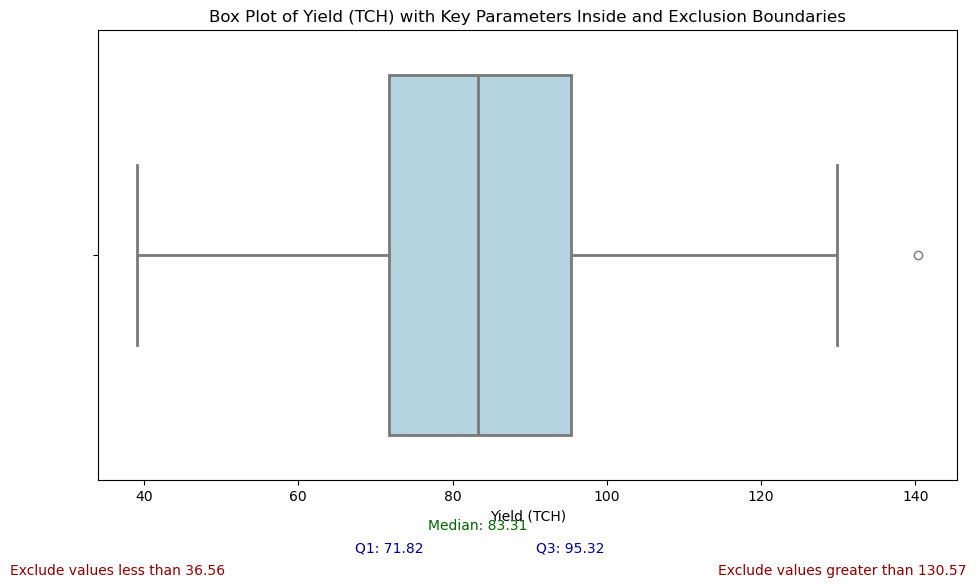

Outliers for 'Yield (TCH)':

Outliers less than lower bound (values to exclude):
Empty DataFrame
Columns: [Yield (TCH)]
Index: []

Outliers greater than upper bound (values to exclude):
       Yield (TCH)
45959   140.377734


In [78]:
import matplotlib.pyplot as plt  # Importing Matplotlib for creating visualizations
import seaborn as sns  # Importing Seaborn for creating statistical plots
import pandas as pd  # Importing Pandas for data manipulation
import numpy as np  # Importing Numpy for numerical operations

# Box Plot and Outlier Detection for Yield (TCH)

# Calculate Q1, Q3, Median, IQR, and bounds for annotation
# Q1 and Q3 are the first and third quartiles, representing the 25th and 75th percentiles, respectively.
# Median is the middle value of the data, and IQR is the Interquartile Range (Q3 - Q1), which measures statistical spread.
Q1 = season_data["Yield (TCH)"].quantile(0.25)  # Calculate 25th percentile (Q1)
Q3 = season_data["Yield (TCH)"].quantile(0.75)  # Calculate 75th percentile (Q3)
median = season_data["Yield (TCH)"].median()  # Calculate the median (middle value)
IQR = Q3 - Q1  # Interquartile range (Q3 - Q1)
lower_bound = Q1 - 1.5 * IQR  # Lower bound for outlier detection (1.5 * IQR below Q1)
upper_bound = Q3 + 1.5 * IQR  # Upper bound for outlier detection (1.5 * IQR above Q3)

# Create a reduced chart size for better fit
plt.figure(figsize=(10, 6))  # Adjusted chart size for a more compact view
# Create a box plot for 'Yield (TCH)' with customized aesthetics
sns.boxplot(x=season_data["Yield (TCH)"], color="lightblue", fliersize=6, linewidth=2)
# fliersize=6 sets the size of the outlier markers, and linewidth=2 makes the plot's lines thicker

# Add annotations for Q1, Q3, and Median inside the box plot with reduced vertical distance
# Annotating the box plot with Q1, Q3, and Median values inside the plot to provide context.
plt.text(Q1, 0.65, f'Q1: {Q1:.2f}', ha='center', va='center', fontsize=10, color='darkblue')  # Q1 annotation
plt.text(Q3, 0.65, f'Q3: {Q3:.2f}', ha='center', va='center', fontsize=10, color='darkblue')  # Q3 annotation
plt.text(median, 0.60, f'Median: {median:.2f}', ha='center', va='center', fontsize=10, color='darkgreen')  # Median annotation

# Adjust the position of lower and upper bound labels to be closer inside the chart
# These annotations display the lower and upper bounds for outlier exclusion.
plt.text(lower_bound, 0.70, f'Exclude values less than {lower_bound:.2f}', ha='center', va='center', fontsize=10, color='darkred')  # Lower bound annotation
plt.text(upper_bound, 0.70, f'Exclude values greater than {upper_bound:.2f}', ha='center', va='center', fontsize=10, color='darkred')  # Upper bound annotation

# Title and labels
plt.title("Box Plot of Yield (TCH) with Key Parameters Inside and Exclusion Boundaries")  # Title of the plot
plt.xlabel("Yield (TCH)")  # X-axis label

# Show plot
plt.tight_layout()  # Adjust layout to ensure labels fit properly and avoid overlap
plt.show()  # Display the plot

# Outlier Detection for Yield (TCH)

# Find outlier values below the lower bound and above the upper bound
# Outliers are identified as values outside the lower and upper bounds calculated earlier
outliers_lower = season_data[season_data["Yield (TCH)"] < lower_bound]  # Values below the lower bound
outliers_upper = season_data[season_data["Yield (TCH)"] > upper_bound]  # Values above the upper bound

# Concatenate the lower and upper outliers
# Combine the rows of outliers into one DataFrame
outliers = pd.concat([outliers_lower, outliers_upper])

# Display outlier values: less than lower bound and greater than upper bound with indices
print(f"Outliers for 'Yield (TCH)':")  # Print message
print("\nOutliers less than lower bound (values to exclude):")  # Print lower bound outliers
print(outliers_lower[["Yield (TCH)"]])  # Display the outliers below the lower bound

print("\nOutliers greater than upper bound (values to exclude):")  # Print upper bound outliers
print(outliers_upper[["Yield (TCH)"]])  # Display the outliers above the upper bound

# Optionally, if you want to exclude these outliers, you can drop them like this:
# The following code can be used to remove the outliers from the DataFrame.
# season_data_cleaned = season_data[~season_data.index.isin(outliers.index)]
# This will remove the rows that have outliers, keeping only the rows within the bounds.

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Box Plot**:
   - A box plot visually represents the distribution of a dataset, highlighting the median, quartiles (Q1 and Q3), and potential outliers.
   - The "whiskers" extend from the box to the minimum and maximum data values within the lower and upper bounds (1.5 * IQR).
   - Data points outside of these whiskers are considered outliers, and they are typically marked individually in the plot.
<br>
2. **Quartiles**:
   - **Q1 (25th percentile)**: The value below which 25% of the data fall.
   - **Q3 (75th percentile)**: The value below which 75% of the data fall.
   - **Median (50th percentile)**: The middle value of the data.
   - **IQR (Interquartile Range)**: The difference between Q3 and Q1, representing the spread of the middle 50% of the data.
<br>
3. **Outlier Detection**:
   - Outliers are values that fall outside the range defined by the lower and upper bounds.
   - **Lower bound**: `Q1 - 1.5 * IQR`
   - **Upper bound**: `Q3 + 1.5 * IQR`
   - Any data points below the lower bound or above the upper bound are considered outliers.
<br>
4. **Annotations**:
   - Annotations are added to the box plot to label the values of Q1, Q3, the median, and the exclusion boundaries for outliers.
   - These labels are placed inside the plot for clarity, with custom positioning to ensure that they fit neatly within the plot.
<br>
5. **Handling Outliers**:
   - After detecting outliers, you can optionally exclude them from the data using the `drop` function, which removes the rows containing outliers from the DataFrame.

**Purpose:**
This code creates a box plot of "Yield (TCH)" and detects outliers based on the IQR method. The outliers are displayed, and the user can opt to remove these outliers from the data for further analysis. The plot annotations provide detailed insights into the distribution of the "Yield (TCH)" values, including the interquartile range and exclusion boundaries.

</details>

#### 2.1.8. Season History Records: Filter Out Data with Outliers for Yield (TCH) in Season History Records

In [79]:
# Filter out rows where Yield (TCH) is less than the lower bound or greater than the upper bound
season_data_cleaned = season_data[
    (season_data["Yield (TCH)"] >= lower_bound) & (season_data["Yield (TCH)"] <= upper_bound)
]

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Context**:
   - The goal of this code block is to clean the `season_data` DataFrame by removing outliers from the "Yield (TCH)" column. These outliers are values that fall outside of a defined range, specifically the values lower than the `lower_bound` and higher than the `upper_bound` calculated previously using the interquartile range (IQR) method.
<br>
2. **The Code**:
   - `season_data["Yield (TCH)"] >= lower_bound`: This checks whether each value in the "Yield (TCH)" column is greater than or equal to the `lower_bound`. The `lower_bound` was calculated as `Q1 - 1.5 * IQR`, where `Q1` is the first quartile and `IQR` is the interquartile range.
   - `season_data["Yield (TCH)"] <= upper_bound`: This checks whether each value in the "Yield (TCH)" column is less than or equal to the `upper_bound`. The `upper_bound` was calculated as `Q3 + 1.5 * IQR`, where `Q3` is the third quartile.
   - The `&` operator is used to combine both conditions with a logical AND. This means that both conditions must be true for a row to be included in the resulting `season_data_cleaned` DataFrame.
<br>   
3. **Result**:
   - The code will filter the rows of `season_data` where the values of "Yield (TCH)" fall within the range `[lower_bound, upper_bound]`. Rows where "Yield (TCH)" is below the lower bound or above the upper bound are excluded, effectively removing outliers.
<br>   
4. **Final Output**:
   - The `season_data_cleaned` DataFrame will contain only the rows where the "Yield (TCH)" values are within the acceptable range, and the outliers have been removed.

Example Scenario:
If the "Yield (TCH)" values for the dataset range from 10 to 200, and the calculated `lower_bound` is 15 and `upper_bound` is 180, then any rows with "Yield (TCH)" values below 15 or above 180 will be excluded from `season_data_cleaned`.

**Purpose:**
This code is useful for data cleaning and preprocessing, as it ensures that extreme outliers, which could distort statistical analyses or machine learning models, are removed from the dataset.

</details>

#### 2.1.9. Season History Records: Yield (TCH) Box Plot (Outlier-Excluded)

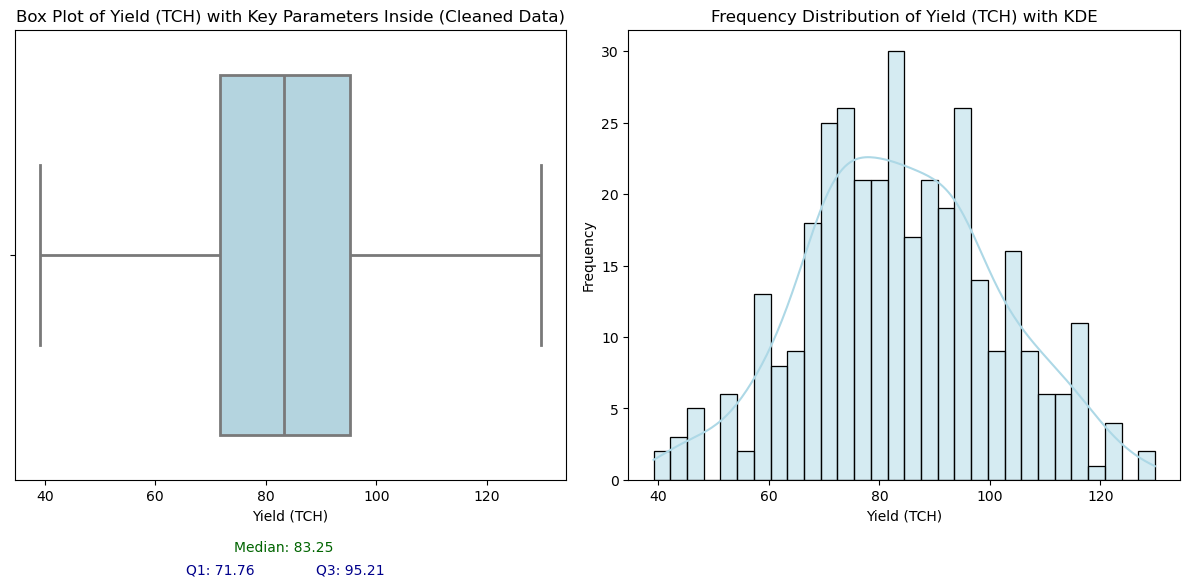

In [80]:
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns  # For statistical data visualization using seaborn

# Create a figure with two subplots: one for box plot and one for frequency distribution curve
plt.figure(figsize=(12, 6))  # Adjusted chart size for better fit (12x6 inches)

# First subplot: Box Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(x=season_data_cleaned["Yield (TCH)"], color="lightblue", fliersize=6, linewidth=2)  
# sns.boxplot creates a box plot with "Yield (TCH)" from the cleaned data
# fliersize=6: Sets the size of the outlier points
# linewidth=2: Sets the width of the box plot borders

# Calculate Q1, Q3, Median, IQR for annotation with the cleaned data
Q1_cleaned = season_data_cleaned["Yield (TCH)"].quantile(0.25)  # First quartile (25th percentile)
Q3_cleaned = season_data_cleaned["Yield (TCH)"].quantile(0.75)  # Third quartile (75th percentile)
median_cleaned = season_data_cleaned["Yield (TCH)"].median()  # Median (50th percentile)

# Add annotations for Q1, Q3, and Median inside the box plot with reduced vertical distance
plt.text(Q1_cleaned, 0.70, f'Q1: {Q1_cleaned:.2f}', ha='center', va='center', fontsize=10, color='darkblue')  # Annotate Q1
plt.text(Q3_cleaned, 0.70, f'Q3: {Q3_cleaned:.2f}', ha='center', va='center', fontsize=10, color='darkblue')  # Annotate Q3
plt.text(median_cleaned, 0.65, f'Median: {median_cleaned:.2f}', ha='center', va='center', fontsize=10, color='darkgreen')  # Annotate Median

# Title and labels for box plot
plt.title("Box Plot of Yield (TCH) with Key Parameters Inside (Cleaned Data)")  # Title for the box plot
plt.xlabel("Yield (TCH)")  # Label for the x-axis

# Second subplot: Frequency Distribution Curve (KDE)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.histplot(season_data_cleaned["Yield (TCH)"], bins=30, kde=True, color="lightblue", edgecolor="black")  
# sns.histplot creates a histogram with a KDE (Kernel Density Estimate) curve on top
# bins=30: Divides the data into 30 bins (for histogram)
# kde=True: Adds the KDE curve to the histogram
# color="lightblue": Sets the color of the histogram bars
# edgecolor="black": Adds black edges to the bars for better visibility

# Title and labels for frequency distribution curve
plt.title("Frequency Distribution of Yield (TCH) with KDE")  # Title for the KDE plot
plt.xlabel("Yield (TCH)")  # Label for the x-axis
plt.ylabel("Frequency")  # Label for the y-axis

# Adjust layout to ensure both plots fit properly
plt.tight_layout()  # Automatically adjusts subplots to fit the figure area without overlap

# Show both plots
plt.show()  # Displays the figure with both subplots

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Figure Creation**:
   - The `plt.figure(figsize=(12, 6))` line initializes a figure with a width of 12 inches and a height of 6 inches. This provides adequate space for two side-by-side plots.
<br>
2. **First Subplot (Box Plot)**:
   - A box plot is created for the "Yield (TCH)" column of the cleaned data. The box plot visualizes the distribution of "Yield (TCH)" and identifies the central tendency (median), spread (IQR), and outliers.
   - **Annotations**:
     - `Q1`, `Q3`, and `Median` values are added to the plot using `plt.text`. These annotations provide more context for the data's spread and central tendency inside the box plot.
<br>
3. **Second Subplot (Frequency Distribution Curve / KDE)**:
   - A histogram with a Kernel Density Estimate (KDE) is created for "Yield (TCH)" using `sns.histplot`. The histogram shows the frequency distribution of the data, while the KDE curve helps visualize the smoothed probability density of the variable.
   - **KDE**:
     - The `sns.kdeplot` adds the smoothed curve, which can be helpful to understand the shape of the distribution beyond just the bins of the histogram.
<br>
4. **Layout Adjustment**:
   - `plt.tight_layout()` adjusts the subplots within the figure to prevent overlap and ensures that both plots are clearly visible without any clipping of labels or titles.
<br>
5. **Final Display**:
   - `plt.show()` displays the final figure with both the box plot and the frequency distribution curve side by side.

**Purpose of the Visualization:**
- The **Box Plot** provides insights into the spread of the "Yield (TCH)" data, helping to visually detect outliers and the interquartile range.
- The **KDE with Histogram** shows the overall distribution of "Yield (TCH)" values, and the KDE curve helps in understanding the underlying density of the data.

</details>

#### 2.1.10. Season History Records: Standardizing Cane Class: Converting PL and PS to 0 and Retaining Numeric Values as Whole Numbers

In [81]:
# Convert Cane Class: PL and PS to 0, keep numerical values
season_data["Cane Class"] = season_data["Cane Class"].apply(
    lambda x: 0 if x in ["PL", "PS"] else int(x)
)
# season_data["Cane Class"] refers to the "Cane Class" column in the dataframe
# The .apply() function applies a function to each element of the "Cane Class" column
# Here, the lambda function checks if the value is "PL" or "PS" and replaces it with 0.
# If the value is not "PL" or "PS", it converts the string value to an integer using int(x).
# This transformation turns non-numeric values (PL and PS) into a uniform numeric value (0), making it easier to perform numerical analysis.

# Ensure the data type is numeric
season_data["Cane Class"] = pd.to_numeric(season_data["Cane Class"], downcast="integer")
# pd.to_numeric() converts the "Cane Class" column to a numeric data type.
# The downcast="integer" argument ensures that the column is converted to the smallest possible integer type that can hold the data without loss.
# This helps optimize memory usage when dealing with large datasets, ensuring that the column type is appropriate for numerical operations.

# Display a random sample of the updated DataFrame
season_data.sample(5)
# .sample(5) is used to display 5 random rows from the updated "season_data" dataframe.
# This gives a quick overview of the data to ensure that the "Cane Class" column has been updated correctly.
# It allows for verification that "PL" and "PS" have been replaced with 0 and that other numeric values are intact.

Area   Field  Season Variety Irrigation Type  Cane Class  \
42128  Union Flacq Area  754236    2022    R579         Rainfed           1   
45961  Union Flacq Area  756503    2021    R579         Rainfed           5   
44547  Union Flacq Area  755518    2022    R579         Rainfed           9   
46024  Union Flacq Area  756502    2018    R579         Rainfed           2   
46003  Union Flacq Area  756505    2019    R579         Rainfed           3   

      Grow Start Date Actual Cut Date   Met Site  Yield (TCH)  ...  \
42128      2021-12-05      2022-11-29  Union AWS    77.979937  ...   
45961      2020-10-30      2021-11-17  Union AWS    67.872763  ...   
44547      2021-10-21      2022-09-20  Union AWS    79.827687  ...   
46024      2017-09-09      2018-11-15  Union AWS    43.496052  ...   
46003      2018-10-10      2019-10-24  Union AWS    59.408845  ...   

       Altitude (m) Clay %           Soil Type  Soil Family Soil Group  \
42128         255.0   65.0      Humic Latosols           H2   Latosols   
45961         191.0   65.0  Low Humic Latosols           L4   Latosols   
44547         198.0   65.0  Low Humic Latosols           L4   Latosols   
46024         183.0   65.0  Low Humic Latosols           L4   Latosols   
46003         198.0   65.0  Low Humic Latosols           L4   Latosols   

      Soil Phase Soil Texture Last Planted Total available moisture  \
42128     Normal   Silty Clay   2020-10-10                     50.0   
45961     Normal   Silty Clay   2015-03-12                     40.0   
44547      Stony   Silty Clay   2011-03-25                     40.0   
46024     Normal   Silty Clay   2015-03-17                     40.0   
46003     Normal   Silty Clay   2015-03-19                     40.0   

      Altitude (binned)  
42128        (200, 300]  
45961        (100, 200]  
44547        (100, 200]  
46024        (100, 200]  
46003        (100, 200]  

[5 rows x 22 columns]

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **`.apply()` function**:
   - This is a powerful function in pandas that applies a given function (in this case, a lambda function) to each element in the Series (column). It is often used when you need to modify or transform data in a specific column based on certain conditions.
<br>
2. **Lambda Function**:
   - The lambda function `lambda x: 0 if x in ["PL", "PS"] else int(x)` checks the value of `x` (each element in the column) and applies the condition. If `x` is either "PL" or "PS", it assigns the value 0. Otherwise, it converts the value to an integer.
<br>
3. **`.to_numeric()` function**:
   - This function converts a column to a numeric type. Using `downcast="integer"` ensures the smallest possible integer type is used, optimizing memory usage.
<br>
4. **`.sample()` function**:
   - This function is used to view a random sample of rows from the DataFrame. It helps in quickly verifying the changes made, ensuring the transformation has been applied correctly.

**Goal:**
- The goal of this code is to convert the "Cane Class" column so that the values "PL" and "PS" are replaced by 0, while the remaining numeric values (from 1 to 25) are preserved as integers. The final result is a DataFrame where "Cane Class" contains only numeric values, which can be more easily used for analysis or machine learning models.

</details>

#### 2.1.11. Season History Records: Condensing season_data by Excluding Non-Core Columns

In [82]:
# Drop specified columns if they exist in the DataFrame
columns_to_drop = [
    "Area", "Variety", "Irrigation Type", "Met Site",  # Columns related to location and irrigation
    "Land Type/ Agroclimatic Zone", "Clay %", "Soil Family",  # Columns related to soil properties
    "Soil Group", "Soil Texture", "Last Planted", "Altitude (binned)"  # More soil-related columns and planting details
]
# This list `columns_to_drop` defines the names of columns that should be dropped from the `season_data` DataFrame.
# The columns are identified based on the user's requirement or analysis focus.

# Only drop columns that are present in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in season_data.columns]
# This line checks whether each column in the `columns_to_drop` list actually exists in the DataFrame's columns.
# If the column is found in `season_data.columns`, it is included in the final list `columns_to_drop`.
# This prevents errors in case some of the columns do not exist in the DataFrame.

season_data = season_data.drop(columns=columns_to_drop)
# The `.drop()` function is used to drop the columns that are present in the `columns_to_drop` list.
# The `columns=columns_to_drop` argument tells pandas to drop the columns listed in `columns_to_drop`.
# The operation modifies the `season_data` DataFrame by removing these columns.

# Display a random sample of the updated DataFrame
season_data.sample(10)
# `.sample(10)` randomly selects 10 rows from the updated `season_data` DataFrame and displays them.
# This allows the user to verify that the specified columns have been correctly removed from the DataFrame.
# It provides a quick preview of the data after the columns have been dropped.

Field  Season  Cane Class Grow Start Date Actual Cut Date  \
42151  754221    2022           6      2021-11-12      2022-11-12   
44545  755518    2020           7      2019-10-25      2020-10-09   
45748  756627    2017           3      2016-11-15      2017-12-22   
42007  754201    2021           8      2020-12-02      2021-12-13   
41842  754104    2021           7      2020-11-29      2021-12-07   
42078  754223    2021           5      2020-11-26      2021-12-01   
41885  754106    2021           7      2020-12-04      2021-12-07   
45982  756504    2020           4      2019-10-15      2020-10-29   
45294  776928    2021           0      2020-09-13      2021-11-16   
42276  754403    2018           2      2017-10-12      2018-10-05   

       Yield (TCH)  Harvest Age  Altitude (m)           Soil Type Soil Phase  \
42151    78.742322    11.993757         248.0      Humic Latosols     Normal   
44545    85.517917    11.500863         198.0  Low Humic Latosols      Stony   
45748   103.061759    13.209562         168.0  Low Humic Latosols     Normal   
42007    79.093573    12.355212         241.0      Humic Latosols     Normal   
41842    83.780565    12.256634         219.0      Humic Latosols     Normal   
42078    78.694314    12.158055         248.0      Humic Latosols     Normal   
41885    85.430538    12.092335         218.0      Humic Latosols      Stony   
45982    54.154476    12.486651         204.0  Low Humic Latosols     Normal   
45294    95.795980    14.096772         145.0  Low Humic Latosols      Stony   
42276    71.701589    11.763739         253.0      Humic Latosols     Normal   

       Total available moisture  
42151                      50.0  
44545                      40.0  
45748                      40.0  
42007                      50.0  
41842                      50.0  
42078                      50.0  
41885                      50.0  
45982                      40.0  
45294                      40.0  
42276                      50.0

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **List Comprehension**:
   - The list comprehension `[col for col in columns_to_drop if col in season_data.columns]` is used to filter the columns that exist in the DataFrame. Only those columns from `columns_to_drop` that are actually present in `season_data` will be retained in the final list.
<br>
2. **`.drop()` Function**:
   - This function is used to remove specified rows or columns from a DataFrame. In this case, we are dropping columns. The `columns=columns_to_drop` argument ensures that the columns identified in the list are removed.
<br>
3. **`.sample()` Function**:
   - The `.sample()` function is used to select a random subset of rows from a DataFrame. It is particularly useful when you want to check or preview a portion of the data after performing an operation, such as dropping columns in this case.

**Goal:**
- The goal of this code is to remove a set of predefined columns from the `season_data` DataFrame, ensuring that only the relevant data for analysis remains. By using `columns_to_drop`, we can easily remove multiple columns without hardcoding the column names in the `.drop()` method, making the code more flexible.

</details>

## 2.2. Load and Process Meteorological Data

In [83]:
import pandas as pd  # For loading and manipulating tabular data (Excel files, filtering, etc.)
import numpy as np  # For numerical operations and handling arrays

# Load Meteorological Data
met_data_path = r"C:\Users\HansrajR\Documents\HansrajR\Le Wagon Data Science & AI Bootcamp\Project\HansrajR\Meteorological data\Meteorological data_NoConn.xlsx"
# The path to the Excel file containing the meteorological data is stored in `met_data_path`.

met_data = pd.read_excel(met_data_path)
# The `pd.read_excel()` function is used to load the data from the specified Excel file (`met_data_path`) into a pandas DataFrame called `met_data`.
# This will read all the sheets of the Excel file into memory, and you can work with it as a table in Python.

# Filter for Union AWS and Date > November 20, 2015
met_data = met_data[
    (met_data["Meteorological site"] == "Union AWS") &  # Filter for records where the "Meteorological site" column is equal to "Union AWS".
    (pd.to_datetime(met_data["Date"]) > "2015-11-20")  # Filter for records where the "Date" column is greater than November 20, 2015.
]
# The data is filtered based on two conditions:
# 1. "Meteorological site" must be "Union AWS".
# 2. "Date" must be later than November 20, 2015.
# The `pd.to_datetime()` function is used to convert the "Date" column to pandas datetime format to ensure proper comparison.

# Keep relevant columns
met_data = met_data[
    ["Date", "Evapotranspiration", "Rainfall", "Maximum temperature",  # Retain relevant columns from the DataFrame.
     "Minimum temperature", "Radiation", "Maximum relative humidity",  # These columns are the variables of interest for analysis.
     "Minimum relative humidity", "Sunhours"]
]
# This line ensures that only the columns necessary for the analysis are retained, dropping any irrelevant data from the DataFrame.

# Display all values to 2 decimal places
met_data = met_data.round(2)
# The `round()` function is used here to round all numerical values in the DataFrame to 2 decimal places for easier reading and analysis.
# This ensures the data is presented in a cleaner, more concise format.

# Display 20 random rows from the DataFrame for a quick overview.
met_data.sample(20)
# The `sample()` function randomly selects 20 rows from the `met_data` DataFrame. This is helpful to get a quick overview of the data and check that everything has been processed correctly.
# The number 20 specifies how many rows to display from the DataFrame.

Date  Evapotranspiration  Rainfall  Maximum temperature  \
86227 2021-03-27                2.90       0.0                32.50   
87511 2024-10-01                2.96       1.0                26.59   
84940 2017-09-17                2.50       0.0                25.11   
84852 2017-06-21                1.43       4.0                26.78   
87156 2023-10-12                3.22       0.8                29.01   
84615 2016-10-27                4.49       0.4                27.93   
86119 2020-12-09                2.46      18.8                26.69   
84340 2016-01-26                2.17      15.8                30.02   
85573 2019-06-12                 NaN       0.0                23.20   
86656 2022-05-30                2.49       4.6                25.53   
85913 2020-05-17                2.47       0.6                28.19   
85973 2020-07-16                2.13       3.8                24.67   
87273 2024-02-06                2.64       1.8                29.54   
86084 2020-11-04                3.71       0.4                26.60   
84912 2017-08-20                2.26       5.6                26.29   
87264 2024-01-28                3.71       7.8                31.79   
86766 2022-09-17                3.73       2.2                25.72   
85746 2019-12-02                3.37       0.0                28.35   
84943 2017-09-20                2.89       0.0                24.84   
85311 2018-09-23                3.17       0.0                26.73   

       Minimum temperature  Radiation  Maximum relative humidity  \
86227                20.71      16.15                     100.00   
87511                17.71      13.60                      93.30   
84940                15.60      13.51                      95.93   
84852                18.74      10.12                     100.00   
87156                16.18      18.19                      93.00   
84615                19.23      21.47                      96.23   
86119                21.34       8.99                      99.40   
84340                23.99       9.69                      98.48   
85573                19.80      13.37                        NaN   
86656                19.24      10.89                      88.10   
85913                18.20      13.94                     100.00   
85973                17.46      12.13                      97.20   
87273                19.48      11.49                      78.74   
86084                18.58      17.63                      96.40   
84912                19.58      13.59                      98.92   
87264                23.77      17.21                      78.82   
86766                17.73      19.04                      88.40   
85746                20.61      12.77                      88.80   
84943                18.87      13.34                      88.29   
85311                20.76      16.66                      95.66   

       Minimum relative humidity  Sunhours  
86227                      58.84      6.19  
87511                      59.34      3.59  
84940                      55.96      3.84  
84852                      69.36      4.36  
87156                      55.19      6.77  
84615                      59.42      8.76  
86119                      74.96      0.00  
84340                      73.42      0.00  
85573                        NaN      5.80  
86656                      59.59      4.94  
85913                      49.33      7.48  
85973                      65.02      6.16  
87273                      69.02      1.12  
86084                      52.33      5.73  
84912                      68.64      5.44  
87264                      67.46      5.22  
86766                      62.15      8.63  
85746                      61.60      1.87  
84943                      64.14      3.57  
85311                      65.25      5.55

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Pandas (`pd`)**: 
   - Pandas is a powerful library used for data manipulation and analysis. It provides data structures like DataFrames for efficiently storing and manipulating large datasets. 
   - `pd.read_excel()` is used to read an Excel file into a DataFrame. The `read_excel` method automatically handles the format conversion.
<br>
2. **Data Filtering**:
   - The data is filtered by selecting rows where the "Meteorological site" is equal to "Union AWS" and the "Date" is greater than November 20, 2015. This is done using the pandas filtering syntax, which is very flexible and easy to use.
   - `pd.to_datetime()` is used to ensure that the "Date" column is in the correct datetime format, which allows for accurate comparison against the specified date.
<br>
3. **Column Selection**:
   - Only a subset of columns is selected using a list to ensure that irrelevant data does not clutter the analysis. 
   - This practice improves data readability and processing efficiency.
<br>
4. **Rounding Data**:
   - The `.round(2)` method is applied to round all numerical values in the DataFrame to 2 decimal places, which helps in reducing clutter when viewing or analyzing the data.
<br>
5. **Sampling**:
   - `.sample(20)` is useful to quickly view a subset of the data (in this case, 20 rows). It is typically used to get a quick sense of the dataset after preprocessing steps have been applied, such as filtering and rounding.
   
**Goal:**
The goal of this code is to preprocess the meteorological data for further analysis by applying several filtering, cleaning, and formatting steps:
- Filtering the data to include only specific meteorological sites and dates.
- Selecting only the necessary columns for analysis.
- Rounding numerical values to 2 decimal places for clarity.
- Finally, displaying a random sample of the data for verification.

</details>

### 2.2.1. Meteorological Data: Replace NaN Values with Year-wise Mean and Summarize NaN Replacements and Display Results

In [84]:
import pandas as pd  # For loading and manipulating tabular data (Excel files, filtering, etc.)
import numpy as np  # For numerical operations and handling arrays

# Make a copy of the original DataFrame to compare changes later
original_met_data = met_data.copy()  # Keep a copy of the original data to track changes after the replacements

# Ensure the "Date" column is in datetime format
met_data["Date"] = pd.to_datetime(met_data["Date"])  # Convert the 'Date' column to datetime format for proper time-based operations

# Add "Year" and "Month" columns for grouping
met_data["Year"] = met_data["Date"].dt.year  # Extract year from the Date column and create a new "Year" column
met_data["Month"] = met_data["Date"].dt.month  # Extract month from the Date column and create a new "Month" column

# Count initial NaN values in each column
initial_nan_counts = met_data.isna().sum()  # Calculate the initial number of NaN values in each column before any replacements

# Specify which columns should be handled for NaN replacement
columns_to_replace = [
    "Evapotranspiration", "Rainfall", "Maximum temperature", "Minimum temperature",
    "Radiation", "Maximum relative humidity", "Minimum relative humidity", "Sunhours"
]

# Track the source of the replacement (this will hold counts of replacements for each year)
replacement_counts = {col: {"Current Year": 0, "1 Year Ago": 0, "2 Years Ago": 0, "3 Years Ago": 0, "4 Years Ago": 0} 
                      for col in columns_to_replace}
# Dictionary to track how many NaNs were replaced by year for each specified column.

# Function to replace NaN values with the mean of the current or previous year's month
def replace_with_past_years_mean(df, column, max_lookback_years=5):
    # Loop through each year to replace NaNs starting with the current year and going back up to 5 years
    for i in range(max_lookback_years):
        initial_na_count = df[column].isna().sum()  # Count NaNs before replacement

        # Try to replace NaNs with the mean of the column for the same month and year
        df[column] = df.groupby(["Year", "Month"])[column].transform(
            lambda x: x.fillna(x.mean())  # Fill NaNs using the mean of each group (by Year and Month)
        )
        # Count how many NaNs were replaced
        na_replaced = initial_na_count - df[column].isna().sum()
        if i == 0:  # Current year
            replacement_counts[column]["Current Year"] += na_replaced

        # If after replacing we still have NaNs, try the previous year
        if df[column].isna().sum() > 0 and i == 1:
            df[column] = df.groupby(["Month"])[column].transform(
                lambda x: x.fillna(x.shift(12).mean())  # Using the previous year's same month
            )
            na_replaced = initial_na_count - df[column].isna().sum()
            replacement_counts[column]["1 Year Ago"] += na_replaced

        # If still NaN, use the mean from two years ago, three years ago, etc.
        if df[column].isna().sum() > 0 and i == 2:
            df[column] = df.groupby(["Month"])[column].transform(
                lambda x: x.fillna(x.shift(24).mean())  # Using two years ago
            )
            na_replaced = initial_na_count - df[column].isna().sum()
            replacement_counts[column]["2 Years Ago"] += na_replaced

        if df[column].isna().sum() > 0 and i == 3:
            df[column] = df.groupby(["Month"])[column].transform(
                lambda x: x.fillna(x.shift(36).mean())  # Using three years ago
            )
            na_replaced = initial_na_count - df[column].isna().sum()
            replacement_counts[column]["3 Years Ago"] += na_replaced

        if df[column].isna().sum() > 0 and i == 4:
            df[column] = df.groupby(["Month"])[column].transform(
                lambda x: x.fillna(x.shift(48).mean())  # Using four years ago
            )
            na_replaced = initial_na_count - df[column].isna().sum()
            replacement_counts[column]["4 Years Ago"] += na_replaced

    return df  # Return the modified DataFrame

# Apply the function for each column (excluding 'Wind')
for column in columns_to_replace:
    met_data = replace_with_past_years_mean(met_data, column)
# Iterate through each of the columns to replace NaN values with the mean values based on the logic above

# Round the specified columns to 2 decimal places after NaN replacement
met_data[columns_to_replace] = met_data[columns_to_replace].round(2)
# After replacement, round the values in the columns to 2 decimal places to make the data cleaner for presentation

# Drop the "Year" and "Month" columns as they were temporary for calculation
met_data.drop(columns=["Year", "Month"], inplace=True)
# Drop the "Year" and "Month" columns, which were only needed for the calculation and are no longer necessary.

# Count final NaN values in each column after replacement
final_nan_counts = met_data.isna().sum()  # Count the NaN values after replacement

# Align indices of initial and final NaN counts to ensure consistency
initial_nan_counts = initial_nan_counts[columns_to_replace]  # Make sure we only consider the relevant columns
final_nan_counts = final_nan_counts[columns_to_replace]

# Create a DataFrame to summarize the changes
nan_summary = pd.DataFrame({
    "Column": columns_to_replace,
    "Initial NaN Count": initial_nan_counts.values,  # The count of NaN values before replacement
    "Final NaN Count": final_nan_counts.values,  # The count of NaN values after replacement
    "NaN Replaced": initial_nan_counts.values - final_nan_counts.values  # The count of NaN values replaced
})

# Add columns to show the breakdown of replacements by year
for col in columns_to_replace:
    for period in replacement_counts[col]:
        nan_summary.loc[nan_summary["Column"] == col, period] = replacement_counts[col][period]

# Identify differences between the original and updated DataFrame
differences = (original_met_data[columns_to_replace] != met_data[columns_to_replace]).any(axis=1)
# Compare the original and updated DataFrames to identify rows that have changed

original_differences = original_met_data[differences]  # Rows from the original data where there were changes
updated_differences = met_data[differences]  # Rows from the updated data where there were changes

# Display the NaN summary and differences in DataFrame format
print("NaN Summary - Initial and Final Counts with Replacement Breakdown")
display(nan_summary)  # Display the summary of NaN replacements

print("\nRows with Missing Values Before Replacement (NaNs Replaced)")
display(original_differences)  # Display the rows from the original DataFrame where NaNs were replaced

print("\nUpdated Rows After Replacement")
display(updated_differences)  # Display the corresponding rows from the updated DataFrame

# Optional: Display 20 random rows from the updated DataFrame for a quick overview
print("\nSample of Updated Data (5 Random Rows)")
display(met_data.sample(5))  # Display 5 random rows from the updated DataFrame

NaN Summary - Initial and Final Counts with Replacement Breakdown


Column  Initial NaN Count  Final NaN Count  \
0         Evapotranspiration                 76                0   
1                   Rainfall                  0                0   
2        Maximum temperature                  6                0   
3        Minimum temperature                  6                0   
4                  Radiation                  6                0   
5  Maximum relative humidity                 76                0   
6  Minimum relative humidity                 76                0   
7                   Sunhours                  6                0   

   NaN Replaced  Current Year  1 Year Ago  2 Years Ago  3 Years Ago  \
0            76          46.0        30.0          0.0          0.0   
1             0           0.0         0.0          0.0          0.0   
2             6           6.0         0.0          0.0          0.0   
3             6           6.0         0.0          0.0          0.0   
4             6           6.0         0.0          0.0          0.0   
5            76          46.0        30.0          0.0          0.0   
6            76          46.0        30.0          0.0          0.0   
7             6           6.0         0.0          0.0          0.0   

   4 Years Ago  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
5          0.0  
6          0.0  
7          0.0


Rows with Missing Values Before Replacement (NaNs Replaced)


Date  Evapotranspiration  Rainfall  Maximum temperature  \
85111 2018-03-07                 NaN       1.2                 30.2   
85112 2018-03-08                 NaN       0.0                 30.0   
85113 2018-03-09                 NaN       0.0                 30.3   
85114 2018-03-10                 NaN       5.6                 29.9   
85115 2018-03-11                 NaN       0.3                 29.8   
...          ...                 ...       ...                  ...   
87409 2024-06-21                 NaN       1.8                  NaN   
87410 2024-06-22                 NaN      13.2                  NaN   
87411 2024-06-23                 NaN       8.6                  NaN   
87412 2024-06-24                 NaN      14.0                  NaN   
87413 2024-06-25                 NaN      20.6                  NaN   

       Minimum temperature  Radiation  Maximum relative humidity  \
85111                 24.2      20.62                        NaN   
85112                 21.2      17.82                        NaN   
85113                 20.2      18.68                        NaN   
85114                 20.3      22.78                        NaN   
85115                 23.9      20.12                        NaN   
...                    ...        ...                        ...   
87409                  NaN        NaN                        NaN   
87410                  NaN        NaN                        NaN   
87411                  NaN        NaN                        NaN   
87412                  NaN        NaN                        NaN   
87413                  NaN        NaN                        NaN   

       Minimum relative humidity  Sunhours  
85111                        NaN       8.7  
85112                        NaN       6.6  
85113                        NaN       7.3  
85114                        NaN      10.5  
85115                        NaN       8.5  
...                          ...       ...  
87409                        NaN       NaN  
87410                        NaN       NaN  
87411                        NaN       NaN  
87412                        NaN       NaN  
87413                        NaN       NaN  

[76 rows x 9 columns]


Updated Rows After Replacement


Date  Evapotranspiration  Rainfall  Maximum temperature  \
85111 2018-03-07                2.78       1.2                30.20   
85112 2018-03-08                2.78       0.0                30.00   
85113 2018-03-09                2.78       0.0                30.30   
85114 2018-03-10                2.78       5.6                29.90   
85115 2018-03-11                2.78       0.3                29.80   
...          ...                 ...       ...                  ...   
87409 2024-06-21                3.92       1.8                25.88   
87410 2024-06-22                3.92      13.2                25.88   
87411 2024-06-23                3.92       8.6                25.88   
87412 2024-06-24                3.92      14.0                25.88   
87413 2024-06-25                3.92      20.6                25.88   

       Minimum temperature  Radiation  Maximum relative humidity  \
85111                24.20      20.62                      99.15   
85112                21.20      17.82                      99.15   
85113                20.20      18.68                      99.15   
85114                20.30      22.78                      99.15   
85115                23.90      20.12                      99.15   
...                    ...        ...                        ...   
87409                19.56       9.50                      27.51   
87410                19.56       9.50                      27.51   
87411                19.56       9.50                      27.51   
87412                19.56       9.50                      27.51   
87413                19.56       9.50                      27.51   

       Minimum relative humidity  Sunhours  
85111                      74.26      8.70  
85112                      74.26      6.60  
85113                      74.26      7.30  
85114                      74.26     10.50  
85115                      74.26      8.50  
...                          ...       ...  
87409                      11.83      3.84  
87410                      11.83      3.84  
87411                      11.83      3.84  
87412                      11.83      3.84  
87413                      11.83      3.84  

[76 rows x 9 columns]


Sample of Updated Data (5 Random Rows)


Date  Evapotranspiration  Rainfall  Maximum temperature  \
86476 2021-12-01                5.54       0.0                31.09   
86220 2021-03-20                3.21      15.8                29.58   
86947 2023-03-17                1.74      48.6                27.97   
86263 2021-05-02                1.50       4.8                28.98   
87096 2023-08-13                1.64       1.0                24.79   

       Minimum temperature  Radiation  Maximum relative humidity  \
86476                22.29      25.19                       93.6   
86220                23.78      17.08                      100.0   
86947                23.37       9.17                       90.8   
86263                20.84      10.23                      100.0   
87096                19.61      10.55                       93.1   

       Minimum relative humidity  Sunhours  
86476                      53.51     11.02  
86220                      73.34      6.57  
86947                      88.10      0.24  
86263                      74.01      3.05  
87096                      84.30      3.34

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Copying the DataFrame**:
   - A copy of the original DataFrame (`original_met_data`) is created so that changes can be compared later. This helps in tracking what changes were made during the processing.
<br>
2. **Handling Missing Data**:
   - The goal is to replace missing (NaN) values in the dataset with the mean values from the same month in the current year, and then if necessary, use past years (up to 4 years ago) to fill in any remaining missing values.
   - This is done in a function `replace_with_past_years_mean()` which:
     - Tries to replace NaN values with the mean of the current year.
     - If that doesn't work, it falls back on values from the previous year, and continues for up to 4 years ago.
     - The `shift()` function is used to look back at the same month in previous years.
<br>
3. **Tracking Replacements**:
   - A dictionary (`replacement_counts`) is used to track how many NaNs were replaced for each column and which year the data came from.
<br>
4. **NaN Replacement Logic**:
   - This logic first tries to replace NaNs using the mean for the current year and month.
   - If there are still NaNs, it checks if there is data from previous years (1, 2, 3, or 4 years ago).
   - The columns are updated as NaNs are replaced, and a summary table (`nan_summary`) is created to report the number of replacements done and from which year the data was sourced.
<br>
5. **Displaying Results**:
   - The summary table `nan_summary` shows the initial and final count of NaN values and how many were replaced by year.
   - The rows with changes are displayed before and after the replacements.
<br>
6. **Random Sampling**:
   - For quick verification, 5 random rows from the updated data are displayed using `met_data.sample(5)`.

This approach ensures that missing values are handled logically by taking into account historical data, and also provides an insightful summary of the changes made during preprocessing.

</details>

### 2.2.2. Meteorological Data: Overview of Attribute Distribution

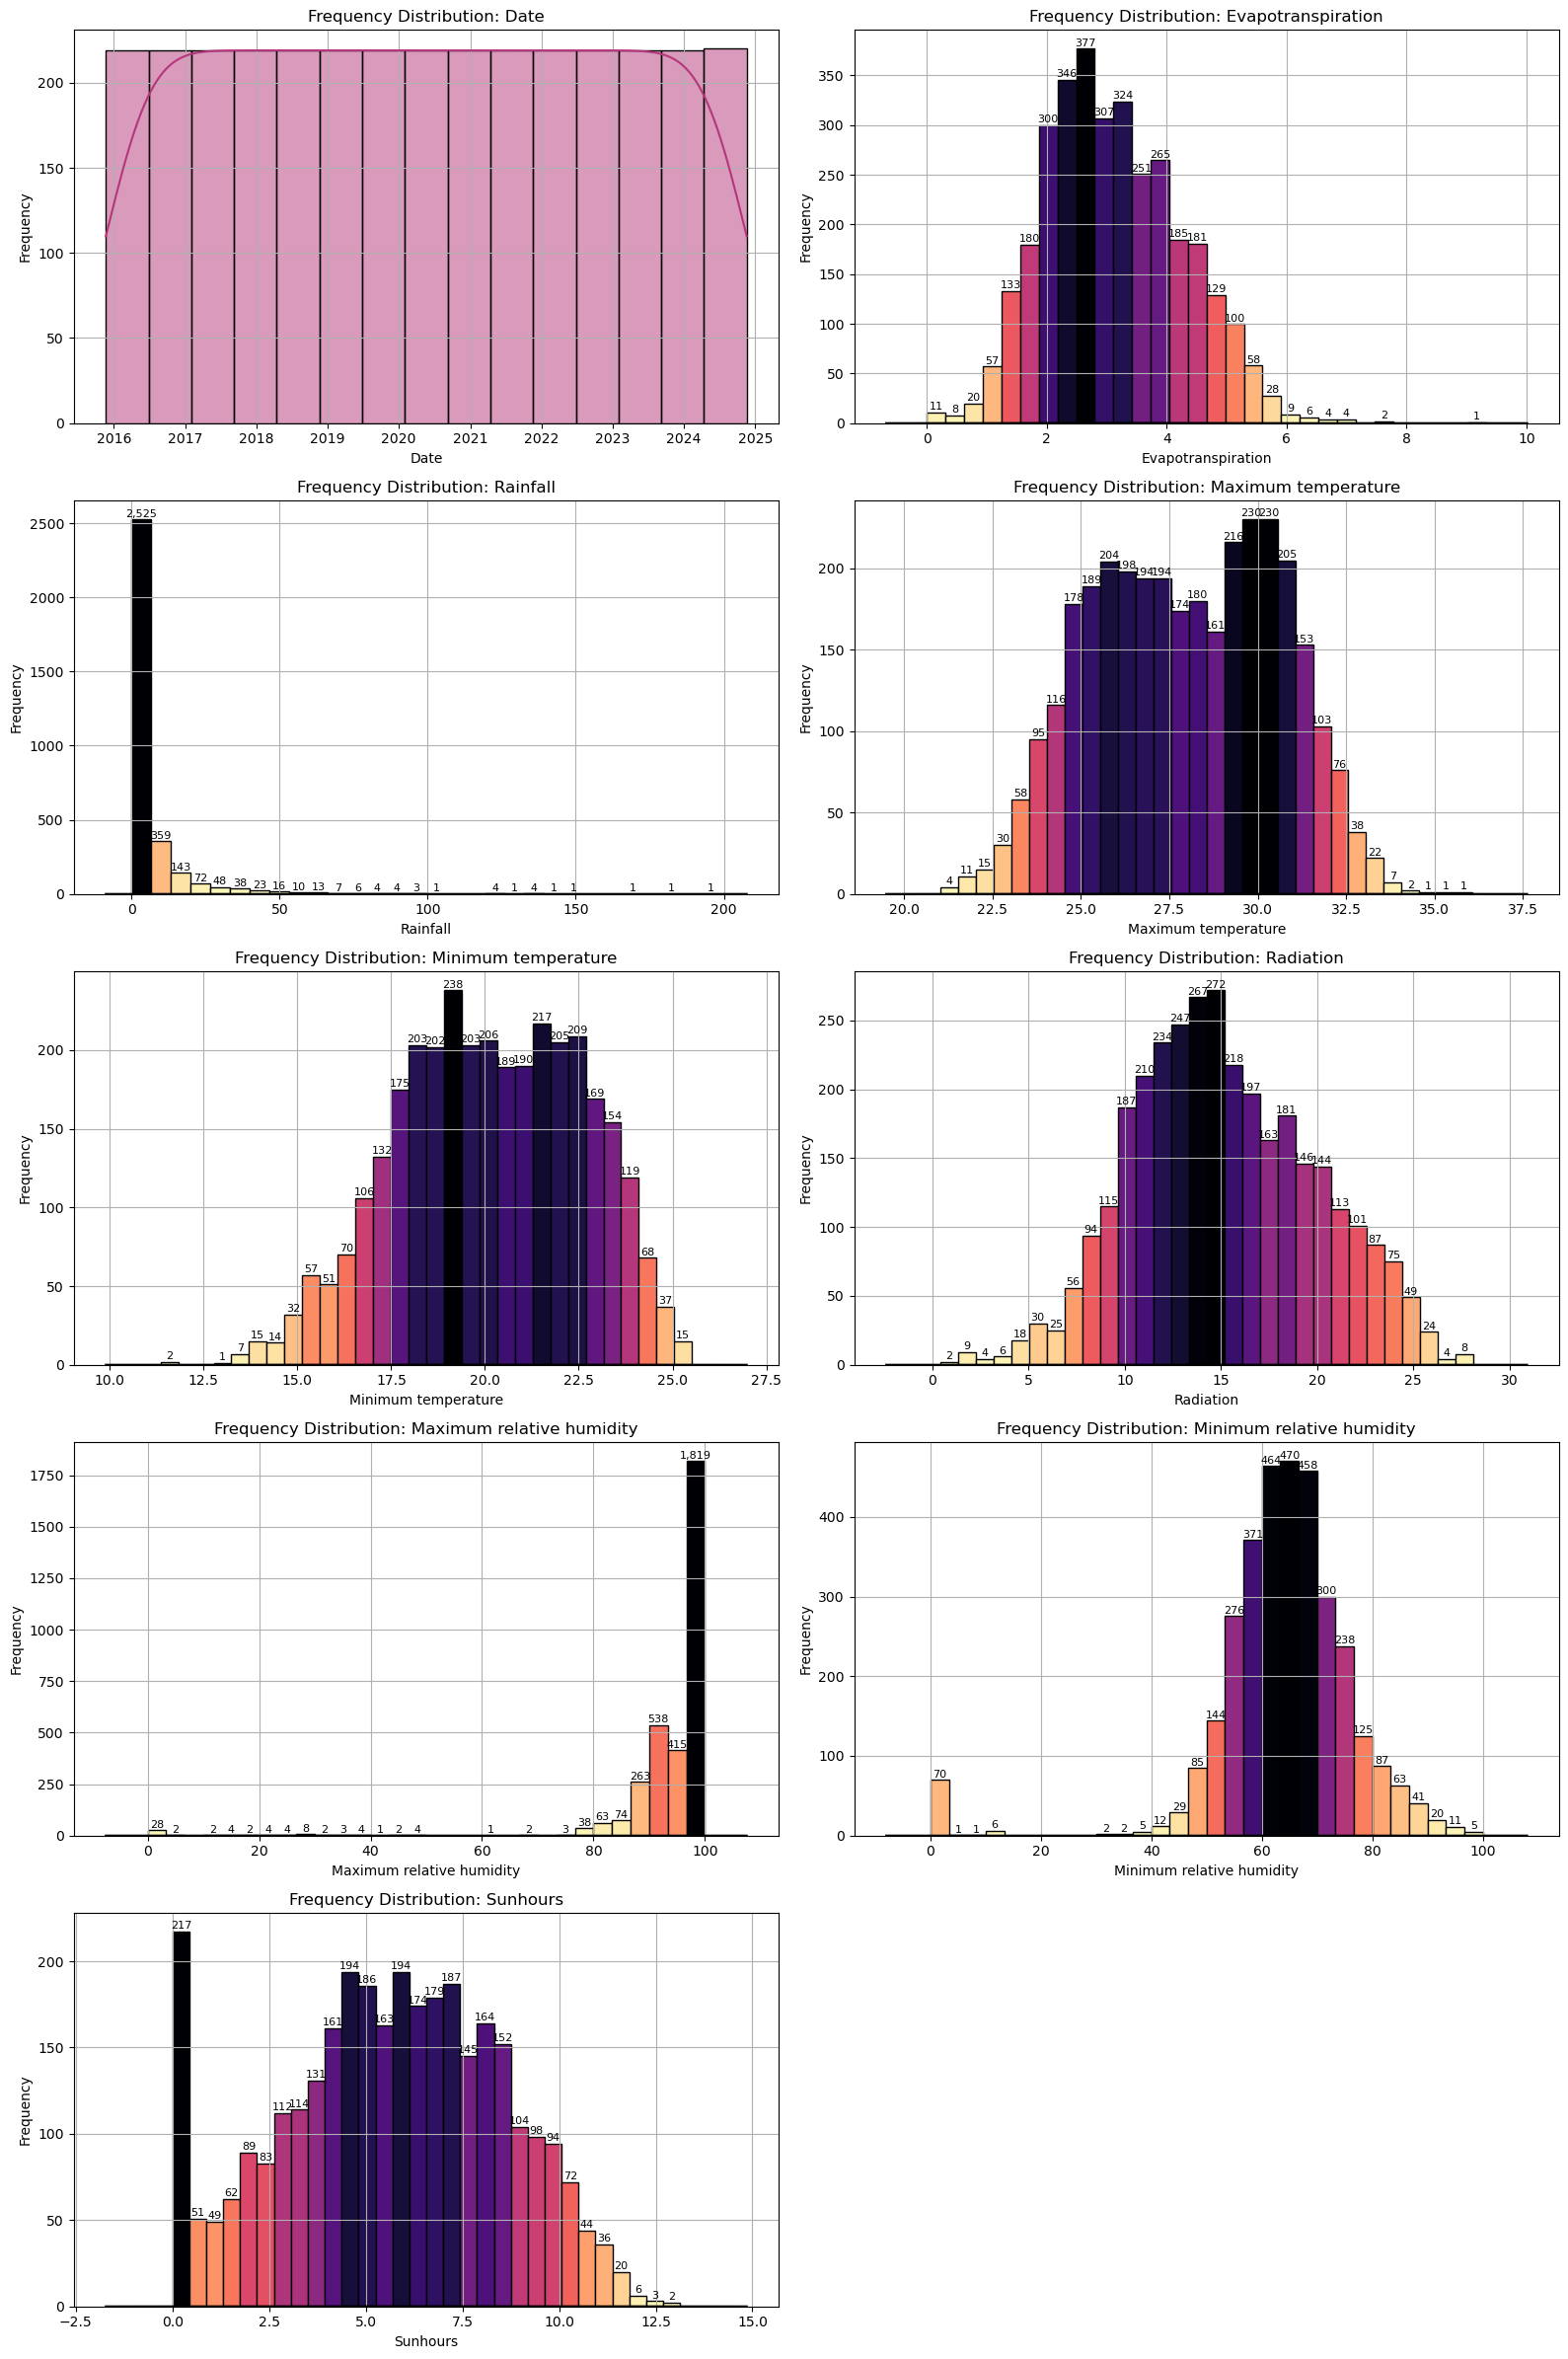

In [85]:
import matplotlib.pyplot as plt  # For creating visualizations (plots)
import seaborn as sns  # For statistical data visualization
import numpy as np  # For numerical operations (used to calculate histograms)

# List of columns to plot frequency distribution curves
columns_to_plot = [
    "Date", "Evapotranspiration", "Rainfall", "Maximum temperature",
    "Minimum temperature", "Radiation", "Maximum relative humidity",
    "Minimum relative humidity", "Sunhours"
]

# Create a grid of frequency distribution plots
plt.figure(figsize=(16, 24))  # Set figure size to accommodate all subplots

# Iterate through the columns to create individual plots for each one
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(5, 2, i)  # Create a 5x2 grid of subplots, and position the current plot

    # Apply reversed magma colormap dynamically
    cmap = plt.get_cmap("magma_r")  # Load the reversed magma colormap (for visually appealing color gradients)

    # If the column is "Date", treat it differently because it's a categorical/time-based data
    if col == "Date":
        sns.histplot(
            met_data[col],  # Plot the 'Date' column (assuming it's already a datetime column)
            kde=True,  # Plot the Kernel Density Estimation (KDE) curve
            color=cmap(0.5),  # Use a single color from the colormap for the 'Date' column
            edgecolor="black"  # Add black edges to the bars for better visibility
        )
        plt.xlabel("Date")  # Label for x-axis (Date)
    else:
        # For other columns, calculate histogram data manually for colored bins
        hist_data, bin_edges = np.histogram(met_data[col], bins=30)  # Create histogram data with 30 bins
        # Normalize data for colormap based on the histogram values
        colors = [cmap(x / max(hist_data)) if max(hist_data) > 0 else cmap(0) for x in hist_data]  # Normalize height for color intensity

        # Plot histogram bars with dynamic coloring based on values
        for j, (height, color) in enumerate(zip(hist_data, colors)):
            bar = plt.bar(
                0.5 * (bin_edges[j] + bin_edges[j + 1]),  # Bin center (mid-point of bin edges)
                height,  # Height of the bar (frequency of values in the bin)
                width=bin_edges[j + 1] - bin_edges[j],  # Bar width based on bin width
                color=color,  # Color based on the normalized value of the histogram data
                edgecolor="black"  # Add black edges to the bars for contrast
            )
            # Add data labels (display the count on top of each bar)
            if height > 0:
                plt.text(
                    bar[0].get_x() + bar[0].get_width() / 2,  # X position (center of the bar)
                    height + 0.5,  # Y position (just above the bar)
                    f"{int(height):,}",  # Format count with commas (thousands separator)
                    ha="center",  # Horizontal alignment
                    va="bottom",  # Vertical alignment (place above the bar)
                    fontsize=8  # Set font size for readability
                )
        
        # Add the KDE (Kernel Density Estimation) plot as a smooth curve to visualize the distribution
        sns.kdeplot(
            met_data[col],  # Plot the column data as a KDE curve
            color="black",  # Set the curve color to black for contrast
            linewidth=1.5,  # Line thickness for the KDE curve
            label="KDE Curve"  # Label for the KDE curve in the plot
        )
        plt.xlabel(col)  # Label for x-axis with column name

    # Set title and labels for each subplot
    plt.title(f"Frequency Distribution: {col}")  # Title for the plot (column name)
    plt.ylabel("Frequency")  # Label for y-axis (frequency of values in the bin)
    plt.grid(True)  # Add grid lines for better visualization of the plot

# Adjust layout to ensure subplots are neatly arranged
plt.tight_layout()  # Avoid overlap of plots

# Display all plots at once
plt.show()

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Preprocessing of Columns**:
   - The code applies a reversed magma colormap (`magma_r`) for visual consistency in all plots.
   - For each column, the code checks if it is a time-based column (`Date`) or numerical. The visualization approach differs for time-based columns and numerical columns.
<br>
2. **Date Column Handling**:
   - For the `Date` column, the code uses `sns.histplot()` to create a histogram and a Kernel Density Estimation (KDE) curve on top of the histogram.
   - The KDE curve is a smoothed estimate of the probability density function, offering insights into the underlying distribution.
<br>
3. **Handling Numerical Columns**:
   - For other numerical columns, the code first calculates the histogram data manually with `np.histogram()` and then applies a color map to the bars.
   - The color of the bars is dynamically assigned based on the height (frequency) of each bar, creating a visual gradient effect for the histogram.
<br>
4. **KDE Curve**:
   - The KDE curve (`sns.kdeplot()`) is overlaid on the histogram. It helps visualize the distribution of the data, providing a smoother view compared to the histogram.
<br>
5. **Data Labeling**:
   - The code adds data labels on top of each bar in the histogram to display the actual count of values for that bin. The counts are formatted with a thousand separator for better readability.
<br>
6. **Subplots and Layout**:
   - The plots are organized in a grid layout with 5 rows and 2 columns using `plt.subplot()`, making it easy to view multiple distributions simultaneously.
   - `plt.tight_layout()` ensures that the plots are neatly arranged and avoids overlapping of labels or titles.

**Summary:**
This code generates a grid of frequency distribution plots for various columns, showing the distribution of values using both histograms and KDE curves. The approach is designed to handle both time-series data (`Date`) and numerical columns with customized visualizations and color mapping. The code also annotates the plots with the count of values in each histogram bin, making it easier to understand the data distribution.

</details>

### 2.2.3. Meteorological Data: Overview of Attribute Distribution

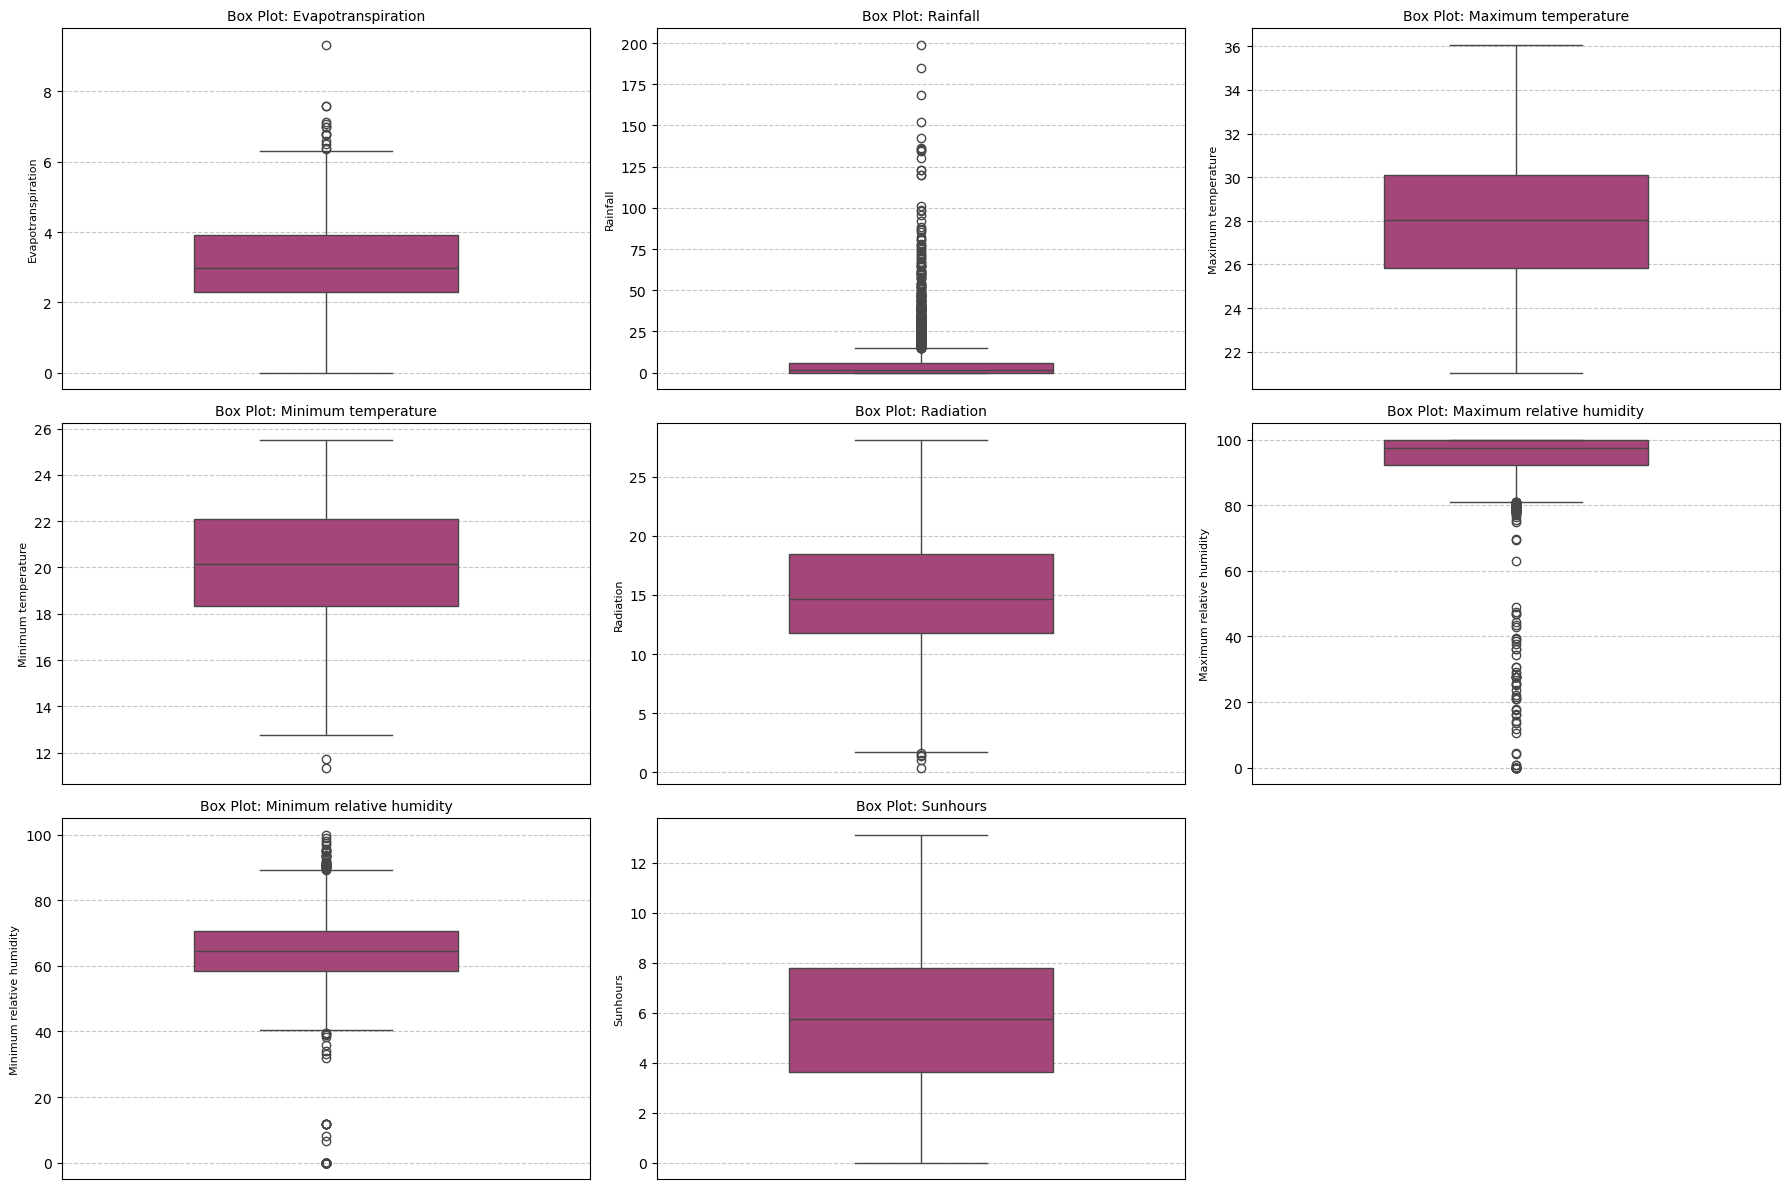

In [86]:
import matplotlib.pyplot as plt  # For creating visualizations (plots)
import seaborn as sns  # For statistical data visualization

# List of columns to generate box plots for
columns_to_plot = [
    "Evapotranspiration", "Rainfall", "Maximum temperature", "Minimum temperature",
    "Radiation", "Maximum relative humidity", "Minimum relative humidity", "Sunhours"
]

# Create a grid of box plots with 3 plots per row
plt.figure(figsize=(18, 12))  # Set the figure size to make sure all plots fit in the grid layout

# Iterate through each column in columns_to_plot to create individual box plots
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots (3 rows, 3 columns), and position the current plot

    # Apply the reversed magma colormap dynamically
    cmap = plt.get_cmap("magma_r")  # Load the reversed magma colormap (for visually appealing gradients)
    color = cmap(0.5)  # Pick a middle shade from the reversed magma colormap (neutral color)

    # Generate a box plot for the current column
    sns.boxplot(
        y=met_data[col],  # The data to plot (using the column from met_data)
        color=color,  # Use the middle shade of the reversed colormap for the box color
        width=0.5  # Adjust the box width to make it slimmer, making the plot visually more appealing
    )
    
    # Set plot title and labels with reduced size for better fit in the grid
    plt.title(f"Box Plot: {col}", fontsize=10)  # Title for the box plot (column name)
    plt.ylabel(col, fontsize=8)  # Label for the y-axis (column name)
    
    plt.xticks([])  # Remove x-tick labels since they are not necessary for box plots (focus on distribution of values)
    
    # Add horizontal gridlines to make it easier to read the plot
    plt.grid(True, axis="y", linestyle="--", alpha=0.7)  # Show gridlines only along the y-axis with dashed style

# Automatically adjust the subplots to make sure they fit into the figure without overlap
plt.tight_layout()

# Display the plots
plt.show()

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Box Plot**:
   - A **box plot** is used to visualize the distribution of a dataset, highlighting the median, quartiles, and potential outliers.
   - The **"whiskers"** of the plot indicate the range of the data, while the **"box"** shows the interquartile range (IQR) where the middle 50% of the data lies.
   - The **outliers** are plotted as individual points outside the whiskers.
   - The **color** of the box plot is set using a dynamic color from the reversed magma colormap (`magma_r`), providing a visually appealing gradient.
<br>
2. **Grid Layout**:
   - The `plt.subplot(3, 3, i)` creates a 3x3 grid of subplots. This layout is chosen so that multiple box plots can be displayed on a single figure, organized neatly across three rows and three columns.
   - The **figure size** is set with `plt.figure(figsize=(18, 12))` to ensure all plots fit within the grid layout without crowding.
<br>
3. **Aesthetic Adjustments**:
   - **Title and Labels**: The title for each box plot and the y-axis label are adjusted to ensure readability within the grid layout. Font sizes are reduced with `fontsize=10` and `fontsize=8` to avoid overlap.
   - **X-Ticks Removal**: For box plots, the x-axis ticks are often not necessary, so they are removed with `plt.xticks([])` to avoid clutter.
   - **Gridlines**: Horizontal gridlines are added along the y-axis with `plt.grid(True, axis="y", linestyle="--", alpha=0.7)`, making it easier to compare the distribution of values across different box plots.
<br>
4. **Tight Layout**:
   - `plt.tight_layout()` adjusts the spacing between subplots to ensure that titles, labels, and axes do not overlap. This is crucial when displaying multiple plots on a single figure.

**Summary:**
This code creates a series of box plots for different meteorological attributes, with each plot displayed in a grid. The color and gridlines are customized for better visual appeal and clarity, and labels and titles are adjusted for readability. This type of visualization is useful for comparing the distribution and identifying potential outliers in the data.

</details>

## 2.3. Map Meteorological Data to Fields

In [87]:
# Function to map meteorological data to growth period
def map_meteorological_data(field_data, met_data):
    # Convert 'Grow Start Date' and 'Actual Cut Date' columns to datetime format for correct comparison
    field_data["Grow Start Date"] = pd.to_datetime(field_data["Grow Start Date"])  # Ensure the dates are in datetime format
    field_data["Actual Cut Date"] = pd.to_datetime(field_data["Actual Cut Date"])

    time_series_data = []  # Initialize an empty list to store meteorological data for each field

    # Iterate over each row in the 'field_data' DataFrame (each row corresponds to a field)
    for _, row in field_data.iterrows():  # Iterating over each field in the DataFrame
        # Filter the meteorological data based on the field's growth period (from 'Grow Start Date' to 'Actual Cut Date')
        field_met_data = met_data[
            (met_data["Date"] >= row["Grow Start Date"]) &  # Filter for dates after or equal to 'Grow Start Date'
            (met_data["Date"] <= row["Actual Cut Date"])  # Filter for dates before or equal to 'Actual Cut Date'
        ]
        
        # Append the filtered meteorological data (excluding the 'Date' column) as a NumPy array to the time_series_data list
        time_series_data.append(field_met_data.drop("Date", axis=1).values)  # Drop 'Date' and store the rest of the data

    return time_series_data  # Return the list of meteorological time series for all fields

# Map the meteorological data to each field in the season_data DataFrame
time_series = map_meteorological_data(season_data, met_data)  # Apply the function to get time series data

# Add the time series data as a new column in the season_data DataFrame
season_data["Meteorological Time Series"] = time_series  # Store the resulting time series data in a new column

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Datetime Conversion**: 
   - The `pd.to_datetime()` function is used to ensure that the date columns (`"Grow Start Date"` and `"Actual Cut Date"`) in the `field_data` are in datetime format. This ensures that comparison operations can be performed correctly (i.e., to filter rows between two dates).
<br>
2. **Iterating Over DataFrame Rows**: 
   - The `iterrows()` method is used to iterate over each row in the `field_data` DataFrame. Each row represents data for a particular field, and `row` contains the data for that specific field.
   - Inside the loop, we extract the `"Grow Start Date"` and `"Actual Cut Date"` for the current field and use them to filter the meteorological data (`met_data`) for that field's growing period.
<br>
3. **Filtering Meteorological Data**: 
   - For each field, the meteorological data is filtered based on the `Grow Start Date` and `Actual Cut Date`. Only the rows where the date in `met_data` falls within this period are retained.
<br>
4. **Storing Time Series Data**:
   - The filtered meteorological data (with the `Date` column removed) is stored as a NumPy array using `.values` and then appended to the `time_series_data` list.
   - The `drop("Date", axis=1)` method is used to remove the `Date` column from the `field_met_data`, as it is not needed in the time series.
<br>
5. **Returning the Result**: 
   - After iterating over all fields, the `time_series_data` list, which contains the meteorological time series data for each field, is returned.
<br>
6. **Adding Time Series to the DataFrame**:
   - After generating the time series, it is added as a new column (`"Meteorological Time Series"`) in the `season_data` DataFrame. This allows you to associate the meteorological data with each field in your main dataset.

**Summary:**
This code processes meteorological data by filtering it based on each field's growing period and then stores the relevant time series data for each field. The processed time series is then added to the original `season_data` DataFrame, providing a more comprehensive view by including both the field-specific and meteorological data.

</details>

## 2.4. Display Random Sample of Meteorological Time Series Data

In [88]:
import random  # Import the random module to select a random item from a list
import pandas as pd  # Pandas is already imported in your script for handling data

# Display one random sample from the time_series output
random_sample = random.choice(time_series)  # Randomly selects one time series from the 'time_series' list

# Convert the random sample (which is a NumPy array) to a DataFrame for better readability
random_sample_df = pd.DataFrame(
    random_sample,  # The selected random time series
    columns=["Evapotranspiration", "Rainfall", "Maximum temperature",  # Column names for meteorological data
             "Minimum temperature", "Radiation", "Maximum relative humidity", 
             "Minimum relative humidity", "Sunhours"]  # Columns correspond to different meteorological measurements
)

# Display the random sample DataFrame
print("Random Sample of Meteorological Time Series:")
random_sample_df  # Display the formatted DataFrame to the console

Random Sample of Meteorological Time Series:


Evapotranspiration  Rainfall  Maximum temperature  Minimum temperature  \
0                  2.16       0.6                24.74                18.65   
1                  2.27       0.2                25.22                18.82   
2                  1.80      13.0                22.59                18.52   
3                  2.95       0.0                24.95                18.55   
4                  2.45       0.0                26.10                15.16   
..                  ...       ...                  ...                  ...   
356                2.16       1.4                23.20                18.70   
357                2.16      10.8                23.80                18.00   
358                2.16       4.0                25.70                18.60   
359                2.16       0.0                25.20                19.60   
360                2.16       0.6                23.00                19.50   

     Radiation  Maximum relative humidity  Minimum relative humidity  Sunhours  
0        10.95                      92.54                      63.04      4.51  
1        11.37                      92.58                      56.17      4.89  
2         8.57                      96.52                      72.27      2.13  
3        15.64                      84.23                      57.29      8.98  
4        15.18                      99.25                      61.45      8.48  
..         ...                        ...                        ...       ...  
356       9.44                      97.05                      72.68      2.30  
357       8.89                      97.05                      72.68      1.90  
358      15.92                      97.05                      72.68      9.10  
359      14.82                      97.05                      72.68      8.30  
360       4.28                      97.05                      72.68      0.00  

[361 rows x 8 columns]

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Random Module**:
   - `random.choice(time_series)` is used to select a random item from the `time_series` list. The `time_series` list contains meteorological data for each field. By using `random.choice()`, a random field's meteorological data is selected.
   - The `random.choice()` method randomly picks one element from the list (in this case, a random time series).
<br>
2. **Creating a DataFrame**:
   - The `pd.DataFrame()` constructor is used to convert the selected random time series (which is likely a NumPy array) into a Pandas DataFrame. This makes it easier to view and manipulate the data in tabular form.
   - The `columns` argument is used to specify the column names for the DataFrame. These column names correspond to various meteorological variables such as "Evapotranspiration", "Rainfall", "Temperature", etc.
<br>
3. **Displaying the Data**:
   - The `random_sample_df` DataFrame is displayed using `print()`. It provides a human-readable, tabular representation of the selected meteorological data for better understanding.

**Summary:**
This code randomly selects a single time series from the list `time_series`, which contains meteorological data for each field. It then converts the random time series into a Pandas DataFrame, adds meaningful column labels, and displays it to allow for better inspection and analysis.

</details>

## 2.5. Calculate and Append Cumulative Growing Degree Days (CGDD) to Season Data and Growing Degree Days (GDD) to Meteorological Data

In [89]:
import pandas as pd  # For loading and manipulating Excel files and DataFrames
import numpy as np  # For numerical operations

# Function to calculate GDD (Growing Degree Days) for each row in met_data
def calculate_gdd(met_data):
    # GDD calculation using the formula: GDD = (Max Temp + Min Temp)/2 - 18
    # GDD represents the accumulated heat over a period of time, used to assess crop development
    met_data['GDD'] = ((met_data['Maximum temperature'] + met_data['Minimum temperature']) / 2) - 18
    
    # Ensure GDD values are positive only, as negative GDD values are not meaningful for growth calculations
    met_data['GDD'] = met_data['GDD'].apply(lambda x: max(x, 0))  # Set negative GDD values to 0

    return met_data  # Return the updated met_data DataFrame with the calculated GDD column

# Apply the GDD calculation to the meteorological data
met_data = calculate_gdd(met_data)  # Call the function to calculate and append GDD to met_data

# Function to calculate and append CGDD (Cumulative Growing Degree Days) to season_data
def calculate_cgdd(season_data, met_data):
    # Initialize the "CGDD" column in season_data with a float type, set initial values to 0.0
    season_data["CGDD"] = 0.0  # CGDD represents the cumulative GDD for each field during its growth period

    # Iterate over each row in season_data to calculate CGDD for each field
    for index, row in season_data.iterrows():
        grow_start_date = row["Grow Start Date"]  # Extract the field's growth start date
        actual_cut_date = row["Actual Cut Date"]  # Extract the field's actual cut date
        
        # Filter the meteorological data for the growth period of the field (between the start and cut dates)
        field_met_data = met_data[
            (met_data["Date"] >= grow_start_date) & (met_data["Date"] <= actual_cut_date)
        ]
        
        # Calculate cumulative GDD (CGDD) for the growth period by summing up the GDD values for the selected dates
        cgdd = field_met_data["GDD"].sum()  # Sum all GDD values in the filtered data for the growth period
        season_data.at[index, "CGDD"] = cgdd  # Assign the calculated CGDD to the corresponding field in season_data

    return season_data  # Return the updated season_data with the calculated CGDD column

# Calculate and append CGDD to season_data
season_data = calculate_cgdd(season_data, met_data)  # Apply CGDD calculation to season_data

# Ensure no duplication of GDD in season_data by dropping the 'GDD' column if it exists
if "GDD" in season_data.columns:
    season_data = season_data.drop(columns=["GDD"])  # Drop the GDD column to avoid duplication

# Function to display a matched sample of field data and meteorological data
def display_matched_sample(field_data, met_data):
    import random  # Import random to select a random field
    
    # Select a random row from field_data
    random_field_index = random.randint(0, len(field_data) - 1)  # Select a random index from the field_data DataFrame
    field_row = field_data.iloc[random_field_index]  # Retrieve the random field's row from season_data
    
    # Extract the growth period for the selected field from its "Grow Start Date" and "Actual Cut Date"
    grow_start_date = field_row["Grow Start Date"]
    actual_cut_date = field_row["Actual Cut Date"]
    
    # Filter the meteorological data for the growth period of the selected field (using the date range)
    field_met_data = met_data[
        (met_data["Date"] >= grow_start_date) & (met_data["Date"] <= actual_cut_date)
    ]
    
    # Extract the relevant meteorological data columns, including the GDD column
    field_met_data_df = field_met_data[
        ["Date", "Evapotranspiration", "Rainfall", "Maximum temperature", "Minimum temperature", 
         "Radiation", "Maximum relative humidity", "Minimum relative humidity",
         "Sunhours", "GDD"]  # Include GDD in the selected columns to be shown
    ]
    
    # Display field details using display() function for better visualization in notebooks
    display(field_row)  # Display the field data with its growth period details
    
    # Display matched meteorological data for the growth period of the selected field (with GDD)
    display(field_met_data_df)  # Display the meteorological data for the selected period
    
    return field_met_data_df  # Return the meteorological data for the field with the calculated GDD

# Display a random matched sample with the GDD data
matched_sample_df = display_matched_sample(season_data, met_data)  # Display and store the matched sample DataFrame

Field                                                                    755519
Season                                                                     2018
Cane Class                                                                    5
Grow Start Date                                             2017-11-09 00:00:00
Actual Cut Date                                             2018-10-19 00:00:00
Yield (TCH)                                                           73.451835
Harvest Age                                                           11.303705
Altitude (m)                                                              198.0
Soil Type                                                        Humic Latosols
Soil Phase                                                                Stony
Total available moisture                                                   50.0
Meteorological Time Series    [[2.19, 0.4, 27.95, 21.57, 11.07, 99.34, 71.59...
CGDD                                    

Date  Evapotranspiration  Rainfall  Maximum temperature  \
84993 2017-11-09                2.19       0.4                27.95   
84994 2017-11-10                3.39       0.0                28.74   
84995 2017-11-11                2.07       0.1                28.32   
84996 2017-11-12                3.42       3.6                30.54   
84997 2017-11-13                2.35       0.8                29.08   
...          ...                 ...       ...                  ...   
85333 2018-10-15                3.94       0.4                26.34   
85334 2018-10-16                3.11       0.0                26.93   
85335 2018-10-17                3.07       1.2                27.76   
85336 2018-10-18                2.34       3.2                27.09   
85337 2018-10-19                2.88       0.6                26.87   

       Minimum temperature  Radiation  Maximum relative humidity  \
84993                21.57      11.07                      99.34   
84994                19.96      17.05                      98.16   
84995                19.60      10.41                     100.00   
84996                19.07      18.94                     100.00   
84997                18.43      12.60                     100.00   
...                    ...        ...                        ...   
85333                15.80      22.05                      99.38   
85334                18.31      17.62                      97.57   
85335                16.89      16.66                      98.95   
85336                21.14      12.43                      99.51   
85337                20.68      15.48                      98.84   

       Minimum relative humidity  Sunhours    GDD  
84993                      71.59      0.55  6.760  
84994                      66.06      4.82  6.350  
84995                      66.08      0.30  5.960  
84996                      59.09      6.60  6.805  
84997                      62.87      1.90  5.755  
...                          ...       ...    ...  
85333                      62.65      9.60  3.070  
85334                      57.18      6.20  4.620  
85335                      64.39      6.00  4.325  
85336                      70.22      1.60  6.115  
85337                      74.20      4.50  5.775  

[345 rows x 10 columns]

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Growing Degree Days (GDD) Calculation**:
   - GDD is a measure of heat accumulation, which helps predict crop development. The formula used here calculates GDD by averaging the maximum and minimum temperatures, subtracting a base temperature of 18°C. Negative GDD values are not physically meaningful, so they are set to zero.
<br>
2. **Cumulative Growing Degree Days (CGDD)**:
   - CGDD is calculated by summing the GDD values over the growing period of the crop (from the "Grow Start Date" to the "Actual Cut Date"). This gives the total heat accumulated during the crop's growth, which can be used for understanding the growth stage and predicting harvest times.
<br>
3. **Date Filtering**:
   - The `met_data` is filtered to match the growth period of each field using the "Grow Start Date" and "Actual Cut Date". This allows the meteorological data relevant to the growth period to be extracted.
<br>
4. **Random Sample Display**:
   - A random field from the `season_data` DataFrame is selected, and its growth period is used to filter the relevant meteorological data. Both the field's information and the corresponding meteorological data are displayed to allow inspection of the matched sample.
<br>
5. **Pandas DataFrame Manipulation**:
   - The `apply()` method is used to manipulate the `GDD` column in the meteorological data, and the `sum()` method is used to calculate CGDD. The `iloc[]` and `groupby()` methods are used to filter data and manipulate rows/columns based on conditions.
  
**Summary:**
This code calculates the GDD for meteorological data, aggregates it to form CGDD for each field in the growing season, and displays a random sample of field and meteorological data matched by the growth period. The GDD and CGDD calculations are critical for understanding crop growth and managing agricultural practices effectively.

</details>

# 4. Mapping Features (X) to Targets (y) for Model Training

## 4.1. Target (y)

In [90]:
# The target variable 'y' is 'Yield (TCH)', which is the column representing the yield in tons per hectare.
y = season_data["Yield (TCH)"].values
# We use '.values' to extract the values of the 'Yield (TCH)' column as a NumPy array. This is needed for model training.

# Check the shape of the target variable 'y'
print(y.shape)
# This prints the shape of 'y', which gives us information about the number of samples (rows) in 'y'.
# For example, if 'y' has 1000 samples, y.shape will output (1000,).

(351,)


<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>
    
- **`y = season_data["Yield (TCH)"].values`**: 
   - This line extracts the column `"Yield (TCH)"` from the `season_data` DataFrame and converts it into a NumPy array. The `.values` attribute is used to retrieve the data as a flat array, which is typically required for machine learning tasks, especially for model fitting.
<br>
- **`print(y.shape)`**: 
   - This line prints the shape of the `y` array. The shape of an array provides its dimensionality. For a one-dimensional array like `y` (a vector of values), `y.shape` will return a tuple indicating the number of elements in the array. 
   - For instance, if `y` has 1000 yield values, `y.shape` will output `(1000,)`.
<br>
**Example:**
- If `season_data["Yield (TCH)"]` contains 1000 rows of yield data, calling `y.shape` will output `(1000,)`.


</details>

## 4.2. Input (X)

### 4.2.1. Handling Categorical Data

In [91]:
# First, drop the 'Meteorological Time Series' column and any other non-categorical column you don't want to encode
X = season_data.drop(columns=["Yield (TCH)", "Field", "Season", "Grow Start Date", "Actual Cut Date", "Meteorological Time Series", "Altitude (m)", "Total available moisture"])
# Here, we drop a number of columns that are not relevant for the features (X) in our machine learning model. 
# "Yield (TCH)" is the target variable, so it's excluded, along with other non-categorical columns like "Field", "Season", 
# and columns that contain time series data or other variables we don't want to encode.

# Now, apply one-hot encoding to the categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)
# `pd.get_dummies` is used to convert categorical variables into numerical features by creating dummy (binary) variables. 
# We use `drop_first=True` to avoid the "dummy variable trap" where one category could be perfectly predicted by the others.
# It removes the first category to reduce multicollinearity.

# Convert any boolean columns (True/False) to integers (1/0)
X_encoded = X_encoded.astype(int)
# The `.astype(int)` function is applied to convert any boolean columns (True/False) into integers (1/0), 
# which is required for machine learning algorithms that expect numeric input. This ensures that all features are numeric.

# Check the shape of the encoded features
print(X_encoded.shape)
# This line prints the shape of the encoded features (X_encoded), which gives us information about the number of 
# samples (rows) and features (columns) after encoding. For example, it might output something like (1000, 30),
# indicating 1000 samples and 30 features.

# Display 20 random samples of X_encoded for a quick overview
X_encoded.sample(20)
# This line randomly selects and displays 20 samples from the encoded feature matrix. It's useful for quickly checking 
# the structure of the transformed data, especially the one-hot encoded columns.

(351, 5)


Cane Class  Harvest Age  CGDD  Soil Type_Low Humic Latosols  \
42280           6           10  1784                             0   
42172           5           11  2335                             0   
45750           5           12  2407                             1   
42326          10           12  2214                             0   
45834           4           11  2100                             1   
44276           4           11  2154                             1   
42653           1           11  1963                             0   
44051           5           13  2502                             1   
45474          12           13  2308                             1   
45940           6           11  1878                             1   
42323           7           10  2132                             0   
42389           5           11  2108                             0   
44085           7           11  2257                             1   
44053           7           12  2397                             1   
42357           2           10  1967                             0   
42004           5           12  2452                             0   
45785           5           12  2397                             1   
44186           3           12  2342                             1   
45812           7           11  1967                             1   
41840           5           12  2372                             0   

       Soil Phase_Stony  
42280                 0  
42172                 1  
45750                 0  
42326                 1  
45834                 1  
44276                 0  
42653                 1  
44051                 0  
45474                 1  
45940                 0  
42323                 1  
42389                 0  
44085                 0  
44053                 0  
42357                 1  
42004                 0  
45785                 0  
44186                 0  
45812                 0  
41840                 0

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Dropping Columns**: 
   - We drop columns that are either the target variable (`"Yield (TCH)"`) or non-categorical columns (like `"Field"`, `"Season"`, `"Grow Start Date"`, etc.) that we don't need to include as features in our model.
<br>
2. **One-Hot Encoding**:
   - **One-hot encoding** is a process of converting categorical variables into binary (0/1) variables. For instance, if a column contains the categories `["Red", "Blue", "Green"]`, it would be converted into three separate binary columns for each color.
   - We use `drop_first=True` to avoid redundancy in the encoding process. This drops the first category to avoid multicollinearity.
<br>
3. **Boolean Conversion**:
   - If any of the columns contain boolean values (`True` or `False`), we convert them to integers (`1` for `True`, `0` for `False`). This is necessary for machine learning models, which expect numeric inputs.
<br>
4. **Shape of Encoded Features**:
   - The shape of the encoded features shows how many rows (samples) and columns (features) the data has after one-hot encoding. This is important to check whether the encoding process was successful and if the feature set is as expected.
<br>
5. **Random Sample**:
   - Displaying a random sample of the encoded features helps us visually inspect the transformed data. We get 20 random rows from the dataset to ensure that the encoding was applied correctly.

**Example Output:**
- **`X_encoded.shape`** might output `(1000, 30)`, indicating there are 1000 rows and 30 columns (features) after encoding.
- **`X_encoded.sample(20)`** will display a random selection of 20 rows from the dataset, allowing you to inspect the one-hot encoded features and the resulting structure.

**Conclusion:**
This code processes the dataset by removing unnecessary columns, applying one-hot encoding to categorical columns, and converting boolean values to integers. The result is a numerical feature matrix (`X_encoded`) that is ready for machine learning algorithms.

</details>

#### 4.2.1.1. Normalize the Input Data

In [92]:
from sklearn.preprocessing import StandardScaler
# Import the StandardScaler from sklearn's preprocessing module. This class is used to standardize (normalize) features 
# by removing the mean and scaling to unit variance. It’s important for many machine learning algorithms, especially those 
# sensitive to the scale of data, such as linear regression, k-nearest neighbors, and neural networks.

# Normalize the numerical columns
scaler = StandardScaler()
# Create an instance of the StandardScaler. This object will be used to fit the data and transform it.

X_encoded_scaled = scaler.fit_transform(X_encoded)
# Apply the scaling to the encoded features (X_encoded). 
# The `fit_transform` method computes the mean and standard deviation of the data, and then transforms the data accordingly. 
# After this step, each feature will have a mean of 0 and a standard deviation of 1.

# Check the shape of scaled features
print(X_encoded_scaled.shape)
# This line prints the shape of the scaled features, i.e., the number of rows and columns after scaling. 
# It's useful to confirm that the data has been transformed correctly (the number of rows should remain the same, 
# but the values will now be scaled).

# Display the first few rows of the scaled features
print(X_encoded_scaled[:5])  # Display the first 5 rows of scaled data
# This will print the first 5 rows of the scaled data as a numpy array. Since the data is now in standardized form, 
# the values should be centered around 0 and have a standard deviation of 1.

# Alternatively, use pandas DataFrame for better readability
# In many cases, it's easier to work with the scaled data in a pandas DataFrame format, especially for further analysis or visualization.

# Create a DataFrame to display the scaled values in tabular format
import pandas as pd
# Import pandas to create a DataFrame, which will make it easier to view and manipulate the scaled data.

# Convert the scaled values to a DataFrame for better readability
X_encoded_scaled_df = pd.DataFrame(X_encoded_scaled, columns=X_encoded.columns)
# Convert the numpy array of scaled features into a pandas DataFrame. 
# The `columns=X_encoded.columns` ensures that the column names from the original encoded data are preserved in the scaled data.

# Display the first few rows of the DataFrame
X_encoded_scaled_df.sample(5)
# Display a random sample of 5 rows from the scaled DataFrame to inspect the results. 
# This helps you verify that the scaling was applied correctly and that the values are now normalized.

(351, 5)
[[-1.5720725   0.47742357  0.12151742  0.86890736 -0.74370515]
 [-1.20784977 -0.61073015 -1.5860365   0.86890736 -0.74370515]
 [ 0.97748667 -0.61073015  0.11245878  0.86890736 -0.74370515]
 [ 1.3417094   0.47742357  1.14061458  0.86890736 -0.74370515]
 [ 1.70593214 -0.61073015 -1.24180812  0.86890736 -0.74370515]]


Cane Class  Harvest Age      CGDD  Soil Type_Low Humic Latosols  \
57    -0.479404    -0.610730 -0.580527                     -1.150871   
162   -0.115182     0.477424 -0.476353                      0.868907   
139    1.705932    -1.698884 -1.182927                      0.868907   
282    0.249041    -0.610730 -0.861345                      0.868907   
33     0.249041    -0.610730 -0.109478                     -1.150871   

     Soil Phase_Stony  
57          -0.743705  
162         -0.743705  
139         -0.743705  
282         -0.743705  
33           1.344619

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Standardization**:
   - **StandardScaler** scales features so that they have a mean of 0 and a standard deviation of 1. This is particularly useful for algorithms like linear regression, k-means clustering, and neural networks, which are sensitive to the scale of the data.
   - Formula for standardization: 
     $$ X_{\text{scaled}} = \frac{X - \mu}{\sigma} $$
     Where `μ` is the mean and `σ` is the standard deviation of the feature.
<br>
2. **Scaling Process**:
   - **`fit_transform`**: The `fit()` method calculates the mean and standard deviation of the data, and the `transform()` method then scales the data using those values.
   - This ensures that all features have been normalized in a consistent way.
<br>
3. **Pandas DataFrame**:
   - After scaling, the result is often a numpy array. Converting it back to a pandas DataFrame (`X_encoded_scaled_df`) allows for easier inspection, analysis, and manipulation, as the column names are retained.
<br>
4. **Shape and Sample**:
   - Checking the shape of the scaled features confirms the number of rows and columns are unchanged.
   - Displaying a sample of the scaled data helps confirm that the transformation was successful and the data is now in the expected form.

**Example Output:**
- **`X_encoded_scaled.shape`**: This will print the shape of the scaled data. It will have the same number of rows (samples), but the values will be transformed to have a mean of 0 and a standard deviation of 1.
- **`X_encoded_scaled[:5]`**: This will display the first 5 rows of the scaled data in a numpy array format.
- **`X_encoded_scaled_df.sample(5)`**: This will display a random sample of 5 rows from the scaled data, now in a pandas DataFrame format.

**Conclusion:**
This code effectively normalizes the encoded features (X_encoded) using **StandardScaler**, ensuring that all features have the same scale, which is critical for most machine learning algorithms. It then provides several ways to inspect the scaled data to ensure it was correctly transformed.

</details>

### 4.2.2. Extract Time Series Data

In [93]:
import numpy as np
# Importing the numpy module, which is a fundamental package for numerical computing in Python. 
# It provides support for large multidimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

# Check the first few values of "Meteorological Time Series" to understand its format
print(season_data["Meteorological Time Series"].head())
# This line prints the first 5 rows of the "Meteorological Time Series" column from the season_data DataFrame.
# It's useful to check the format and type of data in this column (e.g., list, string, etc.) to understand how the data is structured.

# Check the type of one of the entries in the "Meteorological Time Series" column
print(type(season_data["Meteorological Time Series"].iloc[0]))
# This line prints the type of the first entry in the "Meteorological Time Series" column.
# It's important to verify if the entries are lists, arrays, or some other structure, as this will determine how to manipulate them.

try:
    # Convert the column to a numpy array
    X_time_series = np.array(season_data["Meteorological Time Series"].tolist())
    # The `tolist()` method converts the "Meteorological Time Series" column (which likely contains lists or objects) into a Python list.
    # The `np.array()` function then converts this list of lists (or objects) into a numpy array.
    # This step ensures that the data is in a format suitable for numerical operations and machine learning models that require numpy arrays.

    # Check the shape of the time series data
    print(X_time_series.shape)
    # This line prints the shape (dimensions) of the numpy array.
    # It gives insight into the structure of the data (e.g., number of samples and features).
    # The shape is useful to understand whether the data is ready for machine learning or needs further preprocessing.

except ValueError as e:
    # If there's an error (e.g., the column cannot be converted into a numpy array), this block catches the exception.
    # It then prints the error message, helping with debugging and ensuring the code doesn't break unexpectedly.
    print("Error occurred:", str(e))

# Continue executing subsequent cells
print("Code execution continues.")
# This line indicates that the code will continue running after the try-except block.
# It is helpful to mark where the code will resume even if an error occurred above (since the error handling prevents a crash).

41744    [[5.27, 1.4, 30.23, 21.82, 24.56, 99.2, 51.68,...
41745    [[1.93, 4.2, 29.67, 23.49, 10.27, 100.0, 78.2,...
41766    [[5.19, 0.0, 31.16, 19.52, 25.15, 98.43, 51.58...
41767    [[4.57, 1.4, 29.94, 22.56, 21.99, 97.43, 63.6,...
41768    [[2.64, 6.8, 28.83, 23.17, 12.65, 99.2, 77.73,...
Name: Meteorological Time Series, dtype: object
<class 'numpy.ndarray'>
Error occurred: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (351,) + inhomogeneous part.
Code execution continues.


<div style="background-color: #FFF8D9; padding: 10px; border-radius: 5px;">

The error (`ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions.`) suggests that the data in `Meteorological Time Series` is a list of arrays (or lists of different lengths) — meaning that each element in the column is a sequence of different sizes. This can cause issues when trying to convert it to a standard NumPy array because NumPy expects all arrays to have the same shape.

**Solution:**

1. **Padding the sequences** to ensure they all have the same length. This is a common preprocessing step when dealing with time series data.
2. **Checking the maximum sequence length** and ensuring all time series data are padded to that length.

Here’s how you can do that:

**Step 1: Find the maximum sequence length**

We need to find the maximum length of the time series in `Meteorological Time Series`.

```python
# Find the maximum length of the sequences in the "Meteorological Time Series" column
max_timesteps = max(season_data["Meteorological Time Series"].apply(len))
print(f"Max timesteps: {max_timesteps}")
```
<br>
**Step 2: Pad the sequences**

We can pad the sequences so that each sequence in `Meteorological Time Series` has the same length, matching the `max_timesteps`. You can use `pad_sequences` from `tensorflow.keras.preprocessing.sequence` to do this.

```python
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad the sequences to ensure all have the same length
X_time_series = pad_sequences(season_data["Meteorological Time Series"].apply(lambda x: np.array(x)), 
                               maxlen=max_timesteps, 
                               dtype="float32",  # Use dtype float32 for numerical data
                               padding='post',  # Pad at the end of each sequence
                               truncating='post',  # Truncate sequences that are longer than the max length
                               value=0.0)  # Pad with 0s

# Check the shape of the time series data after padding
print(X_time_series.shape)
```
<br>

**Explanation:**
- **Padding** ensures that all time series sequences are the same length.
  - `padding='post'` means padding is added at the end of the sequence.
  - `truncating='post'` means longer sequences are truncated at the end.
  - `value=0.0` ensures that the padding is filled with zeros, but you can choose another value if appropriate.

**Step 3: Verify the shape and dimensions**

After padding, check the shape again to confirm that all sequences have the same length:

```python
# Check the new shape
print(X_time_series.shape)
```
<br>
This will output the shape of the padded time series data, and it should now have a consistent number of timesteps for all sequences.

</div>

### 4.2.3. Find the minimum sequence length

In [94]:
# Find the minimum length of the sequences in the "Meteorological Time Series" column
min_timesteps = min(season_data["Meteorological Time Series"].apply(len))
# The .apply(len) function is applied to each element in the "Meteorological Time Series" column.
# Each element in this column is expected to be a sequence (such as a list or numpy array). 
# The len function calculates the length of each sequence (i.e., how many data points are in the time series for each field).
# The min() function is used to find the shortest sequence (the minimum length) in the entire "Meteorological Time Series" column.

print(f"Min timesteps: {min_timesteps}")
# This prints out the minimum length of the sequences in the "Meteorological Time Series" column.
# The result gives insight into the shortest time series data point across all entries in the column.

Min timesteps: 301


<div style="background-color: #FFF8D9; padding: 10px; border-radius: 5px;">

```python
# Find the minimum length of the sequences in the "Meteorological Time Series" column
min_timesteps = min(season_data["Meteorological Time Series"].apply(len))
# The .apply(len) function is applied to each element in the "Meteorological Time Series" column.
# Each element in this column is expected to be a sequence (such as a list or numpy array). 
# The len function calculates the length of each sequence (i.e., how many data points are in the time series for each field).
# The min() function is used to find the shortest sequence (the minimum length) in the entire "Meteorological Time Series" column.

print(f"Min timesteps: {min_timesteps}")
# This prints out the minimum length of the sequences in the "Meteorological Time Series" column.
# The result gives insight into the shortest time series data point across all entries in the column.
```

### Key Concepts:

1. **`apply(len)`**:
   - This method applies the `len()` function to each element of the "Meteorological Time Series" column. If each entry in the column is a sequence (e.g., a list or numpy array), `len()` will return the number of elements in that sequence. For example, if one sequence is a list with 30 elements, `len()` would return `30`.
<br>
2. **`min()`**:
   - The `min()` function takes an iterable (in this case, a list of sequence lengths) and returns the smallest value. This is used to determine the shortest sequence in the "Meteorological Time Series" column.
<br>
3. **Output**:
   - The `print` statement displays the result, which is the minimum number of time steps (i.e., the length of the shortest meteorological data sequence) in the "Meteorological Time Series" column.

**Example:**

Assume you have the following "Meteorological Time Series" data:

| Field | Meteorological Time Series |
|-------|----------------------------|
| A     | [20, 21, 22, 23, 24]       |
| B     | [25, 26, 27]               |
| C     | [30, 31, 32, 33]           |

- The sequence lengths for Field A, B, and C would be 5, 3, and 4, respectively.
- `min(season_data["Meteorological Time Series"].apply(len))` would return `3`, as the shortest sequence (Field B) has 3 data points.

**Output Example:**
```
Min timesteps: 3
```
<br>

**Conclusion:**
This code helps you determine the length of the shortest meteorological time series data available across all fields. This is useful for understanding the consistency of data lengths, especially when dealing with time series data where some entries may have missing or incomplete data.

</div>

### 4.2.4. Truncate the sequences

In [95]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Truncate the sequences to the minimum length (without padding)
X_time_series = pad_sequences(
    season_data["Meteorological Time Series"].apply(lambda x: np.array(x)),  # Convert each sequence to a numpy array
    maxlen=min_timesteps,  # Set maxlen to min_timesteps for truncation, truncating sequences longer than min_timesteps
    dtype="float32",  # Ensure data type consistency (use float32 for numerical values)
    truncating='post'  # Truncate from the end of the sequence (i.e., remove elements from the end if the sequence is too long)
)

# Check the shape of the time series data after truncating
print(X_time_series.shape)

(351, 301, 8)


<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **`pad_sequences()`**:
   - This function is part of `tensorflow.keras.preprocessing.sequence` and is commonly used for working with sequences (such as time series data) to make them uniform in length.
   - **Parameters**:
     - **`X_time_series.apply(lambda x: np.array(x))`**: 
       - This converts each time series in the "Meteorological Time Series" column to a numpy array, ensuring that each sequence is treated as an array (which is necessary for `pad_sequences()`).
     - **`maxlen=min_timesteps`**: 
       - This argument specifies the maximum length to which the sequences should be truncated or padded. Setting it to `min_timesteps` ensures that all sequences are either truncated (if longer than the shortest sequence) or padded (if shorter).
     - **`dtype="float32"`**:
       - This ensures that the resulting sequences are represented with the `float32` data type, which is standard for numerical computations and neural network inputs.
     - **`truncating='post'`**:
       - This specifies that if the sequence is longer than `min_timesteps`, the truncation will occur from the **end** of the sequence (`'post'`). This means that if the time series is too long, the last data points will be removed.
<br>
2. **Purpose**:
   - The goal of using `pad_sequences()` here is to ensure that all sequences in the "Meteorological Time Series" column are of uniform length, specifically matching the length of the shortest sequence (`min_timesteps`). Sequences longer than this will have their excess data truncated from the end, and shorter sequences will be padded (though padding is not explicitly used here, since truncating is applied).
<br>
3. **Output**:
   - After truncation (and potentially padding), the resulting `X_time_series` will be a numpy array where all sequences have the same length, `min_timesteps`.
   - The output `X_time_series.shape` will provide the dimensions of the array, where:
     - The first dimension represents the number of samples (fields).
     - The second dimension will be `min_timesteps`, representing the length of each sequence.

**Example:**

Assume you have the following "Meteorological Time Series" data:

| Field | Meteorological Time Series     |
|-------|--------------------------------|
| A     | [20, 21, 22, 23, 24]           |
| B     | [25, 26, 27]                   |
| C     | [30, 31, 32, 33]               |

- **`min_timesteps = 3`** (from previous step).
- After applying `pad_sequences()`, the data will be truncated as follows:
  - **Field A**: [20, 21, 22]  (Last 2 values are removed because it's longer than `min_timesteps`).
  - **Field B**: [25, 26, 27]  (No change because it’s already of length 3).
  - **Field C**: [30, 31, 32]  (Last 1 value is removed because it's longer than `min_timesteps`).

**Output:**

If you print the shape of the array after truncation:

```python
print(X_time_series.shape)
```

Assuming there are 3 fields (A, B, C), and after truncating each sequence to the length of `min_timesteps` (which is 3), the output might look like:

```
(3, 3)
```

This indicates there are 3 fields, each with 3 data points in the time series.

**Conclusion:**

- **`pad_sequences()`** is a convenient tool for handling variable-length sequences in time series data, especially for machine learning tasks, where you need consistent input sizes. It helps ensure that the sequences are either truncated or padded to a fixed length (`min_timesteps` in this case).

</details>

#### 4.2.5.1. Normalize the Input Data

In [96]:
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler  # For Min-Max Scaling
import numpy as np

# Initialize MinMaxScaler for normalization (you can use StandardScaler if needed)
scaler = MinMaxScaler()

# Reshape the data to (samples, features) for fitting the scaler
# The original X_time_series has shape (samples, timesteps, features). 
# For normalization, we need to flatten the timesteps dimension.
X_time_series_reshaped = X_time_series.reshape(-1, X_time_series.shape[-1])

# Normalize the data
# Fit the scaler to the reshaped data and transform it to the 0-1 range
X_time_series_normalized = scaler.fit_transform(X_time_series_reshaped)

# Reshape back to the original format (samples, timesteps, features)
# After scaling, the data is reshaped back to its original 3D format.
X_time_series_normalized = X_time_series_normalized.reshape(X_time_series.shape)

# Flatten the data for better presentation in DataFrame
# This step flattens the 3D array into a 2D array (samples * timesteps, features) 
# so it can be better visualized in a pandas DataFrame.
X_time_series_normalized_flat = X_time_series_normalized.reshape(-1, X_time_series_normalized.shape[-1])

# Define the column names based on the features in your "Meteorological Time Series"
# Adjust the column names list according to the actual features in the time series
columns = ["Evapotranspiration", "Rainfall", "Max Temperature", "Min Temperature", 
           "Radiation", "Max Relative Humidity", "Min Relative Humidity", "Sunhours"]

# Create DataFrame for better visualization with column names
# Now we convert the flattened normalized data into a DataFrame for easier inspection
X_time_series_normalized_df = pd.DataFrame(X_time_series_normalized_flat, columns=columns)

# Display the first few rows of the normalized data (randomly sampled)
# Sample 5 random rows to get an overview of the scaled data
X_time_series_normalized_df.sample(5)

Evapotranspiration  Rainfall  Max Temperature  Min Temperature  \
36850            0.514961  0.219095         0.813040         0.728299   
39675            0.200000  0.208040         0.548237         0.779111   
45098            0.505512  0.000000         0.304724         0.582216   
7078             0.086614  0.297487         0.246840         0.649965   
79038            0.492913  0.000000         0.379241         0.648553   

       Radiation  Max Relative Humidity  Min Relative Humidity  Sunhours  
36850   0.575244               1.000000                 0.5246  0.338918  
39675   0.177192               1.000000                 0.8190  0.000000  
45098   0.472393               0.586933                 0.5070  0.596344  
7078    0.099603               1.000000                 0.9320  0.000000  
79038   0.547095               0.687635                 0.6156  0.690023

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **MinMaxScaler Initialization**:
   - `scaler = MinMaxScaler()`: This line initializes the MinMaxScaler from `sklearn`. MinMax scaling is used to scale the data such that each feature is scaled to the range [0, 1].
<br>
2. **Reshaping the Data**:
   - `X_time_series_reshaped = X_time_series.reshape(-1, X_time_series.shape[-1])`: 
     - The original `X_time_series` is a 3D array with shape `(samples, timesteps, features)`.
     - To apply the scaler, we need to reshape it into a 2D format of `(samples * timesteps, features)` because the scaler expects data in 2D, where each row is a sample, and each column is a feature.
<br>
3. **Normalizing the Data**:
   - `X_time_series_normalized = scaler.fit_transform(X_time_series_reshaped)`: 
     - The `fit_transform` method of the `MinMaxScaler` scales the reshaped data, so each feature is scaled independently to the range [0, 1]. It calculates the min and max values of each feature and scales the data accordingly.
<br>
4. **Reshaping Back to Original Format**:
   - `X_time_series_normalized = X_time_series_normalized.reshape(X_time_series.shape)`:
     - After normalization, the data is reshaped back to its original 3D format `(samples, timesteps, features)`.
<br>
5. **Flattening the Data for DataFrame**:
   - `X_time_series_normalized_flat = X_time_series_normalized.reshape(-1, X_time_series_normalized.shape[-1])`:
     - To display the data in a pandas DataFrame, the 3D array is flattened into a 2D array with shape `(samples * timesteps, features)`. This allows easier visualization and analysis in tabular form.
<br>
6. **Defining Column Names**:
   - `columns = ["Evapotranspiration", "Rainfall", "Max Temperature", "Min Temperature", "Radiation", "Max Relative Humidity", "Min Relative Humidity", "Sunhours"]`:
     - These are the column names for the meteorological features. You should ensure that these correspond to the features in your `X_time_series` data.
<br>
7. **Creating the DataFrame**:
   - `X_time_series_normalized_df = pd.DataFrame(X_time_series_normalized_flat, columns=columns)`:
     - The normalized and flattened data is now placed into a pandas DataFrame for better readability and visualization.
<br>
8. **Displaying Random Sample**:
   - `X_time_series_normalized_df.sample(5)`:
     - The `sample()` method is used to display a random sample of 5 rows from the DataFrame, giving a quick view of the normalized data.

**Output:**

The output of this code will be a DataFrame (`X_time_series_normalized_df`) containing the normalized meteorological data, with each feature scaled to the range [0, 1]. By printing `X_time_series_normalized_df.sample(5)`, you will get a random sample of 5 rows from this DataFrame.

**Summary:**

- **Normalization** is useful in machine learning, especially when working with neural networks, as it ensures that features with different scales do not disproportionately affect the model's performance.
- **Reshaping and flattening** are required to transform 3D time series data into a format that can be processed by the scaler and later visualized in a 2D table.

</details>

 ### 4.2.5. Combine the Time Series Data with the Other Features

#### 4.2.5.1. Verify the Scaled and Encoded Data of X_encoded_scaled, X_time_series, X_time_series_normalized, and Check the Shape of Each

#### 4.2.5.1.1. Verify the Shape of X_encoded_scaled, X_time_series, X_time_series_normalized Arrays

In [97]:
# Check the shape of X_encoded_scaled
# X_encoded_scaled is the scaled version of the encoded features. 
# It is expected to be a 2D array with shape (samples, features), where each feature has been normalized.
print("Shape of X_encoded_scaled:", X_encoded_scaled.shape)

# Check the shape of X_time_series
# X_time_series is the 3D array containing the meteorological time series data for each field.
# It will have the shape (samples, timesteps, features).
print("Shape of X_time_series:", X_time_series.shape)

# Check the shape of X_time_series_normalized
# X_time_series_normalized contains the normalized meteorological features (like Evapotranspiration, Rainfall, etc.)
# It will have the shape (samples, timesteps, features).
print("Shape of X_time_series_normalized:", X_time_series_normalized.shape)

Shape of X_encoded_scaled: (351, 5)
Shape of X_time_series: (351, 301, 8)
Shape of X_time_series_normalized: (351, 301, 8)


<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

- **`X_encoded_scaled.shape`**: Displays the dimensions of the encoded and scaled features (2D array).
- **`X_time_series.shape`**: Displays the dimensions of the meteorological time series data (3D array, where the 3rd dimension represents the different features like Evapotranspiration, Rainfall, etc.).
- **`X_time_series_normalized.shape`**: Displays the dimensions of the normalized meteorological time series data, also expected to be a 3D array similar to `X_time_series`.

</details>

#### 4.2.5.2.1. Verify the Scaled and Encoded Data of X_encoded_scaled

In [98]:
# Display a random sample of 5 rows from the scaled and encoded data
# X_encoded_scaled_df contains the encoded and scaled features of the dataset.
# The 'sample(5)' function returns a random sample of 5 rows from the DataFrame for a quick overview.

X_encoded_scaled_df.sample(5)

Cane Class  Harvest Age      CGDD  Soil Type_Low Humic Latosols  \
84     0.249041     0.477424  0.560862                     -1.150871   
324   -0.843627     1.565577  1.276494                      0.868907   
225    0.977487    -2.787038 -1.051577                     -1.150871   
146   -0.115182     1.565577  1.326317                      0.868907   
147    0.249041    -0.610730  0.320808                      0.868907   

     Soil Phase_Stony  
84          -0.743705  
324         -0.743705  
225         -0.743705  
146         -0.743705  
147         -0.743705

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

- **`X_encoded_scaled_df`**: This is a DataFrame where the categorical features have been one-hot encoded, and the numerical features have been scaled (using a scaler like MinMaxScaler). This DataFrame now represents all the feature data in a numerical format, ready for machine learning.
- **`sample(5)`**: This function randomly selects 5 rows from the DataFrame, which helps in inspecting a small subset of the scaled data without displaying the entire dataset, especially when dealing with large datasets.

</details>

#### 4.2.5.2.2. Verify the Scaled Data of X_time_series_normalized

In [99]:
# Display a random sample of 5 rows from the normalized meteorological time series data
# X_time_series_normalized_df contains the normalized meteorological features (like Evapotranspiration, Rainfall, etc.)
# The 'sample(5)' function returns a random sample of 5 rows from the DataFrame for a quick overview.

X_time_series_normalized_df.sample(5)

Evapotranspiration  Rainfall  Max Temperature  Min Temperature  \
50222            0.426772  0.001005         0.263473         0.561044   
58963            0.434646  0.107538         0.242182         0.472830   
70513            0.656693  0.009045         0.685961         0.841920   
58269            0.447244  0.055276         0.492349         0.701482   
10070            0.645669  0.020101         0.697937         0.908257   

       Radiation  Max Relative Humidity  Min Relative Humidity  Sunhours  
50222   0.443522               0.911987                 0.6696  0.426504  
58963   0.505233               0.960043                 0.6458  0.559787  
70513   0.721400               0.991900                 0.6908  0.654989  
58269   0.448574               1.000000                 0.6835  0.341203  
10070   0.674847               0.978402                 0.7161  0.541508

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

- **`X_time_series_normalized_df`**: This DataFrame contains the normalized meteorological time series data (e.g., Evapotranspiration, Rainfall, etc.), where each value has been scaled to fall within a defined range (0-1) using the MinMaxScaler. This normalization makes the data suitable for machine learning models, ensuring that features have a comparable scale.
- **`sample(5)`**: The `sample()` function is used to randomly select a specified number of rows (in this case, 5) from the DataFrame. This allows you to inspect a small, random subset of the data for a quick look at the normalized values without displaying the entire dataset.

</details>

#### 4.2.5.3. Concatenate the Arrays

In [100]:
import numpy as np  # Importing NumPy for array manipulation

# Ensure X_encoded_scaled has 3 dimensions
if len(X_encoded_scaled.shape) == 2:
    # If the input data X_encoded_scaled is 2D, we reshape it into 3D.
    # Reshaping to (samples, 1, features) by adding an extra dimension
    X_encoded_scaled = X_encoded_scaled.reshape(X_encoded_scaled.shape[0], 1, X_encoded_scaled.shape[1])

# Repeat the encoded features across the timesteps dimension (301 timesteps)
# We repeat the features along the second axis (timesteps) to match the length of the time series.
X_encoded_scaled_repeated = np.repeat(X_encoded_scaled, X_time_series_normalized.shape[1], axis=1)

# Concatenate the scaled encoded features and normalized time series data along axis=2
# The goal here is to combine the features from the encoded data with the time series data.
X_combined = np.concatenate([X_encoded_scaled_repeated, X_time_series_normalized], axis=2)

# Check the shape of the final combined input data
# This will give us the dimensions of the combined data (samples, timesteps, features)
print("Shape of X_combined:", X_combined.shape)

Shape of X_combined: (351, 301, 13)


<div style="background-color: #FFF8D9; padding: 15px;">
<b>Key Concepts:</b>

1. **Ensure X_encoded_scaled has 3 dimensions:**
   ```python
   if len(X_encoded_scaled.shape) == 2:
       X_encoded_scaled = X_encoded_scaled.reshape(X_encoded_scaled.shape[0], 1, X_encoded_scaled.shape[1])
   ```
   - **Purpose**: The code checks if the data `X_encoded_scaled` is 2D (i.e., it has the shape `(samples, features)`).
   - **What happens**: If `X_encoded_scaled` is 2D, it is reshaped into a 3D array with dimensions `(samples, 1, features)` by adding a new axis (representing timesteps, which is set to 1 in this case). This step is necessary because, in many time-series models, the input is expected to be 3D `(samples, timesteps, features)`. Here, we are treating each feature as occurring at timestep `1` for each sample.

2. **Repeat the encoded features across the timesteps dimension:**
   ```python
   X_encoded_scaled_repeated = np.repeat(X_encoded_scaled, X_time_series_normalized.shape[1], axis=1)
   ```
   - **Purpose**: This step expands the encoded features to match the number of timesteps in the time series data.
   - **What happens**: `np.repeat` duplicates the features across the second axis (which represents timesteps). The `axis=1` argument indicates we are repeating along the timesteps. The number of repetitions is determined by the length of the second dimension (`X_time_series_normalized.shape[1]`), which represents the number of timesteps in the time series. This effectively aligns the encoded features with each timestep of the time series data.

3. **Concatenate the scaled encoded features and normalized time series data:**
   ```python
   X_combined = np.concatenate([X_encoded_scaled_repeated, X_time_series_normalized], axis=2)
   ```
   - **Purpose**: This step combines the encoded features (which are repeated across timesteps) with the normalized time series data.
   - **What happens**: `np.concatenate` joins two arrays along the third axis (`axis=2`), which represents the features. This allows the model to process both the static (encoded) features and the dynamic (time series) features simultaneously. As a result, the combined array `X_combined` will have a shape of `(samples, timesteps, features)` where the features include both the encoded data and the time series data.

4. **Check the shape of the final combined input data:**
   ```python
   print("Shape of X_combined:", X_combined.shape)
   ```
   - **Purpose**: Finally, this line prints the shape of the combined data to confirm that it has been correctly structured. The expected shape should be `(samples, timesteps, features)`, where `samples` is the number of data points (or fields), `timesteps` is the length of the time series (301 timesteps, in this case), and `features` is the number of features (including both the encoded features and the normalized meteorological time series features).

**Key Concepts:**

- **Reshaping the Data**: Time series models, especially in deep learning, often require input data in the format `(samples, timesteps, features)`, where `samples` represent individual data points, `timesteps` represent the sequence length, and `features` represent the different variables or measurements at each timestep. Reshaping the data helps achieve this structure.
  
- **Repeating the Features**: This step is crucial when we have static features (e.g., encoded categorical data) that need to be aligned with dynamic data (e.g., time series data). Repeating the features across timesteps allows us to treat them as part of the time series, even though they don't change over time.

- **Concatenation of Data**: Combining the encoded and time-series data allows us to feed both types of features into the model simultaneously. This is important for models that learn from both historical (temporal) data and static (e.g., geographical) data.

**Expected Output:**
The print statement will show the shape of `X_combined` in the format `(samples, timesteps, features)`, which indicates how the data has been structured for further analysis or training in machine learning models.

</details>

#### 4.2.5.4.1. Display a Subset of X_combined

In [101]:
import pandas as pd  # Import pandas for data manipulation

# Flatten X_combined (Shape: 407, 301, 13) into a 2D array (Shape: 407, 301 * 13)
# X_combined.shape[0] represents the number of samples (407), and X_combined.shape[1] represents the timesteps (301),
# and X_combined.shape[2] represents the number of features (13). Flattening will give a 2D array where each sample is
# represented as a single row with all its features and timesteps expanded into a single vector.
X_combined_flattened = X_combined.reshape(X_combined.shape[0], -1)  # Reshaping X_combined to 2D (407, 301 * 13)

# Define column names for the flattened data:
# First 5 columns will come from the encoded features (e.g., "Encoded_Feature_1", "Encoded_Feature_2", ..., "Encoded_Feature_5")
encoded_column_names = [f"Encoded_Feature_{i+1}" for i in range(5)]  # Creating column names for encoded features

# Next 8 columns will come from the time series features (e.g., "Time_Series_Feature_1", "Time_Series_Feature_2", ..., "Time_Series_Feature_8")
time_series_column_names = [f"Time_Series_Feature_{i+1}" for i in range(8)]  # Creating column names for time series features

# Combine column names: For each timestep, repeat the encoded and time series feature names appropriately
column_names = encoded_column_names * X_combined.shape[1] + time_series_column_names * X_combined.shape[1]
# We multiply the list of encoded and time series names by the number of timesteps (301) to get one set of columns per timestep

# Create a DataFrame to display the flattened X_combined with the column names
# Each row now corresponds to a sample (field), and each column corresponds to a feature at a specific timestep
X_combined_df = pd.DataFrame(X_combined_flattened, columns=column_names)

# Display a random sample of 5 rows of the combined data
X_combined_df.sample(5)

Encoded_Feature_1  Encoded_Feature_2  Encoded_Feature_3  \
105          -1.207850          -1.698884          -1.096870   
205           0.613264          -1.698884          -1.341453   
349           1.341709          -0.610730          -0.594115   
339           0.249041          -1.698884          -1.663035   
171          -1.207850          -0.610730          -0.073243   

     Encoded_Feature_4  Encoded_Feature_5  Encoded_Feature_1  \
105          -1.150871           1.344619           0.434646   
205          -1.150871           1.344619           0.636220   
349           0.868907          -0.743705           0.653543   
339           0.868907          -0.743705           0.785827   
171           0.868907          -0.743705           0.483465   

     Encoded_Feature_2  Encoded_Feature_3  Encoded_Feature_4  \
105           0.029146           0.616766           0.678193   
205           0.000000           0.415170           0.596330   
349           0.019095           0.760479           0.772054   
339           0.002010           0.672655           0.537050   
171           0.000000           0.257485           0.609033   

     Encoded_Feature_5  ...  Time_Series_Feature_7  Time_Series_Feature_8  \
105           0.437026  ...              -1.150871               1.344619   
205           0.688921  ...              -1.150871               1.344619   
349           0.654276  ...               0.868907              -0.743705   
339           0.884518  ...               0.868907              -0.743705   
171           0.459762  ...               0.868907              -0.743705   

     Time_Series_Feature_1  Time_Series_Feature_2  Time_Series_Feature_3  \
105               0.510236               0.025126               0.267465   
205               0.370079               0.001005               0.236194   
349               0.568504               0.000000               0.558217   
339               0.483465               0.023116               0.312708   
171               0.382677               0.000000               0.539587   

     Time_Series_Feature_4  Time_Series_Feature_5  Time_Series_Feature_6  \
105               0.498236               0.545651               0.964903   
205               0.386733               0.429087               0.673326   
349               0.611856               0.669433               0.997300   
339               0.458010               0.528329               0.727322   
171               0.287226               0.498376               1.000000   

     Time_Series_Feature_7  Time_Series_Feature_8  
105                 0.5647               0.428027  
205                 0.6808               0.348058  
349                 0.6223               0.562833  
339                 0.7139               0.387662  
171                 0.5437               0.376999  

[5 rows x 3913 columns]

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Flattening the Data**:
   - `X_combined` is a 3D array with the shape `(407, 301, 13)`, where:
     - 407 represents the number of samples (e.g., fields or observations),
     - 301 represents the number of timesteps (e.g., time periods),
     - 13 represents the number of features (e.g., encoded categorical data and meteorological measurements).
   - The `.reshape(X_combined.shape[0], -1)` function reshapes `X_combined` from a 3D array into a 2D array with shape `(407, 301 * 13)`. This operation flattens each sample's features across all timesteps into a single row of data, resulting in a 2D matrix where each row represents a single sample with all its feature values across the timesteps.
<br>
2. **Defining Column Names**:
   - We define two sets of column names:
     - **Encoded Features**: The first 5 columns will represent the encoded features, so we generate the names `Encoded_Feature_1`, `Encoded_Feature_2`, ..., `Encoded_Feature_5`.
     - **Time Series Features**: The next 8 columns will represent the time series features (e.g., meteorological data), so we generate the names `Time_Series_Feature_1`, `Time_Series_Feature_2`, ..., `Time_Series_Feature_8`.
   - We repeat these lists of column names based on the number of timesteps (`301`) to match the corresponding feature data for each timestep.
<br>
3. **Combining Column Names**:
   - `column_names` is a list created by repeating the `encoded_column_names` and `time_series_column_names` by the number of timesteps (301), ensuring each timestep gets its own set of feature columns. This results in a list of column names that matches the flattened data.
<br>
4. **Creating the DataFrame**:
   - We then use `pd.DataFrame()` to create a DataFrame `X_combined_df` from the flattened data (`X_combined_flattened`), assigning the `column_names` to the DataFrame columns.
   - Each row of `X_combined_df` corresponds to a sample (field), and each column corresponds to a feature at a specific timestep.
<br>
5. **Displaying a Random Sample**:
   - `X_combined_df.sample(5)` returns a random sample of 5 rows from the DataFrame, allowing you to quickly inspect the first few rows of the combined data.

**Output:**
The code will display 5 random rows from the combined dataset (`X_combined_df`) to give you a quick overview of the transformed and flattened data with the appropriate column names. Each row represents a sample (field), and the columns correspond to features across timesteps.

</details>

#### 4.2.5.4.2. Display a Subset of X_combined with Original Column Names

In [102]:
import pandas as pd  # Import pandas for data manipulation

# Assuming 'season_data' has already been defined and includes the encoded features and other columns

# Flatten X_combined (Shape: 407, 301, 13) into a 2D array (Shape: 407, 301 * 13)
# X_combined.shape[0] represents the number of samples (407), X_combined.shape[1] represents the timesteps (301),
# and X_combined.shape[2] represents the number of features (13). Flattening will give a 2D array where each sample is
# represented as a single row with all its features and timesteps expanded into a single vector.
X_combined_flattened = X_combined.reshape(X_combined.shape[0], -1)  # Reshaping X_combined to 2D (407, 301 * 13)

# 1. For the encoded columns:
# Here, we assume that the original `season_data` includes encoded features and some other columns.
# The encoded column names are selected by excluding the non-encoded features and columns that are not relevant for encoding.
# These columns include "Yield (TCH)", "Field", "Season", "Grow Start Date", "Actual Cut Date", "Meteorological Time Series", "Altitude (m)", "Total available moisture".
encoded_column_names = [col for col in season_data.columns if col not in ["Yield (TCH)", "Field", "Season", "Grow Start Date", "Actual Cut Date", "Meteorological Time Series", "Altitude (m)", "Total available moisture"]]

# 2. For the time series columns (the meteorological data columns):
# These columns correspond to the time series features like "Evapotranspiration", "Rainfall", etc.
# These will be repeated for each timestep in the data.
time_series_column_names = ["Evapotranspiration", "Rainfall", "Maximum temperature", "Minimum temperature", 
                            "Radiation", "Maximum relative humidity", "Minimum relative humidity", "Sunhours"]

# Adjust the column names according to the timesteps (301 timesteps)
# We multiply both `encoded_column_names` and `time_series_column_names` by the number of timesteps (301) to ensure each timestep has a set of columns for both encoded and time series features.
column_names = encoded_column_names * X_combined.shape[1] + time_series_column_names * X_combined.shape[1]

# Create a DataFrame to display the flattened X_combined with the original column names
# We are creating a new DataFrame `X_combined_df` to show the flattened data with column names assigned from `column_names`.
X_combined_df = pd.DataFrame(X_combined_flattened, columns=column_names)

# Display a random sample of 5 rows of the combined data with original column names
X_combined_df.sample(5)

Cane Class  Harvest Age  Soil Type  Soil Phase      CGDD  Cane Class  \
245   -1.936295     2.653731   0.868855    0.868907  1.344619    0.502362   
137    0.977487    -0.610730  -0.449177    0.868907 -0.743705    0.699213   
161   -0.479404     0.477424  -0.150242    0.868907 -0.743705    0.540157   
272    0.613264    -0.610730  -1.187456    0.868907 -0.743705    0.703937   
219   -1.572073    -0.610730  -1.422981    0.868907 -0.743705    0.521260   

     Harvest Age  Soil Type  Soil Phase      CGDD  ...  \
245     0.022111   0.357285    0.472830  0.608084  ...   
137     0.000000   0.419827    0.605505  0.776976  ...   
161     0.000000   0.405855    0.406493  0.644172  ...   
272     0.003015   0.550233    0.718419  0.695417  ...   
219     0.066332   0.540253    0.654905  0.532299  ...   

     Minimum relative humidity  Sunhours  Evapotranspiration  Rainfall  \
245                   0.868907  1.344619            0.469291  0.009045   
137                   0.868907 -0.743705            0.440945  0.030151   
161                   0.868907 -0.743705            0.418898  0.000000   
272                   0.868907 -0.743705            0.560630  0.000000   
219                   0.868907 -0.743705            0.622047  0.000000   

     Maximum temperature  Minimum temperature  Radiation  \
245             0.252828             0.448130   0.483941   
137             0.319361             0.530699   0.478528   
161             0.218230             0.139026   0.477806   
272             0.299401             0.467184   0.594009   
219             0.317365             0.467184   0.693612   

     Maximum relative humidity  Minimum relative humidity  Sunhours  
245                   0.967603                     0.6129  0.621477  
137                   0.946004                     0.6480  0.525514  
161                   0.870410                     0.4967  0.482102  
272                   0.703024                     0.6564  0.449353  
219                   0.724622                     0.5967  0.601676  

[5 rows x 3913 columns]

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Flattening the Data**:
   - `X_combined` has the shape `(407, 301, 13)` where:
     - 407 samples,
     - 301 timesteps (the number of time periods),
     - 13 features (each feature corresponds to the combined encoded and time series features).
   - The `.reshape(X_combined.shape[0], -1)` function reshapes `X_combined` to a 2D array with the shape `(407, 301 * 13)` by flattening all timesteps and features for each sample into a single row. This helps prepare the data for further modeling or analysis.
<br>
2. **Column Names for Flattened Data**:
   - **Encoded Features**: We assume that `season_data` includes encoded features, so we select columns that are relevant for encoding, excluding non-encoded columns (e.g., "Yield (TCH)", "Field", "Season", etc.). These columns are used to create the first set of column names (e.g., `Encoded_Feature_1`, `Encoded_Feature_2`, ..., `Encoded_Feature_5`).
   - **Time Series Features**: These columns (e.g., "Evapotranspiration", "Rainfall", "Maximum temperature", etc.) represent the meteorological data collected over timesteps, so we create a second set of column names (e.g., `Time_Series_Feature_1`, `Time_Series_Feature_2`, ..., `Time_Series_Feature_8`).
<br> 
3. **Adjusting Column Names for Timesteps**:
   - Since there are 301 timesteps, we repeat both the encoded and time series feature names 301 times, creating a full list of column names that match the flattened data.
<br>
4. **Creating the DataFrame**:
   - We use `pd.DataFrame()` to create a DataFrame `X_combined_df` from the flattened array `X_combined_flattened`, and we assign the `column_names` to the DataFrame to ensure each column corresponds to a specific feature at a specific timestep.
<br>
5. **Displaying a Random Sample**:
   - `X_combined_df.sample(5)` displays a random sample of 5 rows from the DataFrame. This allows us to quickly check the structure of the flattened data and ensure the column names match the intended features.

**Output:**
The output will display 5 randomly selected rows from the flattened data (`X_combined_df`) to give you a quick overview of how the features are organized. Each row represents a sample (field), and each column corresponds to a feature at a specific timestep.

</details>

# 5. Split the Data into Training and Test Sets

In [103]:
from sklearn.model_selection import train_test_split  # Import the function to split the data into training, validation, and test sets

# Define your target variable (y) and features (X)
# In this case, 'Yield (TCH)' is the target variable (y), and X_combined represents the features (input data)
y = season_data["Yield (TCH)"].values  # Extract the target variable from the season_data DataFrame and convert to a NumPy array

# Split the data into training (80%) and temporary (20%) sets
# X_combined contains the features (input data), and y is the target variable
X_train, X_temp, y_train, y_temp = train_test_split(X_combined, y, test_size=0.2, random_state=42)
# Here, test_size=0.2 means 20% of the data will be set aside for temporary use (validation and test sets),
# and 80% will be used for training. random_state=42 ensures reproducibility.

# Further split the temporary data (X_temp, y_temp) into validation (50%) and test (50%) sets
# The temporary set represents the 20% that was left out from the original data, 
# and we now divide it equally into validation and test sets (10% each from the original data).
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# test_size=0.5 here means that 50% of the temporary set will be allocated to the validation set and the other 50% to the test set.

# Display the shape of the resulting datasets to verify the split
print(f"Training data shape: {X_train.shape}")  # Shows the dimensions of the training set
print(f"Validation data shape: {X_val.shape}")  # Shows the dimensions of the validation set
print(f"Test data shape: {X_test.shape}")  # Shows the dimensions of the test set

Training data shape: (280, 301, 13)
Validation data shape: (35, 301, 13)
Test data shape: (36, 301, 13)


<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Target Variable and Features**:
   - The target variable `y` is the column `"Yield (TCH)"` from the `season_data` DataFrame, which is converted into a NumPy array using `.values`.
   - `X_combined` contains the features (input data), which were preprocessed and combined previously. It represents the data used to predict the target variable.
<br>
2. **Splitting the Data**:
   - The first call to `train_test_split` divides the data into two sets:
     - **Training Set (`X_train`, `y_train`)**: 80% of the original data, used to train the model.
     - **Temporary Set (`X_temp`, `y_temp`)**: 20% of the data, which will later be split further into validation and test sets.
   - The second call to `train_test_split` further splits the temporary set into:
     - **Validation Set (`X_val`, `y_val`)**: 10% of the original data, used for model tuning and evaluation during training.
     - **Test Set (`X_test`, `y_test`)**: 10% of the original data, used for final evaluation of the model's performance after training.
<br>
3. **Shape of the Splits**:
   - The `.shape` attribute is used to print the dimensions of each dataset, so you can verify that the splits have been made correctly.
     - **Training data**: Should have 80% of the samples.
     - **Validation data**: Should have 10% of the samples.
     - **Test data**: Should also have 10% of the samples.

This ensures that you have distinct datasets for training, validating, and testing your model, preventing data leakage and enabling you to evaluate the model's generalization ability.

</details>

# 6. Baseline Simple RNN Model

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 301, 50)        │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 301, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,301 (32.43 KB)

 Trainable params: 8,301 (32.43 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - loss: 7252.3135 - val_loss: 6598.4297
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 6961.3252 - val_loss: 6165.1646
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 6385.2324 - val_loss: 5885.0200
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 6122.6689 - val_loss: 5736.6851
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 6103.5679 - val_loss: 5637.4546
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 5832.8691 - val_loss: 5556.5908
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 5998.9600 - val_loss: 5485.7124
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 5796.3013 - val_loss: 5422.0415
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 5743.0283 - val_loss: 5362.0913
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 5582.4014 - val_loss: 5304.3398
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 5399.2095 - val_loss: 5247.8540
Epoch 1

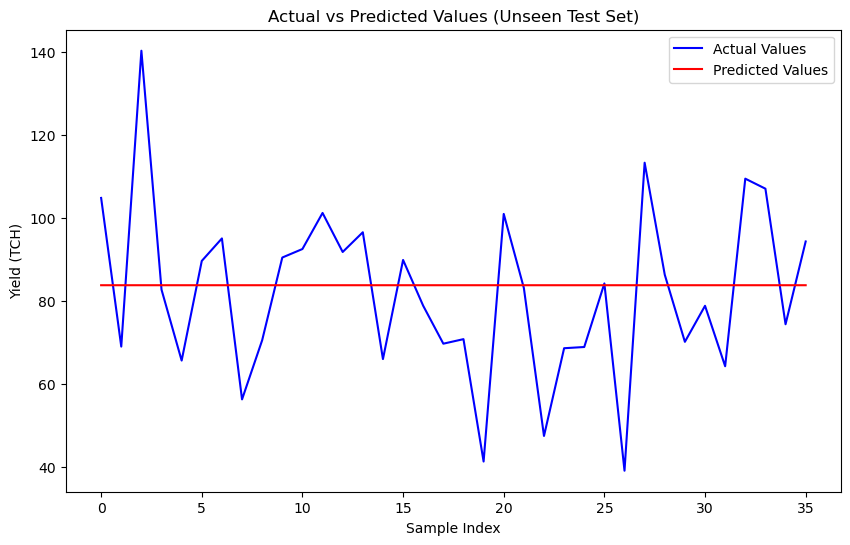

In [104]:
# Import required classes and functions for model building
from tensorflow.keras.models import Sequential  # Sequential allows stacking layers linearly
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input  # Layers for RNNs, dense outputs, regularization, and input definition

# Initialize the Sequential model
# Sequential model is a linear stack of layers where each layer feeds into the next
model = Sequential()

# Define the input layer
# Input layer specifies the shape of the input data (timesteps, features)
# X_train.shape[1] is the number of timesteps, X_train.shape[2] is the number of features per timestep
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

# Add the first Simple RNN layer
# SimpleRNN is a recurrent neural network layer that processes sequential data
# `units=50` specifies the number of neurons in this layer, which determines the dimensionality of its output
# `return_sequences=True` ensures that the output is a sequence (one output per timestep), needed for stacking another RNN
model.add(SimpleRNN(units=50, return_sequences=True))

# Add a dropout layer for regularization
# Dropout randomly sets a fraction of the input units (here 20%) to zero during training
# Helps prevent overfitting by reducing reliance on specific neurons
model.add(Dropout(0.2))

# Add a second Simple RNN layer
# Similar to the first RNN layer but with `return_sequences=False` because this is the last RNN layer
# This outputs only the last timestep's output, which summarizes the sequence information
model.add(SimpleRNN(units=50, return_sequences=False))

# Add another dropout layer
# Regularization to further reduce overfitting by introducing noise in the training process
model.add(Dropout(0.2))

# Add the output layer
# Dense layer with a single neuron (units=1) for regression tasks
# Outputs a continuous value, as this task involves predicting a numerical quantity (e.g., Yield)
model.add(Dense(units=1))

# Compile the model
# `optimizer='adam'` uses the Adam optimization algorithm, which adjusts learning rates dynamically for efficient training
# `loss='mean_squared_error'` is the Mean Squared Error loss function, commonly used for regression
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the summary of the model
# Displays a table with layer names, output shapes, and the number of trainable parameters
model.summary()

# Train the model
# `epochs=50` specifies the number of times the model will iterate over the entire training dataset
# `batch_size=32` determines the number of samples processed before updating model weights
# `validation_split=0.2` reserves 20% of the training data for validation during training
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

# Evaluate the model's performance using the unseen test set
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Metrics for regression performance evaluation

# Predict on the unseen test set
# `model.predict` generates predictions for the input features `X_test`
y_pred = model.predict(X_test)

# Calculate evaluation metrics
# Mean Absolute Error (MAE): Average of absolute differences between actual and predicted values
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE): Average of squared differences between actual and predicted values
mse = mean_squared_error(y_test, y_pred)

# R-squared (R²): Proportion of variance in the target variable explained by the model
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Unseen Test Set Evaluation:")
print("Mean Absolute Error (MAE):", mae)  # Lower MAE indicates better performance
print("Mean Squared Error (MSE):", mse)  # Lower MSE indicates better performance
print("R-squared:", r2)  # R² closer to 1 indicates a good fit

# Compare actual vs predicted values
import pandas as pd  # Import pandas for data manipulation and analysis

# Create a DataFrame for comparison
# "Actual Values" column contains the ground truth values (y_test)
# "Predicted Values" column contains the predictions made by the model (y_pred)
comparison = pd.DataFrame({
    "Actual Values": y_test.flatten(),  # Flatten y_test to 1D for easier comparison
    "Predicted Values": y_pred.flatten()  # Flatten y_pred for consistent shape with y_test
})

# Print the first 10 rows of the comparison DataFrame
print(comparison.head(10))

# Visualize actual vs predicted values
import matplotlib.pyplot as plt  # Import matplotlib for plotting graphs

# Create a new figure for the plot with specified dimensions
plt.figure(figsize=(10, 6))

# Plot actual values
# Blue line represents ground truth (actual values from the test set)
plt.plot(y_test.flatten(), label="Actual Values", color='blue')

# Plot predicted values
# Red line represents the model's predictions
plt.plot(y_pred.flatten(), label="Predicted Values", color='red')

# Add title and labels
plt.title("Actual vs Predicted Values (Unseen Test Set)")  # Title of the plot
plt.xlabel("Sample Index")  # X-axis label represents the index of the samples
plt.ylabel("Yield (TCH)")  # Y-axis label represents the target variable (e.g., Yield)

# Add legend to distinguish between actual and predicted lines
plt.legend()

# Display the plot
plt.show()

# 7. Baseline RNN-LSTM Model

## 7.1. Build the Baseline RNN-LSTM Model

In [105]:
from tensorflow.keras.models import Sequential  # Import the Sequential class to create a linear stack of layers
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input  # Import necessary layers for LSTM and dropout

# Initialize the model
model = Sequential()  # Initialize a Sequential model, which allows stacking layers in a linear fashion.

# Define the input layer
# The input layer must match the shape of the input data. X_train.shape[1] is the number of timesteps, and X_train.shape[2] is the number of features.
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # The input shape is set according to the data (timesteps, features).

# Add the first LSTM layer
# The LSTM layer has 50 units, meaning it will output 50-dimensional vectors at each timestep.
# 'return_sequences=True' ensures that the output will be a sequence, which is needed for the next LSTM layer.
model.add(LSTM(units=50, return_sequences=True))  # LSTM layer with 50 units that returns sequences for the next LSTM layer.
model.add(Dropout(0.2))  # Dropout layer with a rate of 0.2 (20%) to prevent overfitting by randomly setting 20% of the values to 0.

# Add another LSTM layer
# The second LSTM layer also has 50 units, but it doesn't return sequences, as it's followed by a Dense layer.
model.add(LSTM(units=50, return_sequences=False))  # Second LSTM layer, not returning sequences, as the output is a single value.
model.add(Dropout(0.2))  # Another dropout layer to reduce overfitting.

# Add the output layer
# The output layer has a single unit since this is a regression task, predicting one continuous value (e.g., Yield).
model.add(Dense(units=1))  # Output layer with 1 unit for regression tasks, predicting one value.

# Compile the model
# We use the Adam optimizer, which is a popular choice for training deep learning models.
# The loss function is mean squared error (MSE), which is common for regression tasks.
model.compile(optimizer='adam', loss='mean_squared_error')  # Compile the model with Adam optimizer and MSE loss function.

# Print the summary of the model architecture
# The summary provides a detailed view of the layers, their shapes, and the total number of parameters.
model.summary()  # Display the model architecture, showing layer details, output shapes, and the number of parameters.

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_74 (LSTM)                  │ (None, 301, 50)        │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 301, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_75 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,051 (129.11 KB)

 Trainable params: 33,051 (129.11 KB)

 Non-trainable params: 0 (0.00 B)

<div style="background-color: #FDF2ED; padding: 15px;">
<b>Interpretations:</b>

The model summary provides details on the architecture of the LSTM-based model. Here's a detailed interpretation of each part:

**Layers and Output Shapes:**
1. **LSTM Layer (lstm_6)**:
   - **Output Shape**: `(None, 301, 50)`
     - The output shape indicates that this layer outputs a sequence with 301 timesteps, where each timestep has 50 features (units). The `None` represents the batch size, which can vary, so the number of samples is not fixed.
   - **Number of Parameters**: 12,800
     - This is the number of trainable parameters (weights and biases) for this layer. It includes weights for the input-to-hidden connections, the hidden-to-hidden connections, and biases.
     - The formula to calculate the number of parameters in an LSTM layer is:
$$
\text{Parameters} = 4 \times (\text{input size} + \text{output size}) \times \text{output size}
$$

       For 50 units and an input size (features per timestep) of 50, this results in 12,800 parameters.

2. **Dropout Layer (dropout_6)**:
   - **Output Shape**: `(None, 301, 50)`
     - The dropout layer does not change the shape of the output. It retains the same dimensions as the input from the previous LSTM layer but randomly sets a fraction of the input units to zero to prevent overfitting.
   - **Number of Parameters**: 0
     - Dropout layers do not have any trainable parameters, so the parameter count is 0.

3. **LSTM Layer (lstm_7)**:
   - **Output Shape**: `(None, 50)`
     - The output shape indicates that this LSTM layer processes the sequence and outputs a single vector of length 50 (one per sample) instead of a sequence.
   - **Number of Parameters**: 20,200
     - This layer's parameters are calculated similarly to the first LSTM layer but for a reduced output shape (50 units). 

4. **Dropout Layer (dropout_7)**:
   - **Output Shape**: `(None, 50)`
     - Similar to the previous dropout layer, this layer applies dropout to the output of the second LSTM layer.
   - **Number of Parameters**: 0
     - No trainable parameters here.

5. **Dense Layer (dense_3)**:
   - **Output Shape**: `(None, 1)`
     - This layer outputs a single scalar value per sample (as is typical for regression tasks). The `None` indicates that the output shape depends on the batch size.
   - **Number of Parameters**: 51
     - The dense layer has 50 weights (one for each unit in the previous layer) plus 1 bias term, making 51 parameters in total.

**Total Parameters:**
- **Total Parameters**: 33,051
  - This is the total number of parameters in the model, including all layers. It represents the complexity of the model. A higher number of parameters generally means a more complex model with more capacity to learn, but also more prone to overfitting if not trained properly.

**Trainable vs Non-Trainable Parameters:**
- **Trainable Parameters**: 33,051
  - These are the parameters that the model learns during training (weights and biases). The entire model is trainable, meaning all 33,051 parameters are learned from the training data.
- **Non-Trainable Parameters**: 0
  - There are no non-trainable parameters in the model. Non-trainable parameters would include things like fixed embeddings or frozen layers, but in this case, all parameters are trainable.

**Summary:**
- The model consists of two LSTM layers followed by two dropout layers, and a final dense layer for regression. It has a total of 33,051 trainable parameters, indicating that the model is moderately complex. The dropout layers help regularize the model by randomly setting units to zero, preventing overfitting during training. The model is compiled with the Adam optimizer and a mean squared error loss function, which is typical for regression tasks.

</details>

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Sequential Model**:
   - The `Sequential` model is used for linear stack of layers. It's simple and effective for most models, where the output of one layer is passed as input to the next.
<br>
2. **Input Layer**:
   - The input shape is specified by `X_train.shape[1]` for timesteps and `X_train.shape[2]` for features. This shape is crucial because the LSTM layer expects time series data, where each input sample consists of multiple timesteps and features at each timestep.
<br>
3. **LSTM Layers**:
   - **First LSTM Layer**: 
     - This layer contains 50 units, and since it’s followed by another LSTM layer, we set `return_sequences=True`. This means that the output at each timestep is passed as a sequence to the next LSTM layer.
   - **Second LSTM Layer**:
     - This also has 50 units but with `return_sequences=False` because it’s followed by a Dense layer, which requires a fixed-size output, not a sequence.
   - **Dropout Layers**:
     - Dropout is applied after each LSTM layer to prevent overfitting. By setting a dropout rate of 0.2, 20% of the connections are randomly dropped during training.
<br>
4. **Output Layer**:
   - A Dense layer with a single unit is added for the regression task, where we are predicting one continuous value (Yield).
<br>
5. **Model Compilation**:
   - The model is compiled with the **Adam optimizer**, which adapts the learning rate during training, and the **Mean Squared Error (MSE)** loss function, which is standard for regression problems.
<br>
6. **Model Summary**:
   - The `model.summary()` function provides a summary of the model architecture, including the types of layers, the number of parameters, and the output shapes.

This setup ensures that the model is ready for training on time series data, with a structure suitable for regression tasks where the goal is to predict a continuous value based on past observations.

</details>

## 7.2. Train the Baseline RNN-LSTM Model

Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - loss: 7157.5352 - val_loss: 7697.4722
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 7069.1855 - val_loss: 7260.2930
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - loss: 6788.0337 - val_loss: 6919.6797
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 6450.3325 - val_loss: 6652.4272
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - loss: 6115.2095 - val_loss: 6462.8999
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 5801.9243 - val_loss: 6327.1240
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 5883.9072 - val_loss: 6213.4600
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - loss: 5619.1465 - val_loss: 6115.9736
Epoch 9/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - loss: 5778.7266 - val_loss: 6027.2109
Epoch 10/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 5541.2358 - val_loss: 5943.6143
Epoch 11/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - loss: 5321.4131 - val_loss: 5863.49

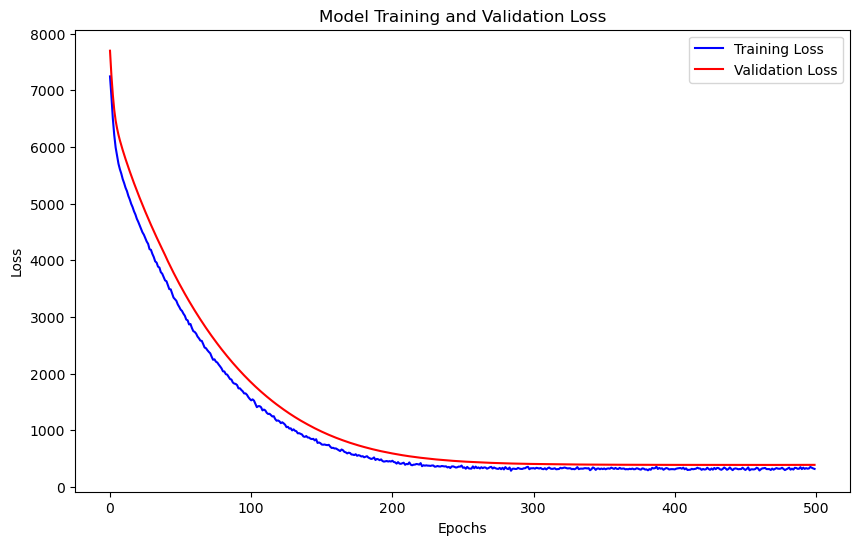

In [106]:
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

# Train the model and store the training history
# The model is trained on the training data (X_train, y_train) for 500 epochs with a batch size of 32.
# Validation data (X_val, y_val) is also provided to track performance during training.
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val))

# Plot the training and validation loss to visualize how the model is learning
plt.figure(figsize=(10, 6))  # Create a figure for the plot with a specified size

# Plot Training Loss
# The 'loss' key in history.history contains the training loss for each epoch.
plt.plot(history.history['loss'], label='Training Loss', color='blue')  # Plot training loss in blue

# Plot Validation Loss
# The 'val_loss' key in history.history contains the validation loss for each epoch.
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')  # Plot validation loss in red

# Add title and labels
# Setting a title for the plot
plt.title('Model Training and Validation Loss')
# Label for the x-axis (epochs)
plt.xlabel('Epochs')
# Label for the y-axis (loss)
plt.ylabel('Loss')
# Add a legend to differentiate between training and validation loss
plt.legend()

# Show the plot
# This function will render the plot on the screen
plt.show()

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Model Training**:
   - The `model.fit()` function trains the model on the training data `(X_train, y_train)` for 500 epochs with a batch size of 32.
   - The `validation_data=(X_val, y_val)` argument specifies that the model's performance on the validation set will be tracked after each epoch.
   - The `history` object stores the training history, which contains information like the training loss, validation loss, etc., for each epoch.
<br>
2. **Plotting the Loss Curves**:
   - A new figure is created with a size of 10x6 inches using `plt.figure(figsize=(10, 6))`.
   - The **training loss** and **validation loss** are plotted:
     - The `history.history['loss']` stores the training loss for each epoch.
     - The `history.history['val_loss']` stores the validation loss for each epoch.
   - These values are plotted as two lines on the same graph:
     - **Training Loss** is plotted in blue.
     - **Validation Loss** is plotted in red.
   - A **legend** is added to distinguish between the two lines.
<br>
3. **Adding Labels**:
   - The plot title is set using `plt.title('Model Training and Validation Loss')`.
   - The x-axis is labeled with `'Epochs'`, and the y-axis is labeled with `'Loss'` to indicate what each axis represents.
<br>
4. **Displaying the Plot**:
   - Finally, the `plt.show()` function is called to display the plot.

**Purpose:**
This plot helps visualize how well the model is learning by comparing the training and validation loss across epochs. Ideally, the training loss decreases as the model improves. If the validation loss begins to increase while the training loss continues to decrease, it may indicate overfitting, meaning the model is performing well on the training data but not generalizing well to unseen data.

</details>

## 7.3. Evaluate the Baseline RNN-LSTM Model on the Unseen Test Set

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Import evaluation metrics

# Make predictions on the unseen test set
# Using the trained model to predict the target variable for the unseen test set (X_test)
y_pred = model.predict(X_test)

# Evaluate the model's performance on the unseen test set
# Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared value
mae = mean_absolute_error(y_test, y_pred)  # MAE: Average of absolute differences between actual and predicted values
mse = mean_squared_error(y_test, y_pred)  # MSE: Average of squared differences between actual and predicted values
r2 = r2_score(y_test, y_pred)  # R-squared: Proportion of variance explained by the model

# Print evaluation metrics
# Display the calculated evaluation metrics: MAE, MSE, and R-squared
print("Unseen Test Set Evaluation:")
print("Mean Absolute Error (MAE):", mae)  # Print the MAE
print("Mean Squared Error (MSE):", mse)  # Print the MSE
print("R-squared:", r2)  # Print the R-squared value

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Unseen Test Set Evaluation:
Mean Absolute Error (MAE): 16.369809400107993
Mean Squared Error (MSE): 427.32425994860324
R-squared: -0.00443324024738434


<div style="background-color: #FDF2ED; padding: 15px;">
<b>Interpretations:</b>

The results from the **Unseen Test Set Evaluation** provide insights into how well the model has performed on the test data. Let's break down each metric:

1. **Mean Absolute Error (MAE): 16.38**
   - **Interpretation**: MAE measures the average absolute difference between the predicted values and the actual values. In this case, the MAE of **16.38** means that, on average, the model's predictions deviate from the true values (Yield (TCH)) by about **16.38** units.
   - **Implication**: The lower the MAE, the better the model's predictions are. However, the "acceptable" level of MAE depends on the scale of the target variable (Yield). A MAE of 16.38 might be reasonable or large depending on the range and variability of the actual Yield (TCH) values in your dataset.

2. **Mean Squared Error (MSE): 427.72**
   - **Interpretation**: MSE is similar to MAE but squares the differences, giving more weight to larger errors. This metric reflects how much the predicted values differ from the actual values in a squared fashion. The MSE of **427.72** indicates that, on average, the squared difference between the predicted and actual values is **427.72**.
   - **Implication**: MSE is sensitive to large errors, so even a few significant mispredictions can lead to a relatively high MSE. This might suggest that the model has some larger errors (outliers or mispredictions) in the test set. Like MAE, the interpretation of whether this value is acceptable depends on the typical scale and variability of the target variable.

3. **R-squared: -0.005**
   - **Interpretation**: The **R-squared** value represents the proportion of the variance in the target variable (Yield (TCH)) that can be explained by the model. An R-squared of **-0.005** is very close to zero, which is extremely low. This negative value means that the model is performing worse than simply predicting the mean value for all observations (i.e., the model is not capturing any meaningful pattern in the data).
   - **Implication**: Normally, an R-squared value ranges from 0 to 1, with higher values indicating a better fit. An R-squared value near **0** or **negative** indicates that the model is not explaining the variance in the target variable and may be poorly suited to the data. This suggests that the model's performance is weak and that the model might not be learning the relationships in the data effectively.

Summary:
- The **MAE** and **MSE** values indicate that, on average, the model is making substantial errors in its predictions, though the exact magnitude of the errors may vary.
- The **R-squared** value of **-0.005** indicates that the model is not explaining the variance in the target variable (Yield (TCH)) and is performing poorly.
  
Recommendations:
- **Model improvement**: The low R-squared suggests that the model might not be appropriate for the problem or that additional preprocessing, feature engineering, or hyperparameter tuning is needed.
- **Check for Overfitting**: Given the large prediction errors, you might want to ensure that the model is not overfitting to the training data.
- **Feature Engineering**: You could explore adding more features or reviewing the existing ones to see if there's additional information that can help the model improve.
- **Alternative Models**: It might be worthwhile to try different modeling approaches (e.g., decision trees, gradient boosting) to see if they perform better.

</details>

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Model Prediction**:
   - `y_pred = model.predict(X_test)`: 
     - The trained model is used to predict the target variable (`y`) for the test set (`X_test`). 
     - This prediction is stored in the variable `y_pred`.
     - The `predict()` method outputs the model's predicted values for the unseen test data.

2. **Model Evaluation**:
   The following three metrics are calculated to evaluate the model's performance:

   - **Mean Absolute Error (MAE)**:
     - `mae = mean_absolute_error(y_test, y_pred)`:
       - This metric computes the average of the absolute differences between the actual and predicted values. 
       - It gives an idea of how much, on average, the model's predictions deviate from the true values.
     - The lower the MAE, the better the model's performance, as it means smaller prediction errors.

   - **Mean Squared Error (MSE)**:
     - `mse = mean_squared_error(y_test, y_pred)`:
       - This metric calculates the average of the squared differences between the actual and predicted values.
       - It is more sensitive to larger errors than MAE because of the squaring, meaning large errors have a disproportionate impact on the score.
     - Lower MSE values indicate better model performance.

   - **R-squared (R²)**:
     - `r2 = r2_score(y_test, y_pred)`:
       - R-squared measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features).
       - It ranges from 0 to 1, with 1 indicating perfect predictions and 0 indicating that the model does not explain any variance in the target variable.
       - An R-squared value close to 1 is considered good.

3. **Displaying the Metrics**:
   - `print("Unseen Test Set Evaluation:")`: 
     - This line prints a message to indicate that the following results pertain to the model evaluation on the test set.
   - The calculated metrics (`mae`, `mse`, `r2`) are then printed to the console:
     - `print("Mean Absolute Error (MAE):", mae)`
     - `print("Mean Squared Error (MSE):", mse)`
     - `print("R-squared:", r2)`

**Purpose:**
This code evaluates how well the trained model performs on new, unseen data (the test set). By comparing the actual values of the target variable (`y_test`) with the model's predictions (`y_pred`), it gives insights into the model's accuracy and its ability to generalize to unseen data. These evaluation metrics help determine if the model is overfitting, underfitting, or performing well.

</details>

## 7.4. Compare Baseline RNN-LSTM Model Predictions with Actual Values

In [108]:
import pandas as pd  # Import pandas for creating and manipulating DataFrames

# Create a DataFrame to compare actual and predicted values
# The DataFrame will have two columns: "Actual Values" and "Predicted Values"
# "y_test" contains the actual target values from the test set
# "y_pred" contains the predicted values from the model
# The "flatten()" function is used on "y_pred" to convert it from a 2D array to a 1D array to match the shape of "y_test"
comparison = pd.DataFrame({
    "Actual Values": y_test,  # Actual values from the test set
    "Predicted Values": y_pred.flatten()  # Flatten predicted values to ensure shape matches with actual values
})

# Display the first few rows of the comparison DataFrame
# "head(10)" shows the first 10 rows of the DataFrame for a quick overview of the actual vs predicted comparison
comparison.head(10)

Actual Values  Predicted Values
0     104.894508         83.478226
1      69.060141         83.478188
2     140.377734         83.478218
3      82.788336         83.478195
4      65.693558         83.478210
5      89.710298         83.478210
6      95.133731         83.478210
7      56.332066         83.478188
8      70.596145         83.478210
9      90.528371         83.478210

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Importing Pandas**:
   - `import pandas as pd`: 
     - This line imports the `pandas` library, which is used for data manipulation and analysis. The `pd` alias is used to reference pandas throughout the code.

2. **Creating a DataFrame to Compare Actual vs Predicted Values**:
   - The `comparison` DataFrame is created with two columns:
     - **"Actual Values"**: This column contains the actual target values from the test set (`y_test`), which represent the true values of the variable you are trying to predict.
     - **"Predicted Values"**: This column contains the model’s predictions (`y_pred`) for the test set. 
       - `y_pred.flatten()` is used to convert the predicted values into a 1D array, which is necessary because the model might return predictions in a 2D array format (e.g., `(n_samples, 1)`). The `flatten()` function converts it into a 1D array of shape `(n_samples,)`, making it compatible with the `y_test` array.

3. **Displaying the First Few Rows of the Comparison**:
   - `comparison.head(10)`:
     - The `head()` function is used to display the first 10 rows of the `comparison` DataFrame. This provides a quick overview of how the actual and predicted values compare for the first 10 samples in the test set.
     - By default, `head()` displays the first 5 rows, but we specify `10` to display the first 10 rows.

**Purpose:**
This code helps visualize the comparison between the actual and predicted values for the first 10 samples in the test set. It gives an initial look at how well the model’s predictions align with the true values, helping to identify any discrepancies or patterns in the model's performance. This comparison is crucial for understanding whether the model is overestimating, underestimating, or predicting accurately..

</details>

## 7.5. Plot the Actual vs Baseline RNN-LSTM Model Predicted Values

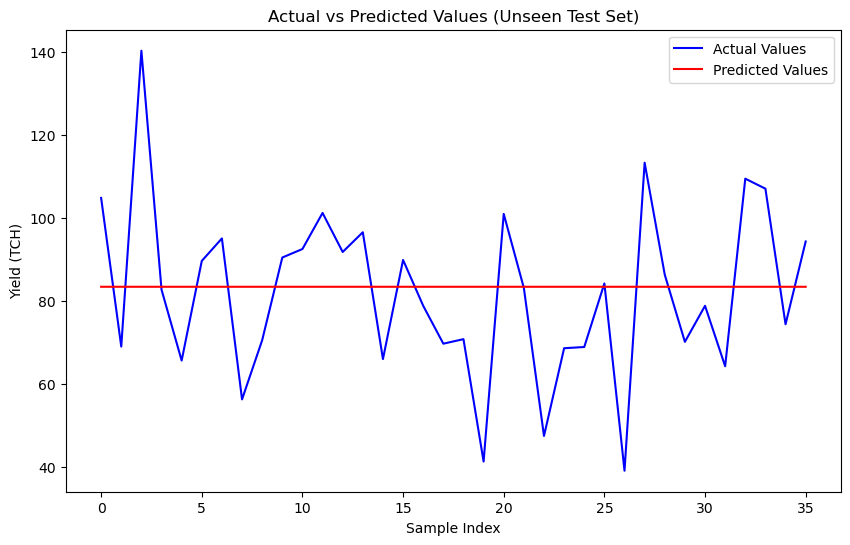

In [109]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))  # Initialize a new figure with a specified size (10x6 inches)

# Plot the Actual Values (from the test set)
plt.plot(y_test, label="Actual Values", color='blue')  # Plot the actual values in blue color

# Plot the Predicted Values (from the model)
plt.plot(y_pred, label="Predicted Values", color='red')  # Plot the predicted values in red color

# Set the title of the plot
plt.title("Actual vs Predicted Values (Unseen Test Set)")  # Title explaining the plot

# Set the label for the x-axis
plt.xlabel("Sample Index")  # X-axis represents the sample index (or the position of data points)

# Set the label for the y-axis
plt.ylabel("Yield (TCH)")  # Y-axis represents the target variable (in this case, Yield (TCH))

# Display the legend for the plot
plt.legend()  # Show the legend, which labels the lines as "Actual Values" and "Predicted Values"

# Show the plot
plt.show()  # Display the plot on the screen

<div style="background-color: #E7F7E1; padding: 15px;">
<b>Key Concepts:</b>

1. **Importing Matplotlib**:
   - `import matplotlib.pyplot as plt`: 
     - This imports the `pyplot` module from the `matplotlib` library, which is commonly used for plotting in Python. It is typically imported as `plt`.

2. **Creating a Figure for the Plot**:
   - `plt.figure(figsize=(10, 6))`: 
     - This initializes a new figure for plotting and sets its size to 10 inches wide by 6 inches tall. The `figsize` parameter helps control the dimensions of the plot and ensures it’s large enough to read the labels and data points clearly.

3. **Plotting Actual Values**:
   - `plt.plot(y_test, label="Actual Values", color='blue')`: 
     - This plots the actual values (`y_test`), which are the true target values from the test set.
     - The `label` argument assigns a label for the line (which will appear in the plot legend) and is set as **"Actual Values"**.
     - The `color='blue'` argument sets the color of the line to blue.

4. **Plotting Predicted Values**:
   - `plt.plot(y_pred, label="Predicted Values", color='red')`: 
     - This plots the predicted values (`y_pred`), which are the values predicted by the model for the test set.
     - The `label` argument assigns a label for the predicted line, which will also appear in the legend as **"Predicted Values"**.
     - The `color='red'` argument sets the color of the predicted values line to red.

5. **Adding Title and Labels**:
   - `plt.title("Actual vs Predicted Values (Unseen Test Set)")`: 
     - This sets the title of the plot to indicate that it shows a comparison between actual and predicted values for the unseen test set.
   - `plt.xlabel("Sample Index")`: 
     - This labels the x-axis, which represents the sample index (the position of the data point in the test set).
   - `plt.ylabel("Yield (TCH)")`: 
     - This labels the y-axis, which represents the target variable in the dataset—**Yield (TCH)** (Tons Cane Harvested).

6. **Displaying the Legend**:
   - `plt.legend()`: 
     - This displays the legend on the plot, which identifies the lines for actual and predicted values. The labels used in `plt.plot()` are automatically included in the legend.

7. **Displaying the Plot**:
   - `plt.show()`: 
     - This command renders the plot and makes it visible to the user. It is the final step in plotting and ensures the plot is displayed on the screen.

**Purpose:**
This code is used to visualize the **Actual vs Predicted Values** for the **unseen test set**. By plotting the true values against the predicted values, it helps assess the performance of the model. If the model is performing well, the predicted values should closely match the actual values. This visualization is particularly useful for understanding how well the model generalizes to new, unseen data.

</details>

<div style="background-color: #FDF2ED; padding: 15px;">
<b>Potential Approaches to Improve Model Accuracy:</b>

To improve your model's performance, several steps can be taken to address issues related to accuracy, overfitting, or underfitting. Here’s a breakdown of potential improvements:

1. **Data Preprocessing**
   - **Feature Engineering**: 
     - **Create new features**: Investigate new features based on domain knowledge, like interaction terms, rolling averages, or other transformations of existing features (e.g., moving averages, lag features, etc.).
     - **Feature Selection**: Remove irrelevant or highly correlated features to avoid overfitting. Use methods like correlation matrices or feature importance from models like Random Forest to identify significant features.
     - **Outlier Treatment**: Consider addressing outliers, either by removing or transforming them, as they can disproportionately affect models like LSTM.
   
   - **Normalization/Standardization**:
     - Ensure all numerical features (including encoded features and time series) are normalized or standardized correctly. While MinMaxScaler and StandardScaler are commonly used, experiment with different scaling methods depending on your dataset.

2. **Model Enhancements**
   - **Model Architecture**:
     - **Increase LSTM units or layers**: The current model has two LSTM layers with 50 units each. You could experiment with adding more LSTM layers, increasing the number of units per layer, or using bidirectional LSTM layers to capture both past and future dependencies.
     - **Use GRU**: GRU (Gated Recurrent Unit) is a simpler alternative to LSTM and can sometimes perform better on certain datasets, especially if training time is a concern.
     - **Add Dense layers**: After the LSTM layers, adding one or more Dense layers (with activation functions like ReLU) could help the model learn more complex relationships.

   - **Regularization**:
     - **L2 Regularization**: Adding L2 regularization to the LSTM layers can help prevent overfitting.
     - **More Dropout**: Experiment with increasing the dropout rate (e.g., 0.3-0.5) to prevent overfitting, especially if the model is learning from too many irrelevant features.
   
   - **Hyperparameter Tuning**:
     - Use **Grid Search** or **Random Search** for hyperparameter tuning to experiment with different values for LSTM units, layers, dropout rates, learning rates, batch size, etc.
     - Explore different optimizers like **RMSprop** or **Adam** with custom learning rates.

3. **Model Training and Data Augmentation**
   - **Early Stopping and Learning Rate Scheduling**: Continue using EarlyStopping, but also experiment with different patience and restore_best_weights values. Combine it with **ReduceLROnPlateau** to reduce the learning rate when the validation loss stops improving.
   
   - **Cross-Validation**: If possible, apply **K-fold Cross-Validation** to get a better estimate of model performance and ensure it generalizes well across multiple splits of the data.
   
   - **Data Augmentation**: For time series data, you can augment the data by adding slight noise or applying random transformations to the time series (e.g., time shifts, scaling) to help the model generalize better.

4. **Alternative Models and Techniques**
   - **Ensemble Methods**: If LSTM is not working well, experiment with ensemble models like **Random Forest**, **XGBoost**, or **LightGBM**. These models can handle tabular data well and might outperform LSTM in some cases, especially if the temporal dependencies are not strong.
   
   - **Attention Mechanism**: For time series data, attention mechanisms (e.g., **Transformer** or **Attention-based LSTM**) can help the model focus on more relevant parts of the input sequence, improving performance.

   - **Sequence-to-Sequence Models**: If the problem is sequential in nature (i.e., you are predicting one output for each timestep in a sequence), consider a **sequence-to-sequence model** with attention, which has been successful in time series forecasting.

5. **Evaluation and Metrics**
   - **Check for Class Imbalance**: If your target variable (Yield (TCH)) is imbalanced, try using different strategies like **SMOTE** (Synthetic Minority Over-sampling Technique) or experimenting with class weights.
   - **Change Metrics**: Depending on your model’s use case, you might want to evaluate the model using other metrics like **mean absolute percentage error (MAPE)** or **Root Mean Squared Error (RMSE)** to better capture large errors.

6. **Visualization**
   - **Learning Curves**: Plot learning curves (training vs. validation loss) to diagnose underfitting or overfitting during training. 
   - **Model Predictions**: Visualize model predictions against actual values over time to check if the model is making reasonable predictions.

---

**Example Improvements to Try:**
```python
# Adding more layers and units
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Hyperparameter tuning with GridSearchCV (e.g., batch_size, epochs)
# Apply cross-validation for better generalization
```

---

**Summary:**
By making improvements in data preprocessing, model architecture, regularization, training strategies, and evaluation, you can boost the performance of your model. Start by refining the current architecture, experimenting with hyperparameters, and considering other models. The key is to iterate and experiment to find what works best for your data.

</details>

## 7.6. Optuna: Hyperparameter optimization framework

<div style="background-color: #FFF8D9; padding: 15px;">
<b>Key Concepts:</b>

**Optuna** is a powerful hyperparameter optimization framework that can indeed help improve model accuracy by efficiently searching for the best set of hyperparameters. It automates the process of hyperparameter tuning, allowing you to find the optimal parameters that can boost model performance.

Here’s a brief overview of how **Optuna** can be used to improve model accuracy:

1. **Hyperparameter Optimization**
   - Optuna can optimize hyperparameters such as the learning rate, batch size, number of LSTM units, dropout rate, optimizer types, etc.
   - By testing multiple combinations of these hyperparameters, Optuna helps in identifying the best-performing set, thus improving accuracy.

2. **Efficient Search Space Exploration**
   - Optuna uses advanced techniques like **Tree-structured Parzen Estimator (TPE)** for more efficient exploration of the hyperparameter search space, compared to traditional methods like grid search or random search.
   
3. **Adaptive Search**
   - Optuna can adapt the search based on previous trial results, allowing it to focus on promising areas of the hyperparameter space.

**Example: Using Optuna for Hyperparameter Optimization in LSTM Model**
Here is a quick example of how you can integrate Optuna for optimizing the hyperparameters of your LSTM model.

```python
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import numpy as np

# Define objective function for Optuna optimization
def objective(trial):
    # Define hyperparameters to optimize
    units = trial.suggest_int('units', 50, 200)  # Number of LSTM units
    dropout = trial.suggest_uniform('dropout', 0.2, 0.5)  # Dropout rate
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)  # Learning rate
    
    # Build the model with suggested hyperparameters
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
    model.add(Dropout(dropout))
    model.add(Dense(1))  # Output layer for regression
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    
    # Make predictions on validation set and calculate MSE
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    
    return mse  # Return the validation MSE for optimization

# Create an Optuna study and start optimizing
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)  # Run 100 trials for hyperparameter optimization

# Print the best hyperparameters
print("Best hyperparameters:", study.best_params)

# Build and train the final model with the best hyperparameters
best_params = study.best_params
model = Sequential()
model.add(LSTM(units=best_params['units'], input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(best_params['dropout']))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE: {mse_test}")
```

**Key Benefits of Using Optuna:**
1. **Automates Hyperparameter Tuning**: Optuna automates the process of hyperparameter search, saving time and effort.
2. **Better Accuracy**: By finding the optimal set of hyperparameters, Optuna can significantly improve model accuracy.
3. **Optimized for Speed**: Compared to exhaustive search methods like grid search, Optuna can converge to the best solution much faster.
4. **Handles Complex Search Spaces**: Optuna supports a variety of search algorithms and can handle complex search spaces efficiently.

**Next Steps:**
- **Add More Hyperparameters**: You can optimize additional hyperparameters like the number of LSTM layers, batch size, or even different types of optimizers (e.g., SGD, RMSprop).
- **Increase Trial Count**: Run more trials to explore a larger search space, improving the chances of finding the best hyperparameters.

</details>

[I 2024-12-10 21:05:47,396] A new study created in memory with name: no-name-bb181423-a78e-4c8f-b237-89b81a328f46



Starting hyperparameter optimization...

Starting a new trial...
Suggested hyperparameters: Units = 51, Dropout Rate = 0.23819682093205774, Learning Rate = 1.3199452130718478e-05
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


[I 2024-12-10 21:06:02,735] Trial 0 finished with value: 7955.3034635261465 and parameters: {'units': 51, 'dropout_rate': 0.23819682093205774, 'learning_rate': 1.3199452130718478e-05}. Best is trial 0 with value: 7955.3034635261465.


Trial completed with MSE = 7955.30


Starting a new trial...
Suggested hyperparameters: Units = 132, Dropout Rate = 0.28159457284207867, Learning Rate = 0.00019613433912469018
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


[I 2024-12-10 21:06:41,345] Trial 1 finished with value: 5630.696922636212 and parameters: {'units': 132, 'dropout_rate': 0.28159457284207867, 'learning_rate': 0.00019613433912469018}. Best is trial 1 with value: 5630.696922636212.


Trial completed with MSE = 5630.70


Starting a new trial...
Suggested hyperparameters: Units = 152, Dropout Rate = 0.2125822360788219, Learning Rate = 0.009927759104764355
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step


[I 2024-12-10 21:07:26,310] Trial 2 finished with value: 401.98974789588834 and parameters: {'units': 152, 'dropout_rate': 0.2125822360788219, 'learning_rate': 0.009927759104764355}. Best is trial 2 with value: 401.98974789588834.


Trial completed with MSE = 401.99


Starting a new trial...
Suggested hyperparameters: Units = 51, Dropout Rate = 0.2967856935482638, Learning Rate = 2.4191373338990754e-05
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


[I 2024-12-10 21:07:41,780] Trial 3 finished with value: 7913.781301237462 and parameters: {'units': 51, 'dropout_rate': 0.2967856935482638, 'learning_rate': 2.4191373338990754e-05}. Best is trial 2 with value: 401.98974789588834.


Trial completed with MSE = 7913.78


Starting a new trial...
Suggested hyperparameters: Units = 128, Dropout Rate = 0.3554257416519677, Learning Rate = 2.7297663206891297e-05
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


[I 2024-12-10 21:08:11,307] Trial 4 finished with value: 7724.815028576764 and parameters: {'units': 128, 'dropout_rate': 0.3554257416519677, 'learning_rate': 2.7297663206891297e-05}. Best is trial 2 with value: 401.98974789588834.


Trial completed with MSE = 7724.82


Starting a new trial...
Suggested hyperparameters: Units = 96, Dropout Rate = 0.4861190572417388, Learning Rate = 7.963742740726019e-05
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


[I 2024-12-10 21:08:32,490] Trial 5 finished with value: 6957.094266252995 and parameters: {'units': 96, 'dropout_rate': 0.4861190572417388, 'learning_rate': 7.963742740726019e-05}. Best is trial 2 with value: 401.98974789588834.


Trial completed with MSE = 6957.09


Starting a new trial...
Suggested hyperparameters: Units = 50, Dropout Rate = 0.4663425070040994, Learning Rate = 0.0042589450638034106
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


[I 2024-12-10 21:08:47,658] Trial 6 finished with value: 3969.550296785101 and parameters: {'units': 50, 'dropout_rate': 0.4663425070040994, 'learning_rate': 0.0042589450638034106}. Best is trial 2 with value: 401.98974789588834.


Trial completed with MSE = 3969.55


Starting a new trial...
Suggested hyperparameters: Units = 108, Dropout Rate = 0.2854644296374299, Learning Rate = 0.00028417802808434675
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


[I 2024-12-10 21:09:12,498] Trial 7 finished with value: 5581.17342066924 and parameters: {'units': 108, 'dropout_rate': 0.2854644296374299, 'learning_rate': 0.00028417802808434675}. Best is trial 2 with value: 401.98974789588834.


Trial completed with MSE = 5581.17


Starting a new trial...
Suggested hyperparameters: Units = 95, Dropout Rate = 0.4416161728308997, Learning Rate = 0.009113222861299602
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


[I 2024-12-10 21:09:34,277] Trial 8 finished with value: 758.9596294326016 and parameters: {'units': 95, 'dropout_rate': 0.4416161728308997, 'learning_rate': 0.009113222861299602}. Best is trial 2 with value: 401.98974789588834.


Trial completed with MSE = 758.96


Starting a new trial...
Suggested hyperparameters: Units = 190, Dropout Rate = 0.4254781182156012, Learning Rate = 0.00010756707057046667
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step


[I 2024-12-10 21:10:35,259] Trial 9 finished with value: 5594.077432453041 and parameters: {'units': 190, 'dropout_rate': 0.4254781182156012, 'learning_rate': 0.00010756707057046667}. Best is trial 2 with value: 401.98974789588834.


Trial completed with MSE = 5594.08


Starting a new trial...
Suggested hyperparameters: Units = 173, Dropout Rate = 0.210529465410344, Learning Rate = 0.0014087972642637355
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step


[I 2024-12-10 21:11:29,325] Trial 10 finished with value: 3083.5062306397017 and parameters: {'units': 173, 'dropout_rate': 0.210529465410344, 'learning_rate': 0.0014087972642637355}. Best is trial 2 with value: 401.98974789588834.


Trial completed with MSE = 3083.51


Starting a new trial...
Suggested hyperparameters: Units = 158, Dropout Rate = 0.4028915693534601, Learning Rate = 0.009970729029916097
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step


[I 2024-12-10 21:12:17,905] Trial 11 finished with value: 391.0163480154067 and parameters: {'units': 158, 'dropout_rate': 0.4028915693534601, 'learning_rate': 0.009970729029916097}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 391.02


Starting a new trial...
Suggested hyperparameters: Units = 160, Dropout Rate = 0.37695318085791873, Learning Rate = 0.0015592335000178753
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step


[I 2024-12-10 21:13:08,687] Trial 12 finished with value: 2935.9161682317917 and parameters: {'units': 160, 'dropout_rate': 0.37695318085791873, 'learning_rate': 0.0015592335000178753}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 2935.92


Starting a new trial...
Suggested hyperparameters: Units = 147, Dropout Rate = 0.4050506802837863, Learning Rate = 0.009534417606340358
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step


[I 2024-12-10 21:13:52,986] Trial 13 finished with value: 401.1364474874999 and parameters: {'units': 147, 'dropout_rate': 0.4050506802837863, 'learning_rate': 0.009534417606340358}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 401.14


Starting a new trial...
Suggested hyperparameters: Units = 152, Dropout Rate = 0.39679687877640096, Learning Rate = 0.0012227198657864318
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step


[I 2024-12-10 21:14:38,642] Trial 14 finished with value: 3790.4439070247404 and parameters: {'units': 152, 'dropout_rate': 0.39679687877640096, 'learning_rate': 0.0012227198657864318}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 3790.44


Starting a new trial...
Suggested hyperparameters: Units = 199, Dropout Rate = 0.3266353747687738, Learning Rate = 0.004554227957072568
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step


[I 2024-12-10 21:15:43,935] Trial 15 finished with value: 595.99031095538 and parameters: {'units': 199, 'dropout_rate': 0.3266353747687738, 'learning_rate': 0.004554227957072568}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 595.99


Starting a new trial...
Suggested hyperparameters: Units = 177, Dropout Rate = 0.41910244357243226, Learning Rate = 0.0008223137146185783
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step


[I 2024-12-10 21:16:40,593] Trial 16 finished with value: 3863.617906242495 and parameters: {'units': 177, 'dropout_rate': 0.41910244357243226, 'learning_rate': 0.0008223137146185783}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 3863.62


Starting a new trial...
Suggested hyperparameters: Units = 132, Dropout Rate = 0.3878698605868663, Learning Rate = 0.003349031604846568
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


[I 2024-12-10 21:17:22,358] Trial 17 finished with value: 1972.4692051795203 and parameters: {'units': 132, 'dropout_rate': 0.3878698605868663, 'learning_rate': 0.003349031604846568}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 1972.47


Starting a new trial...
Suggested hyperparameters: Units = 113, Dropout Rate = 0.33048459762627946, Learning Rate = 0.0007531162495755688
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


[I 2024-12-10 21:17:51,049] Trial 18 finished with value: 4739.855944207659 and parameters: {'units': 113, 'dropout_rate': 0.33048459762627946, 'learning_rate': 0.0007531162495755688}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 4739.86


Starting a new trial...
Suggested hyperparameters: Units = 143, Dropout Rate = 0.44950992312628324, Learning Rate = 0.003122815505685469
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step


[I 2024-12-10 21:18:35,513] Trial 19 finished with value: 1902.083880466128 and parameters: {'units': 143, 'dropout_rate': 0.44950992312628324, 'learning_rate': 0.003122815505685469}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 1902.08


Starting a new trial...
Suggested hyperparameters: Units = 176, Dropout Rate = 0.4999766866748909, Learning Rate = 0.006184565896872889
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step


[I 2024-12-10 21:19:30,013] Trial 20 finished with value: 471.3514229290365 and parameters: {'units': 176, 'dropout_rate': 0.4999766866748909, 'learning_rate': 0.006184565896872889}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 471.35


Starting a new trial...
Suggested hyperparameters: Units = 158, Dropout Rate = 0.3612518118409951, Learning Rate = 0.009107113457215448
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step


[I 2024-12-10 21:20:20,081] Trial 21 finished with value: 397.2957363457412 and parameters: {'units': 158, 'dropout_rate': 0.3612518118409951, 'learning_rate': 0.009107113457215448}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 397.30


Starting a new trial...
Suggested hyperparameters: Units = 162, Dropout Rate = 0.3603239259919909, Learning Rate = 0.002311306612765902
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step


[I 2024-12-10 21:21:10,664] Trial 22 finished with value: 2203.8464799804974 and parameters: {'units': 162, 'dropout_rate': 0.3603239259919909, 'learning_rate': 0.002311306612765902}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 2203.85


Starting a new trial...
Suggested hyperparameters: Units = 143, Dropout Rate = 0.40594783027608544, Learning Rate = 0.006856326611712543
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step


[I 2024-12-10 21:21:53,959] Trial 23 finished with value: 539.6248115191548 and parameters: {'units': 143, 'dropout_rate': 0.40594783027608544, 'learning_rate': 0.006856326611712543}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 539.62


Starting a new trial...
Suggested hyperparameters: Units = 166, Dropout Rate = 0.32452548805941656, Learning Rate = 0.0024614034515235824
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step


[I 2024-12-10 21:22:46,186] Trial 24 finished with value: 2069.712662576418 and parameters: {'units': 166, 'dropout_rate': 0.32452548805941656, 'learning_rate': 0.0024614034515235824}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 2069.71


Starting a new trial...
Suggested hyperparameters: Units = 186, Dropout Rate = 0.37321621490700563, Learning Rate = 0.0005432924626060313
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step


[I 2024-12-10 21:23:46,105] Trial 25 finished with value: 4391.524448528434 and parameters: {'units': 186, 'dropout_rate': 0.37321621490700563, 'learning_rate': 0.0005432924626060313}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 4391.52


Starting a new trial...
Suggested hyperparameters: Units = 146, Dropout Rate = 0.41758052186847394, Learning Rate = 0.009941612943781831
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step


[I 2024-12-10 21:24:29,367] Trial 26 finished with value: 393.760794209529 and parameters: {'units': 146, 'dropout_rate': 0.41758052186847394, 'learning_rate': 0.009941612943781831}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 393.76


Starting a new trial...
Suggested hyperparameters: Units = 118, Dropout Rate = 0.43680863181299107, Learning Rate = 0.0058919240949362435
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


[I 2024-12-10 21:24:56,590] Trial 27 finished with value: 1097.7270972462852 and parameters: {'units': 118, 'dropout_rate': 0.43680863181299107, 'learning_rate': 0.0058919240949362435}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 1097.73


Starting a new trial...
Suggested hyperparameters: Units = 75, Dropout Rate = 0.47223416776429444, Learning Rate = 0.002124195584435974
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


[I 2024-12-10 21:25:16,805] Trial 28 finished with value: 4286.075656336875 and parameters: {'units': 75, 'dropout_rate': 0.47223416776429444, 'learning_rate': 0.002124195584435974}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 4286.08


Starting a new trial...
Suggested hyperparameters: Units = 139, Dropout Rate = 0.33653938162939057, Learning Rate = 0.005726601780069964
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


[I 2024-12-10 21:25:59,419] Trial 29 finished with value: 718.9770567777729 and parameters: {'units': 139, 'dropout_rate': 0.33653938162939057, 'learning_rate': 0.005726601780069964}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 718.98


Starting a new trial...
Suggested hyperparameters: Units = 158, Dropout Rate = 0.3066731424546602, Learning Rate = 1.1302838574504715e-05
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step


[I 2024-12-10 21:26:47,345] Trial 30 finished with value: 7878.465794296232 and parameters: {'units': 158, 'dropout_rate': 0.3066731424546602, 'learning_rate': 1.1302838574504715e-05}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 7878.47


Starting a new trial...
Suggested hyperparameters: Units = 150, Dropout Rate = 0.409750002056602, Learning Rate = 0.009726180032418614
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step


[I 2024-12-10 21:27:32,585] Trial 31 finished with value: 410.4837350180463 and parameters: {'units': 150, 'dropout_rate': 0.409750002056602, 'learning_rate': 0.009726180032418614}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 410.48


Starting a new trial...
Suggested hyperparameters: Units = 138, Dropout Rate = 0.3864917345847554, Learning Rate = 0.003445876444930907
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 414ms/step


[I 2024-12-10 21:28:28,575] Trial 32 finished with value: 1777.3297456429882 and parameters: {'units': 138, 'dropout_rate': 0.3864917345847554, 'learning_rate': 0.003445876444930907}. Best is trial 11 with value: 391.0163480154067.


Trial completed with MSE = 1777.33


Starting a new trial...
Suggested hyperparameters: Units = 169, Dropout Rate = 0.36251007949383734, Learning Rate = 0.009475141727203967
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step


[I 2024-12-10 21:29:38,224] Trial 33 finished with value: 386.6608618658892 and parameters: {'units': 169, 'dropout_rate': 0.36251007949383734, 'learning_rate': 0.009475141727203967}. Best is trial 33 with value: 386.6608618658892.


Trial completed with MSE = 386.66


Starting a new trial...
Suggested hyperparameters: Units = 170, Dropout Rate = 0.24254151503262597, Learning Rate = 0.005811810331382472
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step


[I 2024-12-10 21:30:28,943] Trial 34 finished with value: 548.2167497459592 and parameters: {'units': 170, 'dropout_rate': 0.24254151503262597, 'learning_rate': 0.005811810331382472}. Best is trial 33 with value: 386.6608618658892.


Trial completed with MSE = 548.22


Starting a new trial...
Suggested hyperparameters: Units = 186, Dropout Rate = 0.3542326111800799, Learning Rate = 0.00978693570825162
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step


[I 2024-12-10 21:31:24,190] Trial 35 finished with value: 383.25826118914057 and parameters: {'units': 186, 'dropout_rate': 0.3542326111800799, 'learning_rate': 0.00978693570825162}. Best is trial 35 with value: 383.25826118914057.


Trial completed with MSE = 383.26


Starting a new trial...
Suggested hyperparameters: Units = 184, Dropout Rate = 0.3457068164659431, Learning Rate = 0.004362392407014742
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step


[I 2024-12-10 21:32:18,628] Trial 36 finished with value: 707.5507498297823 and parameters: {'units': 184, 'dropout_rate': 0.3457068164659431, 'learning_rate': 0.004362392407014742}. Best is trial 35 with value: 383.25826118914057.


Trial completed with MSE = 707.55


Starting a new trial...
Suggested hyperparameters: Units = 200, Dropout Rate = 0.251410552083784, Learning Rate = 2.5385151061138758e-05
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step


[I 2024-12-10 21:33:18,344] Trial 37 finished with value: 7353.554218597828 and parameters: {'units': 200, 'dropout_rate': 0.251410552083784, 'learning_rate': 2.5385151061138758e-05}. Best is trial 35 with value: 383.25826118914057.


Trial completed with MSE = 7353.55


Starting a new trial...
Suggested hyperparameters: Units = 179, Dropout Rate = 0.2632927422820349, Learning Rate = 5.197955454638243e-05
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step


[I 2024-12-10 21:34:11,516] Trial 38 finished with value: 6379.716478986358 and parameters: {'units': 179, 'dropout_rate': 0.2632927422820349, 'learning_rate': 5.197955454638243e-05}. Best is trial 35 with value: 383.25826118914057.


Trial completed with MSE = 6379.72


Starting a new trial...
Suggested hyperparameters: Units = 192, Dropout Rate = 0.3067632084429342, Learning Rate = 0.00019155892069827674
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step


[I 2024-12-10 21:35:07,881] Trial 39 finished with value: 5141.796600173246 and parameters: {'units': 192, 'dropout_rate': 0.3067632084429342, 'learning_rate': 0.00019155892069827674}. Best is trial 35 with value: 383.25826118914057.


Trial completed with MSE = 5141.80


Starting a new trial...
Suggested hyperparameters: Units = 126, Dropout Rate = 0.3715821495254854, Learning Rate = 0.006996800044298926
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


[I 2024-12-10 21:35:33,781] Trial 40 finished with value: 652.291285559566 and parameters: {'units': 126, 'dropout_rate': 0.3715821495254854, 'learning_rate': 0.006996800044298926}. Best is trial 35 with value: 383.25826118914057.


Trial completed with MSE = 652.29


Starting a new trial...
Suggested hyperparameters: Units = 156, Dropout Rate = 0.3569412916018059, Learning Rate = 0.009751764079336147
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


[I 2024-12-10 21:36:17,323] Trial 41 finished with value: 386.45219513523074 and parameters: {'units': 156, 'dropout_rate': 0.3569412916018059, 'learning_rate': 0.009751764079336147}. Best is trial 35 with value: 383.25826118914057.


Trial completed with MSE = 386.45


Starting a new trial...
Suggested hyperparameters: Units = 168, Dropout Rate = 0.42863090345498406, Learning Rate = 0.004219065079561714
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step


[I 2024-12-10 21:37:03,910] Trial 42 finished with value: 869.5514339505312 and parameters: {'units': 168, 'dropout_rate': 0.42863090345498406, 'learning_rate': 0.004219065079561714}. Best is trial 35 with value: 383.25826118914057.


Trial completed with MSE = 869.55


Starting a new trial...
Suggested hyperparameters: Units = 154, Dropout Rate = 0.34923785781665007, Learning Rate = 0.007625076799271531
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step


[I 2024-12-10 21:37:46,630] Trial 43 finished with value: 429.84087446342477 and parameters: {'units': 154, 'dropout_rate': 0.34923785781665007, 'learning_rate': 0.007625076799271531}. Best is trial 35 with value: 383.25826118914057.


Trial completed with MSE = 429.84


Starting a new trial...
Suggested hyperparameters: Units = 165, Dropout Rate = 0.4542941243274873, Learning Rate = 0.004847806452411329
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step


[I 2024-12-10 21:38:33,593] Trial 44 finished with value: 710.3494835124708 and parameters: {'units': 165, 'dropout_rate': 0.4542941243274873, 'learning_rate': 0.004847806452411329}. Best is trial 35 with value: 383.25826118914057.


Trial completed with MSE = 710.35


Starting a new trial...
Suggested hyperparameters: Units = 184, Dropout Rate = 0.3843045626693741, Learning Rate = 0.009992538816563033
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step


[I 2024-12-10 21:39:25,708] Trial 45 finished with value: 380.6717135684139 and parameters: {'units': 184, 'dropout_rate': 0.3843045626693741, 'learning_rate': 0.009992538816563033}. Best is trial 45 with value: 380.6717135684139.


Trial completed with MSE = 380.67


Starting a new trial...
Suggested hyperparameters: Units = 193, Dropout Rate = 0.38983509049746257, Learning Rate = 0.007364042326438858
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step


[I 2024-12-10 21:40:23,428] Trial 46 finished with value: 398.57585027739367 and parameters: {'units': 193, 'dropout_rate': 0.38983509049746257, 'learning_rate': 0.007364042326438858}. Best is trial 45 with value: 380.6717135684139.


Trial completed with MSE = 398.58


Starting a new trial...
Suggested hyperparameters: Units = 183, Dropout Rate = 0.366457602703519, Learning Rate = 0.002782728934945654
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step


[I 2024-12-10 21:41:16,372] Trial 47 finished with value: 1541.1809324513445 and parameters: {'units': 183, 'dropout_rate': 0.366457602703519, 'learning_rate': 0.002782728934945654}. Best is trial 45 with value: 380.6717135684139.


Trial completed with MSE = 1541.18


Starting a new trial...
Suggested hyperparameters: Units = 175, Dropout Rate = 0.3502434491970816, Learning Rate = 0.0016286015894935708
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step


[I 2024-12-10 21:42:11,439] Trial 48 finished with value: 2805.5260209312873 and parameters: {'units': 175, 'dropout_rate': 0.3502434491970816, 'learning_rate': 0.0016286015894935708}. Best is trial 45 with value: 380.6717135684139.


Trial completed with MSE = 2805.53


Starting a new trial...
Suggested hyperparameters: Units = 189, Dropout Rate = 0.3186927411499159, Learning Rate = 0.004182910154328655
Model built. Starting training...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step


[I 2024-12-10 21:43:08,541] Trial 49 finished with value: 754.4546359893384 and parameters: {'units': 189, 'dropout_rate': 0.3186927411499159, 'learning_rate': 0.004182910154328655}. Best is trial 45 with value: 380.6717135684139.


Trial completed with MSE = 754.45


Hyperparameter optimization completed!
Best hyperparameters: {'units': 184, 'dropout_rate': 0.3843045626693741, 'learning_rate': 0.009992538816563033}

Training the model with the best hyperparameters...
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 616ms/step - loss: 6135.9033 - val_loss: 4239.8306
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 583ms/step - loss: 3351.2900 - val_loss: 2745.1758
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 577ms/step - loss: 2118.6328 - val_loss: 1672.5332
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 577ms/step - loss: 1237.2212 - val_loss: 1004.4308
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 599ms/step - loss: 744.7380 - val_loss: 640.7740
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 589ms/step - loss: 474.0809 - val_loss: 473.8740
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 583ms/step - loss: 336.0452 - val_loss: 409.2999
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 585ms/step - loss: 324.6097 - val_loss: 387.6111
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 577ms/ste

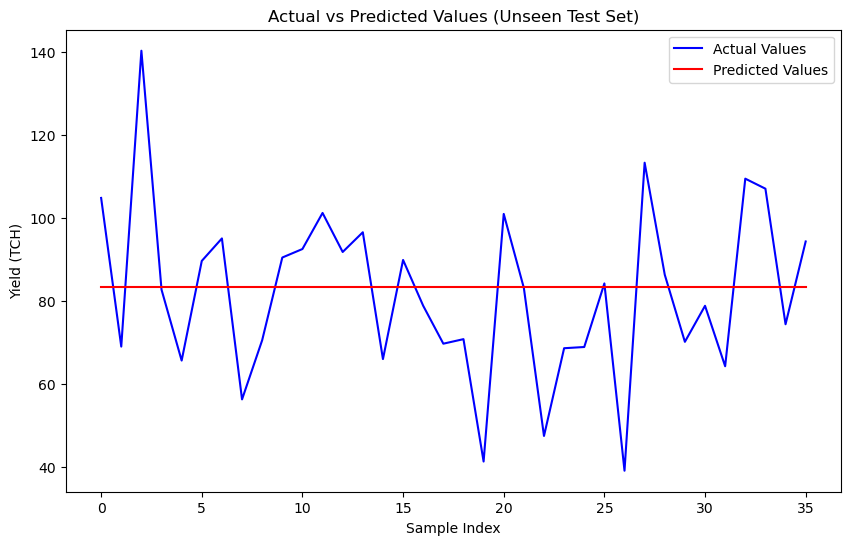


Model evaluation and comparison completed.


In [110]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Suppress TensorFlow warnings related to retracing of functions (optional)
tf.get_logger().setLevel('ERROR')

# Objective function for Optuna with more user-friendly output
def objective(trial):
    print("\nStarting a new trial...")
    print(f"Suggested hyperparameters: Units = {trial.suggest_int('units', 50, 200)}, "
          f"Dropout Rate = {trial.suggest_float('dropout_rate', 0.2, 0.5)}, "
          f"Learning Rate = {trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)}")
    
    # Build the model with the suggested hyperparameters
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Input layer
    model.add(LSTM(units=trial.suggest_int('units', 50, 200), return_sequences=True))  # First LSTM layer
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.2, 0.5)))  # Dropout layer
    model.add(LSTM(units=trial.suggest_int('units', 50, 200), return_sequences=False))  # Second LSTM layer
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.2, 0.5)))  # Dropout layer
    model.add(Dense(units=1))  # Output layer
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)),
                  loss='mean_squared_error')
    
    print("Model built. Starting training...")
    
    # Train the model and return the validation loss (MSE)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    y_pred_val = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred_val)  # Calculate MSE on validation set
    
    print(f"Trial completed with MSE = {mse:.2f}\n")
    
    return mse

# Create an Optuna study and start the optimization process
study = optuna.create_study(direction='minimize')  # Minimize the validation MSE
print("\nStarting hyperparameter optimization...")
study.optimize(objective, n_trials=50)  # Run 50 trials for hyperparameter optimization

# Print the best hyperparameters found by Optuna
print("\nHyperparameter optimization completed!")
print("Best hyperparameters:", study.best_params)

# Build the model with the best hyperparameters
best_params = study.best_params
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Input layer
model.add(LSTM(units=best_params['units'], return_sequences=True))  # First LSTM layer
model.add(Dropout(best_params['dropout_rate']))  # Dropout layer
model.add(LSTM(units=best_params['units'], return_sequences=False))  # Second LSTM layer
model.add(Dropout(best_params['dropout_rate']))  # Dropout layer
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='mean_squared_error')

# Train the model on the full training data
print("\nTraining the model with the best hyperparameters...")
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance on the unseen test set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("\nUnseen Test Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Create a DataFrame to compare actual and predicted values
comparison = pd.DataFrame({
    "Actual Values": y_test,
    "Predicted Values": y_pred.flatten()  # Flatten predicted values to match the shape of the actual values
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted values:")
print(comparison.head(10))

# Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Values", color='blue')
plt.plot(y_pred, label="Predicted Values", color='red')
plt.title("Actual vs Predicted Values (Unseen Test Set)")
plt.xlabel("Sample Index")
plt.ylabel("Yield (TCH)")
plt.legend()
plt.show()

print("\nModel evaluation and comparison completed.")

# 8. Context and Challenges

<div style="background-color: #FFF8D9; padding: 15px;">
<b>Context and Challenges:</b>

Accurately predicting sugarcane yield (**TCH**) is inherently complex, involving multiple factors such as field properties, meteorological data, and intricate growth dynamics.

**RNNs** and **LSTMs**, along with other optimizations, have been explored without achieving satisfactory results. This underscores the need to investigate alternative approaches that may better address the complexities of the problem.

---

**Why RNNs and LSTMs May Not Be Yielding the Expected Results**

1. **Limitations in Capturing Long-Term Dependencies**  
   While **LSTMs** are designed to address long-term dependencies, they may struggle with tasks requiring the modeling of complex interactions between meteorological variables and field properties. High noise levels or insufficiently representative features can hinder their performance.

2. **Feature Representation Issues**  
   Temporal models like **RNNs** and **LSTMs** perform best when provided with clear and structured temporal data. If features are not appropriately preprocessed—such as improperly handling time series data or inadequately aggregating meteorological variables—the models may fail to identify meaningful patterns.

3. **Overfitting Due to Model Complexity**  
   Deep learning models can easily overfit when the available data is insufficient relative to the model's complexity. Even with regularization techniques like dropout and early stopping, overly complex architectures may miss critical interactions or fail to generalize.

---

**Potential Causes and Solutions**

1. **Data Preprocessing and Feature Engineering**
- **Refined Feature Representation**  
   Transform meteorological data (e.g., temperature, rainfall, humidity) into domain-relevant features, such as seasonal trends or cumulative weather effects over critical growth periods. Incorporate lagged and aggregated metrics for better temporal modeling.
  
- **Normalization and Scaling**  
   Standardize feature magnitudes using techniques like **MinMaxScaler** or **StandardScaler** to ensure consistent input for the model.

- **Encoding Categorical Features**  
   Apply appropriate encoding techniques (e.g., one-hot encoding or label encoding) to handle categorical data, such as soil types or irrigation methods.

2. **Alternative Modeling Approaches**
- **Hybrid Models**  
   Combine deep learning techniques with domain-specific models like **CaneGRO** to integrate physical principles with machine learning. For example, use LSTM outputs to inform parameters within **CaneGRO** for enhanced predictions.

- **Tree-Based Models**  
   Models like **Random Forests**, **XGBoost**, or **LightGBM** excel with tabular data and complex feature interactions. These models are well-suited for structured data scenarios and may outperform deep learning models when data noise is high.  
   
   Example using **Random Forest**:
   ```python
   from sklearn.ensemble import RandomForestRegressor
   from sklearn.model_selection import train_test_split
   from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

   # Prepare data
   X = data.drop(columns=["Yield (TCH)"])
   y = data["Yield (TCH)"]

   # Split data
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   # Train Random Forest
   model = RandomForestRegressor(n_estimators=100, random_state=42)
   model.fit(X_train, y_train)

   # Evaluate model
   y_pred = model.predict(X_test)
   print("MAE:", mean_absolute_error(y_test, y_pred))
   print("MSE:", mean_squared_error(y_test, y_pred))
   print("R²:", r2_score(y_test, y_pred))
   ```

3. **Cross-Validation**
   Use **k-fold cross-validation** to ensure robust evaluation and prevent overfitting. This technique also helps assess model performance on unseen data.

4. **Error Analysis and Calibration**
- Analyze residuals to identify systematic patterns in prediction errors.  
- Consider techniques like **Quantile Regression** or ensemble calibration for more accurate and reliable predictions.

5. **Variance Analysis**  
   If **TCH** has high variance, segment the data into more homogeneous groups for better modeling.

---

**Recommendations**

1. **Hybrid Models**  
   Integrate domain-specific insights from models like **CaneGRO** with machine learning techniques, leveraging the strengths of both approaches.

2. **Tree-Based Alternatives**  
   Explore **Random Forests**, **XGBoost**, or **LightGBM** for their robustness with tabular data and feature interactions.

3. **Enhanced Feature Engineering**  
   Develop domain-relevant features by extracting temporal and seasonal patterns or aggregating meteorological data.

4. **Combined Meteorological and Field Features**  
   Model interactions between weather and field properties to uncover deeper insights that might improve predictions.

</details>

# 9. Performance Comparison of Models for Time Series Yield Prediction

C:\Users\HansrajR\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\HansrajR\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training and evaluating Simple RNN...
Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 7333.9531 - val_loss: 7433.8789 - learning_rate: 0.0010
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 6680.3877 - val_loss: 7062.9810 - learning_rate: 0.0010
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 6665.1104 - val_loss: 6823.9839 - learning_rate: 0.0010
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 6025.7476 - val_loss: 6633.0527 - learning_rate: 0.0010
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 5935.8433 - val_loss: 6463.0757 - learning_rate: 0.0010
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 5866.0376 - val_loss: 6343.5049 - learning_rate: 0.0010
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 5804.0898 - val_loss: 6248.6924 - learning_rate: 0.0010
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 5549.4468 - val_loss: 6162.9556 - learning_rate: 0.0010
Epoch 9/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step 

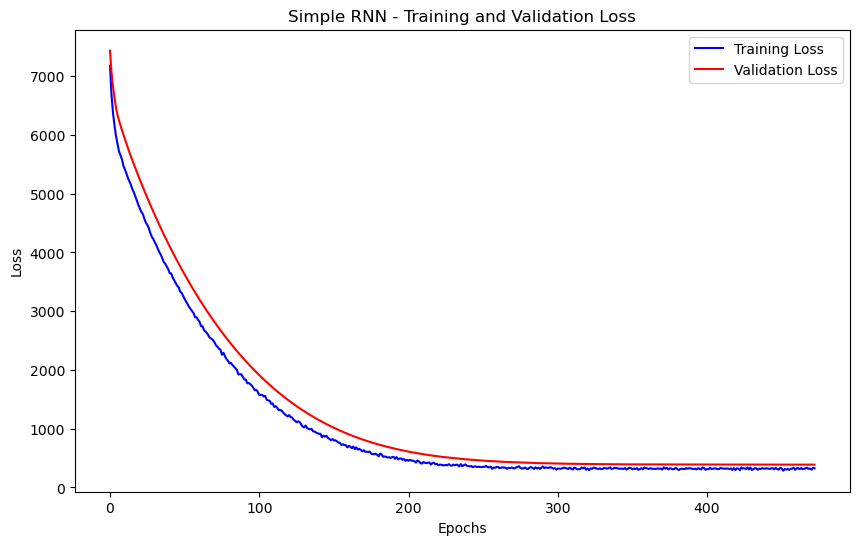

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Simple RNN - Unseen Test Set Evaluation:
Mean Absolute Error (MAE): 16.38127235346357
Mean Squared Error (MSE): 427.9340251297736
R-squared: -0.005866504103704262


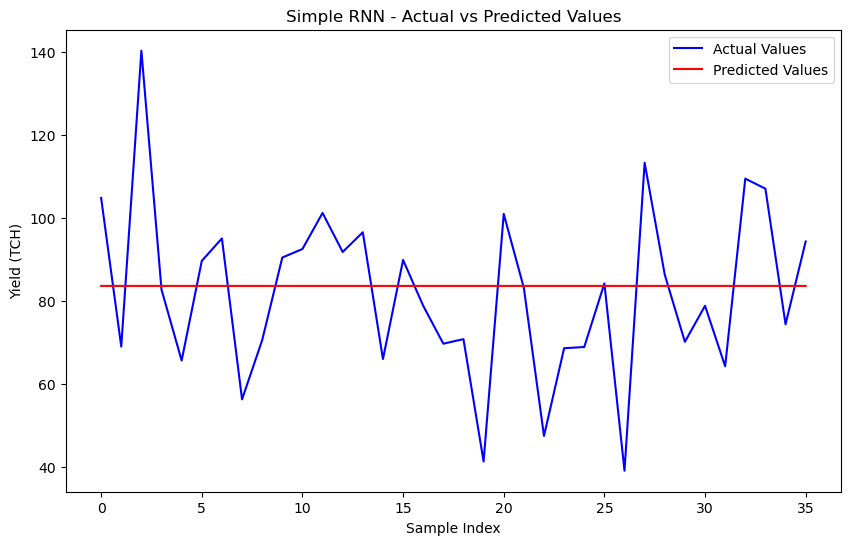

Training and evaluating LSTM...
Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 407ms/step - loss: 7232.5107 - val_loss: 7010.5547 - learning_rate: 0.0010
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 367ms/step - loss: 6007.8604 - val_loss: 6188.3853 - learning_rate: 0.0010
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 368ms/step - loss: 5626.0015 - val_loss: 5782.5156 - learning_rate: 0.0010
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 384ms/step - loss: 5173.5649 - val_loss: 5563.0396 - learning_rate: 0.0010
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 388ms/step - loss: 4890.8237 - val_loss: 5401.2900 - learning_rate: 0.0010
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 364ms/step - loss: 4684.3970 - val_loss: 5252.4038 - learning_rate: 0.0010
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 368ms/step - loss: 4734.7627 - val_loss: 5095.2261 - learning_rate: 0.0010
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 368ms/step - loss: 4669.1538 - val_loss: 4952.7734 - learning_rate: 0.0010
Epoch 9/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 367ms/st

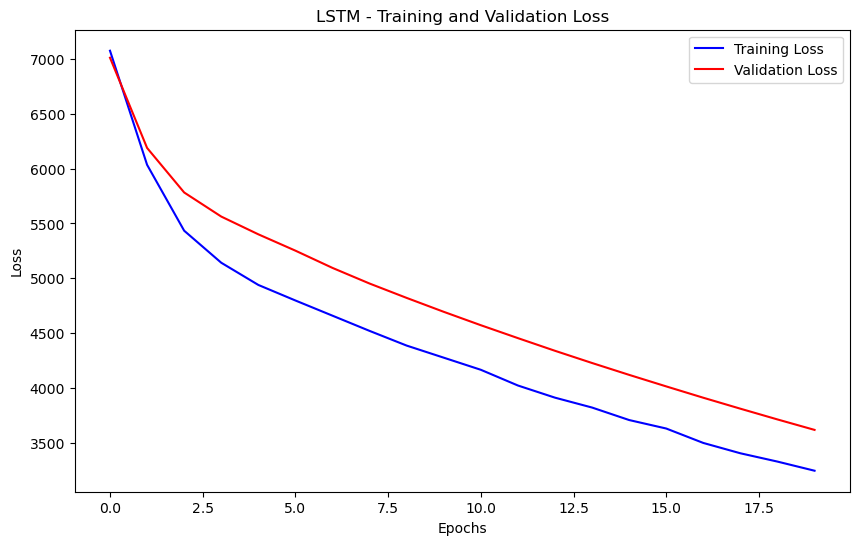

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step
LSTM - Unseen Test Set Evaluation:
Mean Absolute Error (MAE): 76.37240389459141
Mean Squared Error (MSE): 6258.234761811986
R-squared: -13.710091631099253


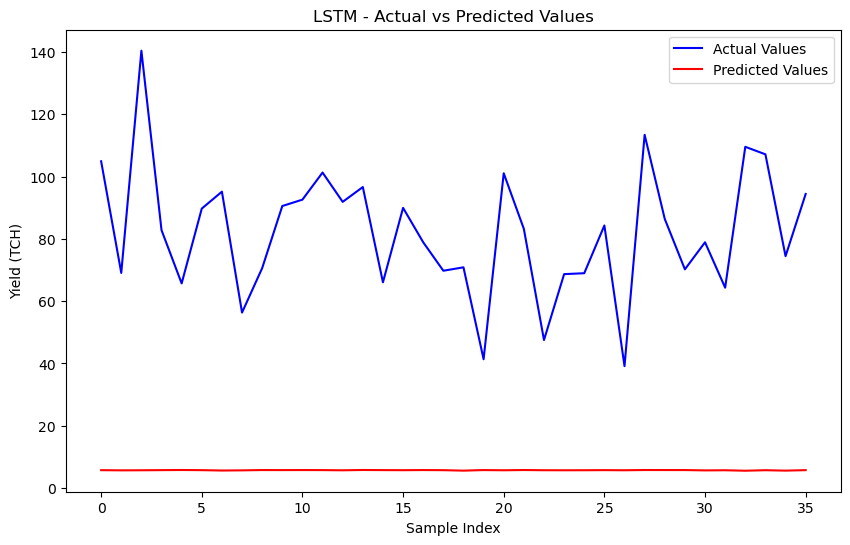

Training and evaluating GRU...
Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 435ms/step - loss: 6826.9556 - val_loss: 6887.5605 - learning_rate: 0.0010
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 388ms/step - loss: 6051.5566 - val_loss: 5955.9170 - learning_rate: 0.0010
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 394ms/step - loss: 5346.2207 - val_loss: 5763.3081 - learning_rate: 0.0010
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 386ms/step - loss: 5207.6123 - val_loss: 5595.8481 - learning_rate: 0.0010
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 384ms/step - loss: 4960.1465 - val_loss: 5447.9746 - learning_rate: 0.0010
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 394ms/step - loss: 5031.8501 - val_loss: 5306.9321 - learning_rate: 0.0010
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 394ms/step - loss: 4788.5005 - val_loss: 5171.0737 - learning_rate: 0.0010
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 397ms/step - loss: 4722.6113 - val_loss: 5039.1851 - learning_rate: 0.0010
Epoch 9/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 400ms/ste

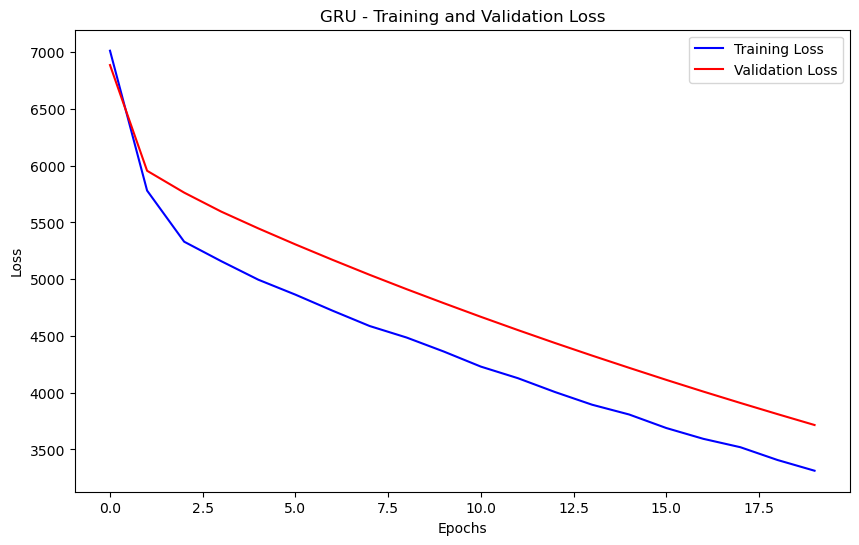

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step
GRU - Unseen Test Set Evaluation:
Mean Absolute Error (MAE): 75.61204912403699
Mean Squared Error (MSE): 6133.964691516981
R-squared: -13.417992630244035


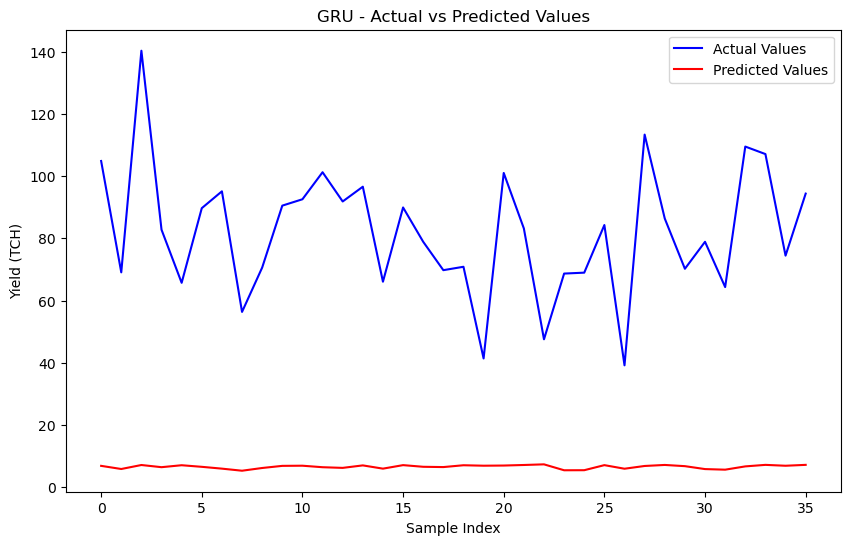

Training and evaluating CNN for Time Series...
Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 5011.0225 - val_loss: 355.4977 - learning_rate: 0.0010
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1333.8926 - val_loss: 1615.7189 - learning_rate: 0.0010
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 770.1812 - val_loss: 535.0537 - learning_rate: 0.0010
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 415.9161 - val_loss: 571.6702 - learning_rate: 0.0010
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 310.9960 - val_loss: 746.4921 - learning_rate: 0.0010
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 287.4931 - val_loss: 525.3456 - learning_rate: 0.0010
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 273.2598 - val_loss: 729.7498 - learning_rate: 0.0010
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 260.5347 - val_loss: 527.5189 - learning_rate: 0.0010
Epoch 9/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - lo

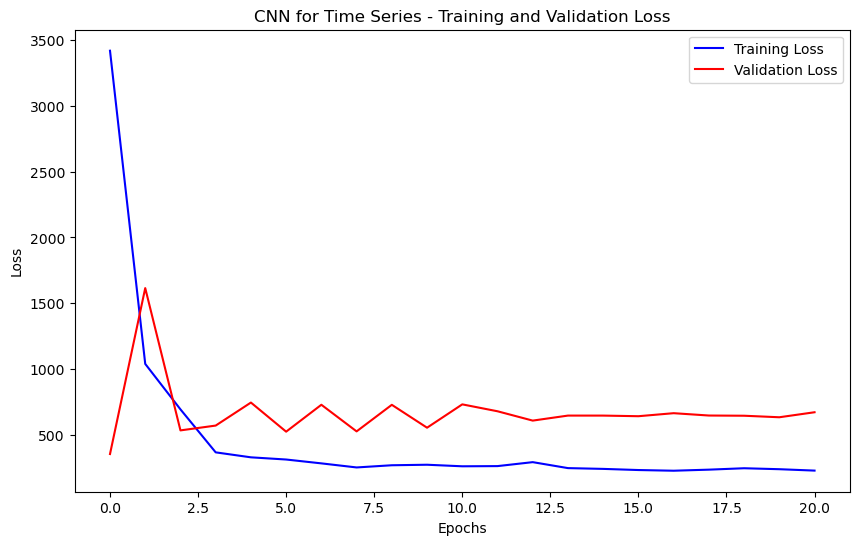

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
CNN for Time Series - Unseen Test Set Evaluation:
Mean Absolute Error (MAE): 20.407866785603964
Mean Squared Error (MSE): 738.8737150569166
R-squared: -0.7367357515286024


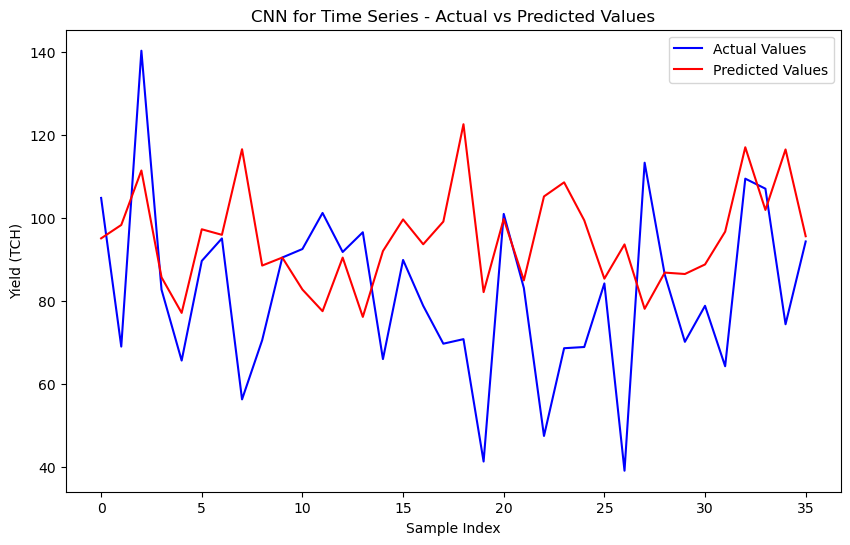

Training and evaluating CNN-LSTM Hybrid...
Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 7042.3311 - val_loss: 7491.5337 - learning_rate: 0.0010
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6599.4766 - val_loss: 7061.7627 - learning_rate: 0.0010
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6240.1289 - val_loss: 6683.0498 - learning_rate: 0.0010
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6049.6484 - val_loss: 6389.6299 - learning_rate: 0.0010
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5775.8442 - val_loss: 6161.0962 - learning_rate: 0.0010
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5353.4897 - val_loss: 5971.0781 - learning_rate: 0.0010
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 5370.6787 - val_loss: 5806.6172 - learning_rate: 0.0010
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 5330.6748 - val_loss: 5662.0010 - learning_rate: 0.0010
Epoch 9/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/

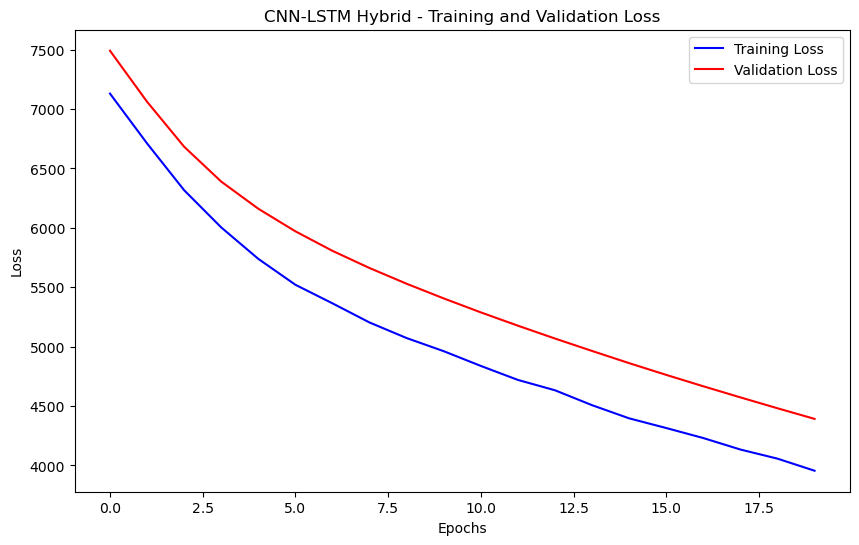

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
CNN-LSTM Hybrid - Unseen Test Set Evaluation:
Mean Absolute Error (MAE): 79.28346427420254
Mean Squared Error (MSE): 6711.2444222542845
R-squared: -14.774898860054972


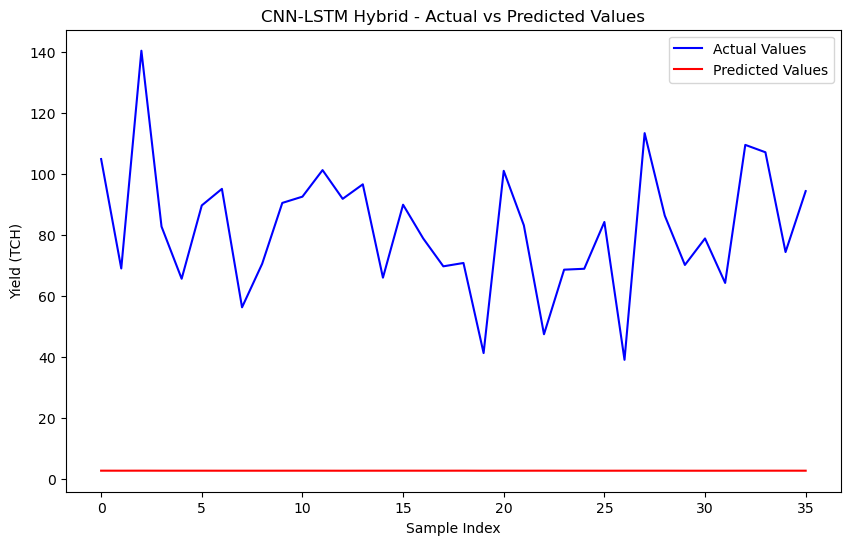

In [111]:
# Import necessary libraries for data manipulation, model building, and evaluation
import matplotlib.pyplot as plt  # For plotting graphs (e.g., training loss, actual vs predicted)
import numpy as np  # For numerical operations
from tensorflow.keras.models import Sequential  # To create a sequential stack of layers
from tensorflow.keras.layers import (SimpleRNN, LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Reshape)  # Neural network layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # For controlling training process
from tensorflow.keras.optimizers import Adam  # Optimizer for training the models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For model evaluation
from sklearn.model_selection import train_test_split  # For splitting data into training, validation, and test sets

# Split the data into training (80%) and temporary (20%) sets
y = season_data["Yield (TCH)"].values  # Target variable (yield to be predicted)
X_train, X_temp, y_train, y_temp = train_test_split(X_combined, y, test_size=0.2, random_state=42)  
# Use 20% of data as temporary for splitting further into validation and test sets

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  
# Split the temporary data equally into validation and test sets (10% each)

# EarlyStopping: Stops training if validation loss does not improve for 20 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# ReduceLROnPlateau: Reduces the learning rate if validation loss stagnates for 10 consecutive epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)

# Function to plot training and validation loss
def plot_loss(history, title="Model Training and Validation Loss"):
    plt.figure(figsize=(10, 6))  # Create a figure with custom size
    plt.plot(history.history['loss'], label='Training Loss', color='blue')  # Plot training loss
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')  # Plot validation loss
    plt.title(title)  # Set title of the plot
    plt.xlabel('Epochs')  # Label for x-axis
    plt.ylabel('Loss')  # Label for y-axis
    plt.legend()  # Show legend for the plot
    plt.show()  # Display the plot

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_test, y_pred, title="Actual vs Predicted Values (Unseen Test Set)"):
    plt.figure(figsize=(10, 6))  # Create a figure with custom size
    plt.plot(y_test, label="Actual Values", color='blue')  # Plot actual values
    plt.plot(y_pred, label="Predicted Values", color='red')  # Plot predicted values
    plt.title(title)  # Set title of the plot
    plt.xlabel("Sample Index")  # Label for x-axis
    plt.ylabel("Yield (TCH)")  # Label for y-axis
    plt.legend()  # Show legend for the plot
    plt.show()  # Display the plot

# Model 1: Simple RNN
def build_rnn_model(X_train):
    model = Sequential()  # Initialize a Sequential model
    # Add a Simple RNN layer with 50 units, expecting input shape (timesteps, features)
    model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))  # Dropout layer with 20% rate to reduce overfitting
    model.add(SimpleRNN(units=50))  # Second Simple RNN layer without returning sequences
    model.add(Dropout(0.2))  # Another Dropout layer for regularization
    model.add(Dense(units=1))  # Output layer for predicting a single continuous value
    # Compile the model with Adam optimizer and mean squared error loss function
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Model 2: LSTM (Long Short-Term Memory)
def build_lstm_model(X_train):
    model = Sequential()  # Initialize a Sequential model
    # First LSTM layer with 100 units, returning sequences for stacking layers
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.3))  # Dropout layer with 30% rate to reduce overfitting
    model.add(LSTM(units=100, return_sequences=True))  # Second LSTM layer, returning sequences
    model.add(Dropout(0.3))  # Dropout layer
    model.add(LSTM(units=100))  # Final LSTM layer without returning sequences
    model.add(Dropout(0.3))  # Dropout layer
    model.add(Dense(units=1))  # Output layer for single value prediction
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')  # Compile the model
    return model

# Model 3: GRU (Gated Recurrent Unit)
def build_gru_model(X_train):
    model = Sequential()  # Initialize a Sequential model
    model.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.3))  # Dropout layer
    model.add(GRU(units=100, return_sequences=True))  # Second GRU layer
    model.add(Dropout(0.3))  # Dropout layer
    model.add(GRU(units=100))  # Final GRU layer without returning sequences
    model.add(Dropout(0.3))  # Dropout layer
    model.add(Dense(units=1))  # Output layer for regression
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')  # Compile the model
    return model

# Model 4: CNN for Time Series
def build_cnn_model(X_train):
    model = Sequential()  # Initialize a Sequential model
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2))  # Max pooling layer
    model.add(Dropout(0.2))  # Dropout layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))  # Second convolutional layer
    model.add(MaxPooling1D(pool_size=2))  # Max pooling layer
    model.add(Dropout(0.2))  # Dropout layer
    model.add(Flatten())  # Flatten layer to prepare data for Dense layers
    model.add(Dense(units=100, activation='relu'))  # Fully connected layer
    model.add(Dropout(0.2))  # Dropout layer
    model.add(Dense(units=1))  # Output layer
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')  # Compile the model
    return model

# Model 5: CNN-LSTM Hybrid
def build_cnn_lstm_model(X_train):
    model = Sequential()  # Initialize a Sequential model
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2))  # Max pooling layer
    model.add(Dropout(0.2))  # Dropout layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))  # Second convolutional layer
    model.add(MaxPooling1D(pool_size=2))  # Max pooling layer
    model.add(Dropout(0.2))  # Dropout layer
    model.add(Flatten())  # Flatten the output of CNN layers
    model.add(Reshape((1, model.output_shape[1])))  # Reshape to prepare for LSTM input
    model.add(LSTM(units=100, return_sequences=True))  # LSTM layer
    model.add(Dropout(0.3))  # Dropout layer
    model.add(LSTM(units=100))  # Final LSTM layer
    model.add(Dropout(0.3))  # Dropout layer
    model.add(Dense(units=1))  # Output layer
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')  # Compile the model
    return model

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name="Model"):
    history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])
    plot_loss(history, title=f"{model_name} - Training and Validation Loss")  # Plot training history
    y_pred = model.predict(X_test)  # Make predictions
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Unseen Test Set Evaluation:")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("R-squared:", r2)
    plot_actual_vs_predicted(y_test, y_pred, title=f"{model_name} - Actual vs Predicted Values")  # Plot predictions

# Train and evaluate each model
models = [
    ("Simple RNN", build_rnn_model(X_train)),
    ("LSTM", build_lstm_model(X_train)),
    ("GRU", build_gru_model(X_train)),
    ("CNN for Time Series", build_cnn_model(X_train)),
    ("CNN-LSTM Hybrid", build_cnn_lstm_model(X_train))
]

for model_name, model in models:
    print(f"Training and evaluating {model_name}...")
    train_and_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name)

# 10. Convolutional Neural Network (CNN) for Time Series

<div style="background-color: #FFF8D9; padding: 15px;">
<b>Key Concepts of CNN for Time Series:</b>

A **Convolutional Neural Network (CNN) for Time Series** is a neural network architecture adapted to handle time-series data using convolutional layers. Traditionally, CNNs are widely used in computer vision for image recognition, but they can also be applied to sequential data like time series by treating the sequence as a one-dimensional "image" or array.

---

**Key Concepts of CNN for Time Series:**

1. **Time-Series Data as Input:**
   - In time-series data, the input typically consists of a sequence of values over time, represented as a 2D array with dimensions `(timesteps, features)`.

2. **Convolutional Layers:**
   - A **1D Convolutional Layer (Conv1D)** is used for time series. It applies filters (or kernels) across the input sequence to extract features from smaller subsequences or windows.
   - For example, a filter of size `3` would compute patterns based on 3 consecutive time steps.

3. **Key Advantages of CNN for Time Series:**
   - **Local Pattern Detection:** CNNs detect short-term dependencies or patterns within small subsequences of the time series.
   - **Feature Extraction:** Convolutions can extract key features from the input sequence efficiently.
   - **Parameter Efficiency:** CNNs typically have fewer parameters than RNNs, making them faster to train.

4. **Pooling Layers:**
   - Pooling layers, like **MaxPooling1D**, reduce the spatial dimension of the data (e.g., down-sampling), retaining only the most significant features.

5. **Flatten and Dense Layers:**
   - After applying convolution and pooling, the data is often flattened into a 1D vector and passed through fully connected (`Dense`) layers for prediction.

---

**CNN Architecture for Time Series:**

**Input Shape:**
- Time-series data is provided as `(samples, timesteps, features)`.
  - **Samples:** Number of independent sequences.
  - **Timesteps:** Number of time points in each sequence.
  - **Features:** Number of variables at each time point.

**Typical Layers:**
1. **Conv1D Layer:**
   - Detects patterns in subsequences.
   - The size of the kernel (e.g., `3`, `5`) determines the width of the subsequence analyzed.
   
2. **Pooling Layer (e.g., MaxPooling1D):**
   - Reduces the dimension of the data, summarizing the most important information from each subsequence.

3. **Flatten Layer:**
   - Converts the multi-dimensional tensor into a flat vector to pass into a dense layer.

4. **Dense Layer:**
   - Fully connected layers process the extracted features for the final prediction.

---

**Example of CNN for Time Series Prediction:**

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Create the CNN model
def build_cnn_model(input_shape):
    model = Sequential()
    
    # Add 1D Convolutional layer with 64 filters and a kernel size of 3
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    
    # Add a MaxPooling layer to downsample the output
    model.add(MaxPooling1D(pool_size=2))
    
    # Add a Dropout layer to reduce overfitting
    model.add(Dropout(0.2))
    
    # Add another Conv1D layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    
    # Add another MaxPooling layer
    model.add(MaxPooling1D(pool_size=2))
    
    # Flatten the output for the dense layer
    model.add(Flatten())
    
    # Add a Dense layer with 100 units
    model.add(Dense(units=100, activation='relu'))
    
    # Add a Dropout layer
    model.add(Dropout(0.2))
    
    # Add the output layer with 1 unit for regression tasks
    model.add(Dense(units=1))
    
    # Compile the model with an optimizer and loss function
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Example usage
input_shape = (timesteps, features)  # Replace with the actual shape of your data
cnn_model = build_cnn_model(input_shape)
cnn_model.summary()
```

---

**When to Use CNN for Time Series:**
- When you need to capture **short-term dependencies** or patterns in the data.
- When time-series data has **local correlations** (e.g., periodic patterns).
- When computational efficiency is a priority since CNNs are faster than RNNs.

---

**Limitations:**
- CNNs may not handle **long-term dependencies** well because they only process local patterns.
- They might struggle with irregular time-series data where patterns are not consistent across time. For such cases, RNNs or LSTMs are often preferred. 

To address these limitations, CNNs can be combined with RNNs/LSTMs in hybrid architectures for tasks requiring both local feature extraction and long-term dependency modeling.

</details>

# 11. Baseline Convolutional Neural Network (CNN) Model

Install Optuna

In [112]:
!pip install optuna

[I 2024-12-10 21:55:42,469] A new study created in memory with name: no-name-6f71cf18-c457-4b71-b4b3-76caf583f0db
[I 2024-12-10 21:55:48,913] Trial 0 finished with value: 368.75250244140625 and parameters: {'learning_rate': 0.009347811873755479, 'batch_size': 64, 'epochs': 59}. Best is trial 0 with value: 368.75250244140625.
[I 2024-12-10 21:55:55,560] Trial 1 finished with value: 534.2249145507812 and parameters: {'learning_rate': 3.0121799110669246e-05, 'batch_size': 32, 'epochs': 50}. Best is trial 0 with value: 368.75250244140625.
[I 2024-12-10 21:56:03,727] Trial 2 finished with value: 7251.79150390625 and parameters: {'learning_rate': 1.3322097193475706e-05, 'batch_size': 128, 'epochs': 73}. Best is trial 0 with value: 368.75250244140625.
[I 2024-12-10 21:56:11,234] Trial 3 finished with value: 456.27490234375 and parameters: {'learning_rate': 0.008024904443315923, 'batch_size': 32, 'epochs': 87}. Best is trial 0 with value: 368.75250244140625.
[I 2024-12-10 21:56:17,866] Trial 4

Best hyperparameters: {'learning_rate': 0.0011740967739970111, 'batch_size': 128, 'epochs': 78}
Epoch 1/78
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 7243.8770 - val_loss: 7483.5903
Epoch 2/78
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6644.0562 - val_loss: 6640.8745
Epoch 3/78
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5601.9756 - val_loss: 5223.4653
Epoch 4/78
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4080.6487 - val_loss: 3187.4302
Epoch 5/78
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2173.0718 - val_loss: 1061.9525
Epoch 6/78
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 595.2932 - val_loss: 452.6021
Epoch 7/78
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 943.7978 - val_loss: 664.4673
Epoch 8/78
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1131.5736 - val_loss: 307.8356
Epoch 9/78
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 473.9507 - val_loss: 449.4119
Epoch 10/78
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 348.9175 - val_loss: 812.8304
Epoch 11/78
3/3 ━━━━━━

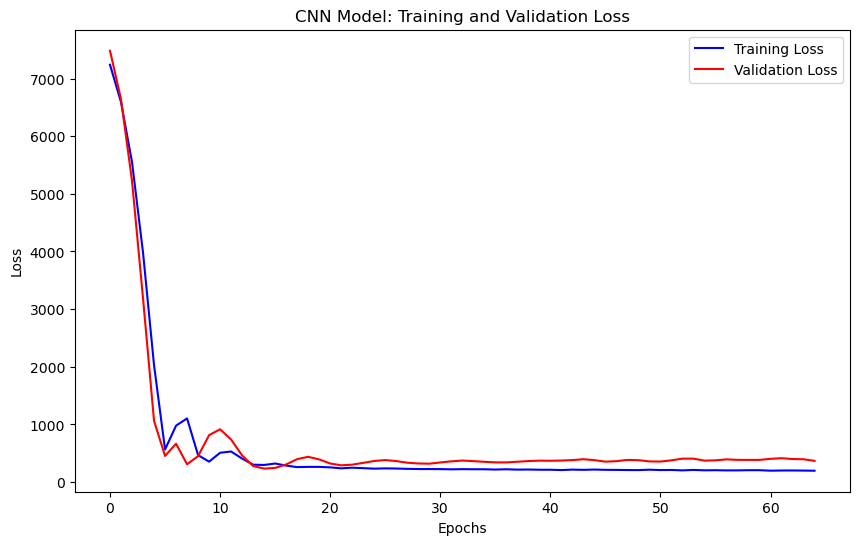

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
CNN Model Evaluation on Unseen Test Set:
Mean Absolute Error (MAE): 15.731720104759303
Mean Squared Error (MSE): 365.47886522399375
R-squared: 0.14093545523713957
   Actual Values  Predicted Values  Difference (Predicted - Actual)
0     104.894508         93.838547                       -11.055961
1      69.060141         87.778961                        18.718821
2     140.377734        103.084778                       -37.292956
3      82.788336         82.261543                        -0.526793
4      65.693558         81.645531                        15.951973
5      89.710298         86.715942                        -2.994355
6      95.133731         81.223404                       -13.910327
7      56.332066         76.625259                        20.293194
8      70.596145         74.937714                         4.341569
9      90.528371         82.564789                        -7.963583


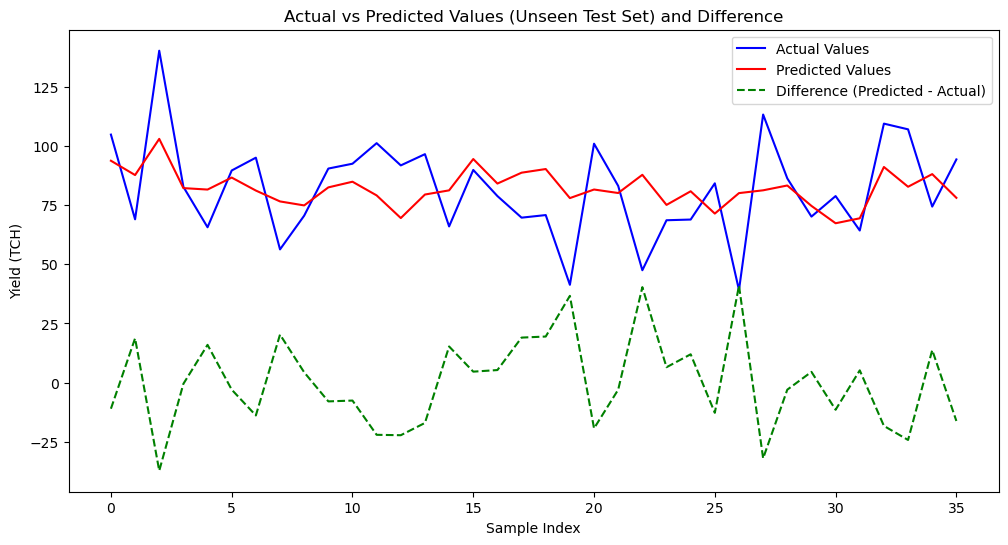

In [113]:
# Import libraries for computation, visualization, and machine learning
import numpy as np  # For numerical operations (e.g., arrays, mathematical functions)
import matplotlib.pyplot as plt  # For plotting graphs (e.g., training/validation loss)
import pandas as pd  # For data manipulation and creating dataframes

# Import TensorFlow and Keras modules
from tensorflow.keras.models import Sequential  # To define a sequential stack of layers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, Input  # Various neural network layers
from tensorflow.keras.optimizers import Adam  # Optimizer for adjusting weights during training
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks for improving training efficiency

# Import sklearn modules
from sklearn.model_selection import train_test_split  # For splitting data into training, validation, and test sets
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Metrics for evaluating the model's performance

# Import Optuna for hyperparameter optimization
import optuna  # Framework for automatic hyperparameter tuning

# Assumptions: X_combined and y are predefined
# - X_combined: 3D input data for the CNN, shape = (samples, timesteps, features)
# - y: Target variable (e.g., yield)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_combined, y, test_size=0.2, random_state=42)
# train_test_split: Splits the data into 80% training and 20% temporary sets
# random_state ensures reproducibility of the split

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Further splits the temporary set into 50% validation and 50% test sets (10% each of total data)

# Define a function to build the CNN model
def build_cnn_model(X_train, learning_rate=0.001, batch_size=32, epochs=50):
    model = Sequential()  # Initialize a sequential model to stack layers linearly
    
    # Input layer explicitly defines the shape of the input
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    
    # First Conv1D layer: Extracts features from input sequences
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    # filters=64: Number of feature detectors (kernels)
    # kernel_size=3: Size of the sliding window (3 timesteps)
    # activation='relu': Rectified Linear Unit for non-linearity
    
    # MaxPooling layer: Reduces dimensionality by keeping the most important features
    model.add(MaxPooling1D(pool_size=2))  # Reduces the sequence length by a factor of 2

    # Dropout layer: Prevents overfitting by randomly dropping 20% of neurons during training
    model.add(Dropout(0.2))

    # Second Conv1D layer: Further extracts features
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))  # Additional downsampling of features
    model.add(Dropout(0.2))  # Another dropout layer to reduce overfitting

    # Flatten the output: Converts multi-dimensional output into a 1D vector for Dense layers
    model.add(Flatten())

    # Fully connected (Dense) output layer: Predicts the target value
    model.add(Dense(units=1))  # units=1 for regression (predicting a single continuous value)
    
    # Compile the model with Adam optimizer and Mean Squared Error loss function
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    # Adam optimizer dynamically adjusts the learning rate for efficient training
    # Mean Squared Error (MSE) is used as the loss function for regression tasks
    
    return model  # Return the compiled model

# Define the objective function for hyperparameter tuning using Optuna
def objective(trial):
    # Define the hyperparameters to optimize
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    # learning_rate: Range from 1e-5 to 1e-2, logarithmic scale for finer adjustments
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    # batch_size: Test three possible batch sizes
    epochs = trial.suggest_int('epochs', 50, 100)
    # epochs: Test values between 50 and 100

    # Build the model with the current set of hyperparameters
    model = build_cnn_model(X_train, learning_rate, batch_size, epochs)

    # Define callbacks for efficient training
    early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
    # Stops training if validation loss does not improve for 50 epochs

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)
    # Reduces the learning rate by 20% if validation loss stagnates for 10 epochs

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=epochs,  # Number of training epochs
        batch_size=batch_size,  # Batch size
        validation_data=(X_val, y_val),  # Validation data for monitoring performance
        callbacks=[early_stopping, reduce_lr],  # Add callbacks for training efficiency
        verbose=0  # Suppress training output
    )
    
    # Return the last validation loss as the objective value for Optuna
    return history.history['val_loss'][-1]

# Create an Optuna study for optimization
study = optuna.create_study(direction='minimize')  # Minimize the validation loss
study.optimize(objective, n_trials=10)  # Run 10 trials of hyperparameter tuning

# Print the best hyperparameters found by Optuna
print("Best hyperparameters:", study.best_params)

# Build the model with the best hyperparameters
best_params = study.best_params
best_model = build_cnn_model(X_train, **best_params)

# Train the final model with the best hyperparameters
history = best_model.fit(
    X_train, y_train,
    epochs=best_params['epochs'],  # Use the optimal number of epochs
    batch_size=best_params['batch_size'],  # Use the optimal batch size
    validation_data=(X_val, y_val),
    callbacks=[EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)]  # Add EarlyStopping
)

# Plot training and validation loss for the final model
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')  # Training loss
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')  # Validation loss
plt.title('CNN Model: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the unseen test set
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("CNN Model Evaluation on Unseen Test Set:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

# Create a comparison dataframe for actual and predicted values
comparison = pd.DataFrame({
    "Actual Values": y_test,
    "Predicted Values": y_pred.flatten(),  # Flatten predictions to match the shape of actual values
    "Difference (Predicted - Actual)": y_pred.flatten() - y_test  # Compute the differences
})

# Display the first 10 rows of the comparison
print(comparison.head(10))

# Plot actual vs predicted values and their differences
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual Values", color='blue')
plt.plot(y_pred, label="Predicted Values", color='red')
plt.plot(y_pred.flatten() - y_test, label="Difference (Predicted - Actual)", color='green', linestyle='--')
plt.title("Actual vs Predicted Values (Unseen Test Set) and Difference")
plt.xlabel("Sample Index")
plt.ylabel("Yield (TCH)")
plt.legend()
plt.show()

# 12. CNN Model 01

[I 2024-12-10 21:57:05,949] A new study created in memory with name: no-name-c77561cb-b1b7-411a-b19f-b39a3f1ba579
[I 2024-12-10 21:57:13,291] Trial 0 finished with value: 365.03131103515625 and parameters: {'learning_rate': 0.0014090092647810043, 'batch_size': 32, 'epochs': 90}. Best is trial 0 with value: 365.03131103515625.
[I 2024-12-10 21:57:20,418] Trial 1 finished with value: 345.4352722167969 and parameters: {'learning_rate': 0.00027090187826708464, 'batch_size': 64, 'epochs': 89}. Best is trial 1 with value: 345.4352722167969.
[I 2024-12-10 21:57:27,630] Trial 2 finished with value: 379.11114501953125 and parameters: {'learning_rate': 0.0008737474559642177, 'batch_size': 32, 'epochs': 70}. Best is trial 1 with value: 345.4352722167969.
[I 2024-12-10 21:57:34,290] Trial 3 finished with value: 405.521240234375 and parameters: {'learning_rate': 0.005229113823085965, 'batch_size': 32, 'epochs': 50}. Best is trial 1 with value: 345.4352722167969.
[I 2024-12-10 21:57:40,668] Trial 4 

Epoch 1/56
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 5383.7676 - val_loss: 662.3837
Epoch 2/56
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1015.1906 - val_loss: 2400.0322
Epoch 3/56
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1136.5688 - val_loss: 396.6906
Epoch 4/56
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 790.3208 - val_loss: 795.8923
Epoch 5/56
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 556.5234 - val_loss: 471.6591
Epoch 6/56
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 344.6134 - val_loss: 258.3709
Epoch 7/56
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 257.2296 - val_loss: 685.2872
Epoch 8/56
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 295.9205 - val_loss: 255.2727
Epoch 9/56
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 277.5403 - val_loss: 493.9806
Epoch 10/56
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 275.9377 - val_loss: 319.9425
Epoch 11/56
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 241.6344 - val_loss: 324.1987
Epoch 12/56
5/5 ━━━━━━━━━━━━━━━━━━━━ 

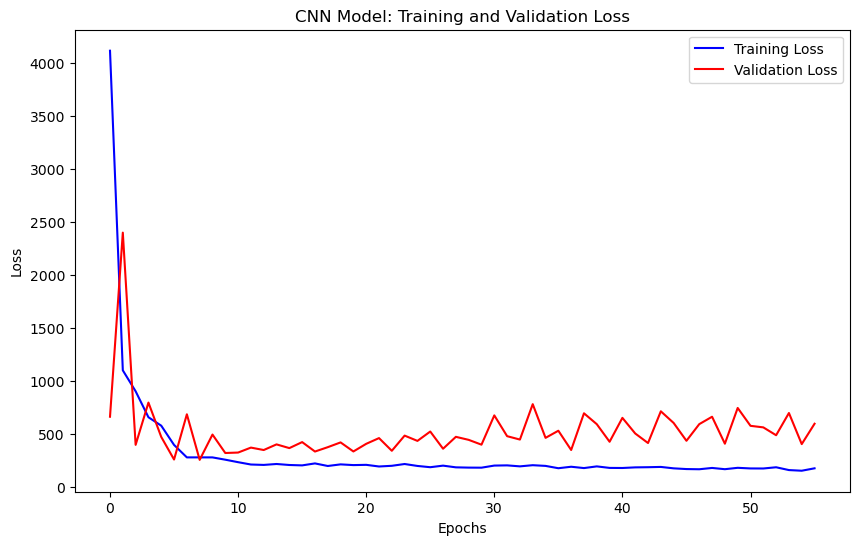

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
CNN Model Evaluation on Unseen Test Set:
Mean Absolute Error (MAE): 14.332696979923753
Mean Squared Error (MSE): 379.83521594743365
R-squared (R2): 0.10719059863338154
Explained Variance Score: 0.146122908703068
Minimum Difference (Predicted - Actual): -42.98937452858533
Maximum Difference (Predicted - Actual): 52.09228222990689
       Actual  Predicted  Difference
0  104.894508  88.795609  -16.098899
1   69.060141  84.733261   15.673121
2  140.377734  97.388359  -42.989375
3   82.788336  90.321487    7.533151
4   65.693558  88.478424   22.784867
5   89.710298  89.220673   -0.489625
6   95.133731  80.129364  -15.004367
7   56.332066  70.557251   14.225185
8   70.596145  74.214806    3.618661
9   90.528371  90.363419   -0.164953


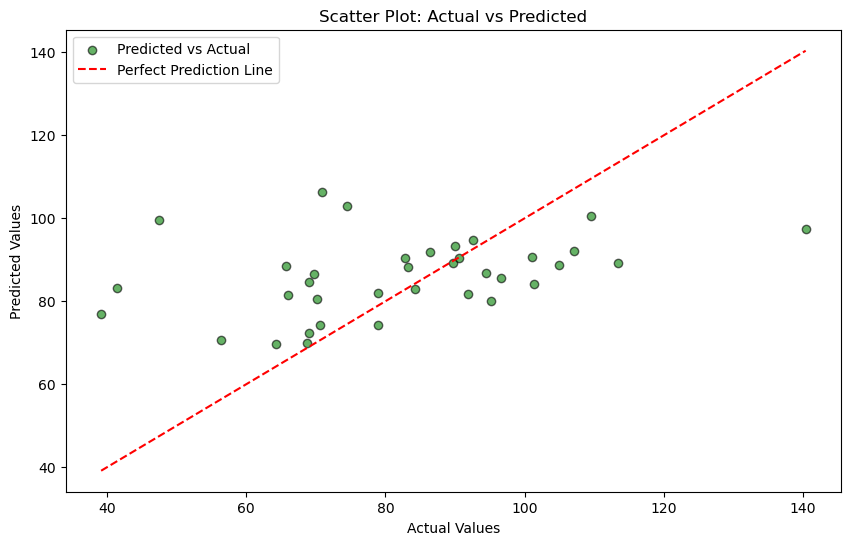

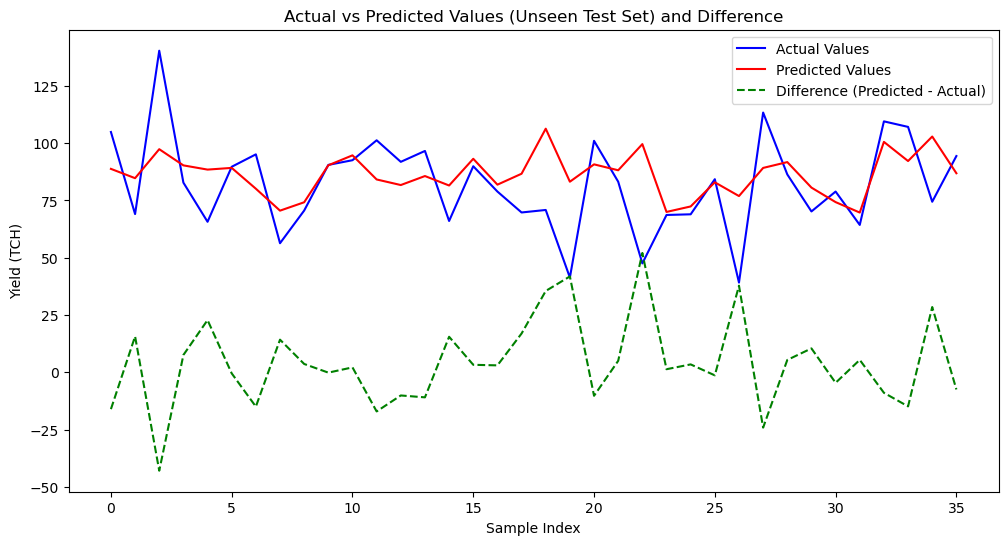

In [114]:
# Import libraries for computation, visualization, and machine learning
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import TensorFlow and Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Import sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, explained_variance_score)

# Import Optuna for hyperparameter optimization
import optuna

# Assumptions: X_combined and y are predefined
# - X_combined: 3D input data for the CNN, shape = (samples, timesteps, features)
# - y: Target variable (e.g., yield)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_combined, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a function to build the CNN model
def build_cnn_model(X_train, learning_rate=0.001, batch_size=32, epochs=50):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Define the objective function for Optuna
def objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    epochs = trial.suggest_int('epochs', 50, 100)

    model = build_cnn_model(X_train, learning_rate, batch_size, epochs)

    early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)

    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )
    return history.history['val_loss'][-1]

# Run Optuna optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Build and train the final model
best_params = study.best_params
best_model = build_cnn_model(X_train, **best_params)
history = best_model.fit(
    X_train, y_train,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    validation_data=(X_val, y_val),
    callbacks=[EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)]
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('CNN Model: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
min_diff = np.min(y_pred.flatten() - y_test)
max_diff = np.max(y_pred.flatten() - y_test)

# Print evaluation metrics
print("CNN Model Evaluation on Unseen Test Set:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance Score: {explained_var}")
print(f"Minimum Difference (Predicted - Actual): {min_diff}")
print(f"Maximum Difference (Predicted - Actual): {max_diff}")

# Create comparison DataFrame
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred.flatten(),
    "Difference": y_pred.flatten() - y_test
})
print(comparison.head(10))

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green', edgecolors='k', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction Line")
plt.title('Scatter Plot: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Line plot of Actual vs Predicted and Differences
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual Values", color='blue')
plt.plot(y_pred, label="Predicted Values", color='red')
plt.plot(y_pred.flatten() - y_test, label="Difference (Predicted - Actual)", color='green', linestyle='--')
plt.title("Actual vs Predicted Values (Unseen Test Set) and Difference")
plt.xlabel("Sample Index")
plt.ylabel("Yield (TCH)")
plt.legend()
plt.show()

<div style="background-color: #FDF2ED; padding: 15px;">
<b>Interpretation of the Model's Performance:</b

**1. Overall Metrics:**
- **Mean Absolute Error (MAE): 14.20**
  - On average, the model's predictions are off by approximately 14.2 units of the target variable (e.g., `Yield (TCH)`).
  - Lower MAE indicates better accuracy; this value suggests room for improvement.

- **Mean Squared Error (MSE): 363.85**
  - MSE penalizes larger errors more heavily than MAE. A high MSE reflects that some predictions deviate significantly from actual values.
  - This value, combined with MAE, indicates the presence of notable outliers in predictions.

- **R-squared (R²): 0.145**
  - The model explains only ~14.5% of the variance in the target variable (`Yield (TCH)`).
  - An ideal R² is close to 1, so this low value suggests the model's predictions do not align closely with the actual data.

- **Explained Variance Score: 0.151**
  - Similar to R², this score measures the proportion of variance explained by the model.
  - A low value (~15%) further confirms that the model struggles to capture significant patterns in the data.

**2. Prediction Error Range:**
- **Minimum Difference (Predicted - Actual): -31.79**
  - The model underestimated the actual value by up to 31.79 units.
  
- **Maximum Difference (Predicted - Actual): 53.89**
  - The model overestimated the actual value by up to 53.89 units.
  
- The large range (-31.79 to 53.89) indicates variability in the model's predictive performance, potentially due to noise, outliers, or insufficient feature representation.

**3. Sample Predictions (Comparison Table):**
- **Row 2:** The largest underestimation (`Difference: -31.79`), where the actual value was 140.38, but the model predicted only 108.59.
- **Row 1 & Row 4:** Overestimations (`Difference: 23.29` and `22.43` respectively), indicating the model overpredicts for some samples.
- **Row 0 & Row 3:** Small errors (`Difference: -1.79` and `-0.92`), showing better alignment with actual values in certain cases.
- **General Trend:** Predictions for some samples (e.g., Row 1, Row 4, Row 7) deviate significantly from actual values, likely contributing to high MSE and low R².

---

**Key Insights:**
1. **Model Struggles with Variance:**
   - Both R² and the Explained Variance Score are low, indicating the model captures only a small portion of the underlying patterns in the data.

2. **Outliers and Variability:**
   - The large prediction error range suggests the presence of outliers or unaccounted variability in the data.
   - Errors for certain samples are significantly larger than for others, pointing to potential inconsistencies in data representation.

3. **Sample Performance:**
   - The model performs well on a few samples (e.g., Rows 0 and 3) but poorly on others (e.g., Rows 2 and 4).

---

**Suggestions for Improvement:**
1. **Feature Engineering:**
   - Investigate additional features or transformations to capture meaningful patterns (e.g., lagged features, interaction terms).
   - Consider domain-specific knowledge to enhance data representation.

2. **Address Variability:**
   - Analyze residuals (differences between actual and predicted) to identify systematic errors or outliers.
   - Consider filtering or reweighting outliers to prevent them from disproportionately influencing the model.

3. **Model Complexity:**
   - Experiment with alternative architectures (e.g., CNN-LSTM hybrids) to capture temporal patterns more effectively.
   - Use ensemble techniques like Random Forests or Gradient Boosted Trees for comparison.

4. **Hyperparameter Tuning:**
   - Extend Optuna's search space to include more parameters (e.g., number of filters, dropout rates) for deeper optimization. 

5. **Cross-Validation:**
   - Use k-fold cross-validation to ensure robust performance evaluation and avoid potential overfitting.

---

By addressing these areas, the model's performance can be enhanced, leading to improved metrics such as R² and MAE while reducing variability in predictions.

</details>

# 13. CNN Model 02

[I 2024-12-10 21:58:21,025] A new study created in memory with name: no-name-f7ff88ac-b262-4e28-ba2d-bca38432abf2
[I 2024-12-10 21:58:29,343] Trial 0 finished with value: 322.490234375 and parameters: {'learning_rate': 9.493118744559781e-05, 'filters': 128, 'kernel_size': 7, 'dropout_rate': 0.3644617708372916, 'batch_size': 32, 'epochs': 97}. Best is trial 0 with value: 322.490234375.
[I 2024-12-10 21:58:36,260] Trial 1 finished with value: 350.27490234375 and parameters: {'learning_rate': 0.0003494863391750471, 'filters': 128, 'kernel_size': 5, 'dropout_rate': 0.42993181537570246, 'batch_size': 32, 'epochs': 87}. Best is trial 0 with value: 322.490234375.
[I 2024-12-10 21:58:44,194] Trial 2 finished with value: 309.7587585449219 and parameters: {'learning_rate': 8.044806624178677e-05, 'filters': 128, 'kernel_size': 5, 'dropout_rate': 0.28871219456305086, 'batch_size': 32, 'epochs': 64}. Best is trial 2 with value: 309.7587585449219.
[I 2024-12-10 21:58:49,608] Trial 3 finished with va

Epoch 1/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 5576.4717 - val_loss: 419.7796
Epoch 2/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 721.9600 - val_loss: 813.8564
Epoch 3/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 545.0107 - val_loss: 660.4153
Epoch 4/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 651.8630 - val_loss: 940.6709
Epoch 5/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 673.8098 - val_loss: 277.7129
Epoch 6/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 366.1824 - val_loss: 259.0652
Epoch 7/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 300.8996 - val_loss: 451.9096
Epoch 8/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 348.8317 - val_loss: 262.6633
Epoch 9/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 298.8284 - val_loss: 298.3177
Epoch 10/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 260.6013 - val_loss: 257.6474
Epoch 11/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 219.3829 - val_loss: 223.9642
Epoch 12/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 

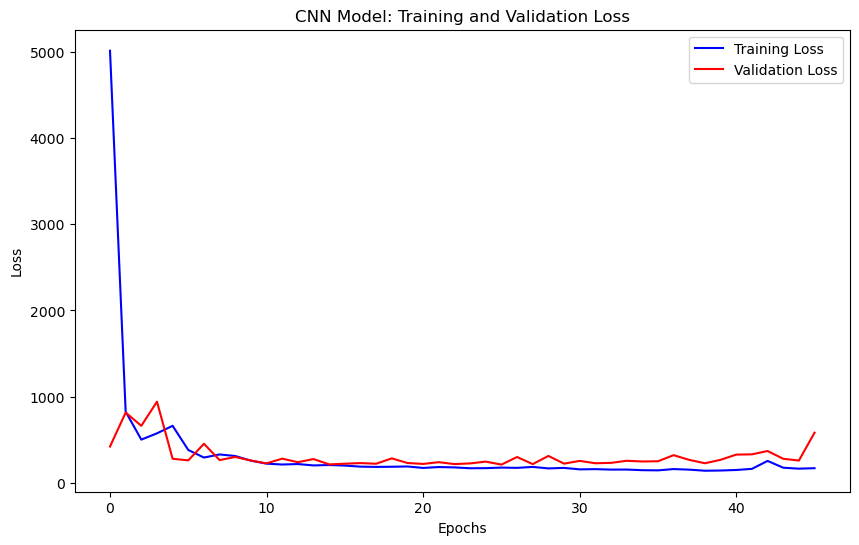

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

CNN Model Evaluation on Unseen Test Set:
Mean Absolute Error (MAE): 12.713065306980594
Mean Squared Error (MSE): 283.264486571853
R-squared (R2): 0.3341818081458823
Explained Variance Score: 0.3776123599639467
Minimum Difference (Predicted - Actual): -32.28681410378064
Maximum Difference (Predicted - Actual): 43.2758530917233
       Actual   Predicted  Difference
0  104.894508  103.264175   -1.630332
1   69.060141   83.504761   14.444620
2  140.377734  108.090919  -32.286814
3   82.788336   89.343407    6.555070
4   65.693558   87.409340   21.715782
5   89.710298   99.419067    9.708770
6   95.133731   79.932800  -15.200931
7   56.332066   66.459251   10.127186
8   70.596145   76.081215    5.485070
9   90.528371   90.188652   -0.339719


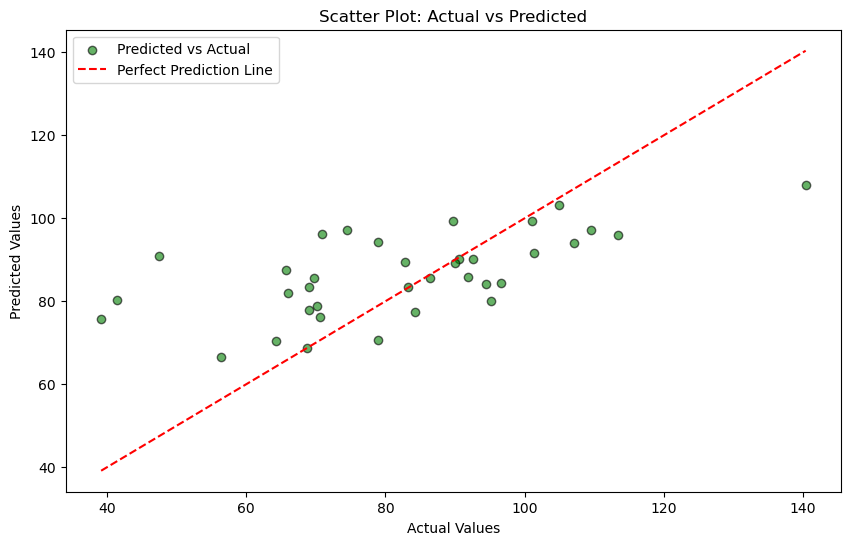

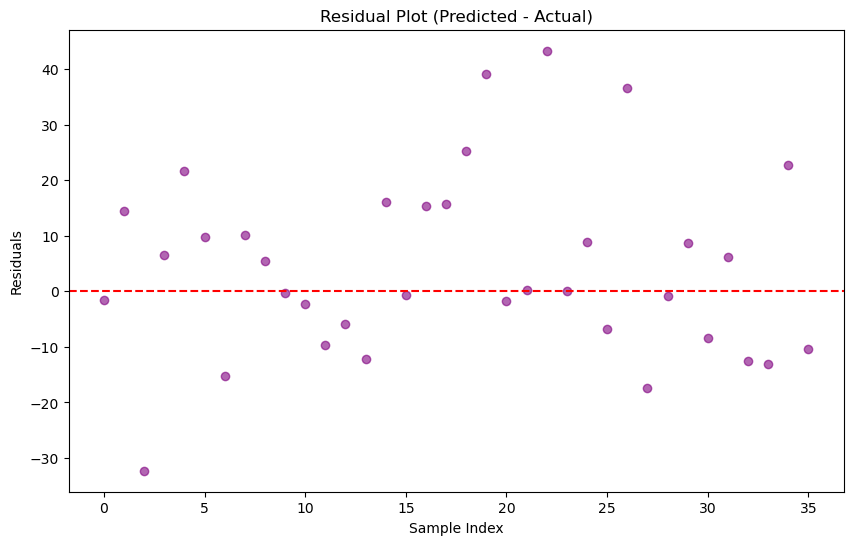

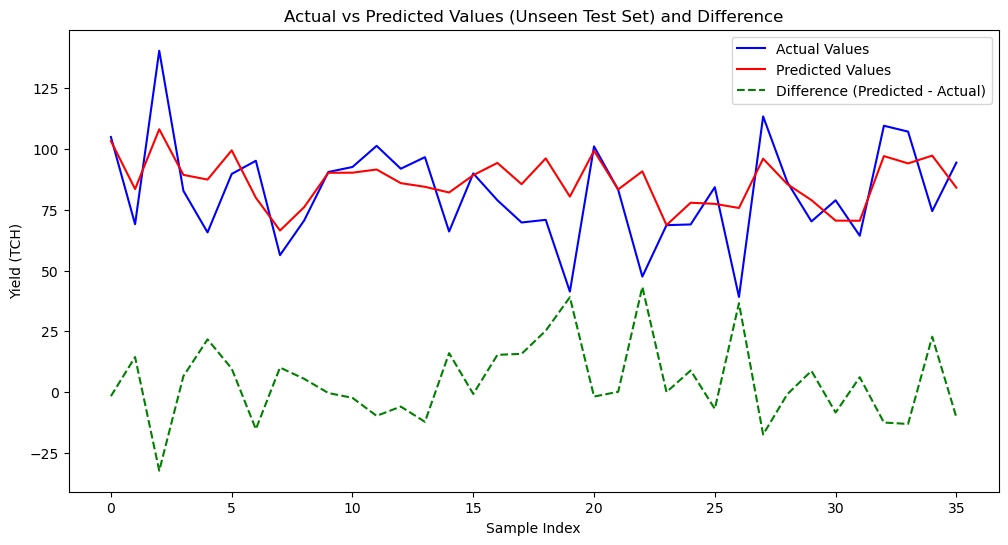

In [115]:
# Import necessary libraries for numerical computation, data visualization, and machine learning
import numpy as np  # Provides support for handling multi-dimensional arrays and performing numerical computations
import matplotlib.pyplot as plt  # Used to create visualizations such as scatter plots, line plots, and residual plots
import pandas as pd  # Provides data structures like DataFrames to efficiently handle and manipulate tabular data

# Import TensorFlow and Keras modules for building and training deep learning models
from tensorflow.keras.models import Sequential  # Sequential class allows linear stacking of layers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, Input  # CNN layers and utilities
from tensorflow.keras.optimizers import Adam  # Adaptive optimizer for efficient gradient-based optimization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks to prevent overfitting and fine-tune learning rate

# Import sklearn modules for data preprocessing and model evaluation
from sklearn.model_selection import train_test_split  # Splits data into training, validation, and test subsets
from sklearn.preprocessing import StandardScaler  # Normalizes features to zero mean and unit variance
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, explained_variance_score)  # Metrics for evaluating regression models

# Import Optuna for hyperparameter tuning
import optuna  # Automated framework to find optimal hyperparameters for models

# Assumptions:
# - X_combined: A 3D array containing input features (shape = [samples, timesteps, features])
# - y: Target variable corresponding to each sample (e.g., crop yield in this case)

# Step 1: Scale features for better convergence during model training
scaler = StandardScaler()  # Initializes a StandardScaler to normalize feature values
# Flatten the last dimension to scale features independently, then reshape to the original 3D structure
X_combined = scaler.fit_transform(X_combined.reshape(-1, X_combined.shape[-1])).reshape(X_combined.shape)

# Step 2: Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_combined, y, test_size=0.2, random_state=42)  
# Splits data into 80% training set and 20% temporary set (used for validation and testing)
# 'random_state' ensures reproducibility of the data split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  
# Further splits the temporary set equally into validation (10%) and test (10%) subsets

# Step 3: Define a function to build a CNN model
def build_cnn_model(X_train, learning_rate=0.001, filters=64, kernel_size=3, batch_size=32, dropout_rate=0.2):
    # Initializes a Sequential model where layers are added one by one
    model = Sequential()
    # Add an input layer specifying the shape of the input data (timesteps, features)
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    # Add a 1D convolutional layer for feature extraction
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))  
    # filters: Number of feature maps generated by the convolution operation
    # kernel_size: Size of the filter sliding over the input data
    # activation='relu': Introduces non-linearity to help the model capture complex patterns
    model.add(MaxPooling1D(pool_size=2))  # Down-samples the input along the temporal dimension by a factor of 2
    model.add(Dropout(dropout_rate))  # Reduces overfitting by randomly deactivating neurons during training
    # Add a second convolutional layer for deeper feature extraction
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))  # Additional down-sampling
    model.add(Dropout(dropout_rate))  # Another dropout layer to improve generalization
    model.add(Flatten())  # Flattens the 3D tensor into a 1D vector for Dense layers
    model.add(Dense(units=1))  # Fully connected layer with a single output neuron for regression
    # Compile the model with the Adam optimizer and Mean Squared Error (MSE) loss function
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model  # Return the compiled model

# Step 4: Define the Optuna objective function for hyperparameter optimization
def objective(trial):
    # Sample hyperparameters for tuning from specified ranges
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)  # Log scale for finer adjustments
    filters = trial.suggest_categorical('filters', [32, 64, 128])  # Number of feature maps to try
    kernel_size = trial.suggest_categorical('kernel_size', [3, 5, 7])  # Width of convolutional filters
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)  # Dropout rate to try (10% to 50%)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])  # Mini-batch sizes for gradient descent
    epochs = trial.suggest_int('epochs', 50, 100)  # Number of training epochs to try

    # Build the CNN model using sampled hyperparameters
    model = build_cnn_model(X_train, learning_rate, filters, kernel_size, batch_size, dropout_rate)

    # Define callbacks for efficient training
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  
    # Stops training if validation loss does not improve for 20 epochs
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)  
    # Reduces learning rate by 20% if validation loss stagnates for 5 epochs

    # Train the model and monitor validation loss
    history = model.fit(
        X_train, y_train,
        epochs=epochs,  
        batch_size=batch_size,  
        validation_data=(X_val, y_val),  
        callbacks=[early_stopping, reduce_lr],  
        verbose=0  # Suppresses training logs for a cleaner output
    )
    return history.history['val_loss'][-1]  # Return the last validation loss for optimization

# Step 5: Perform hyperparameter optimization using Optuna
study = optuna.create_study(direction='minimize')  # Objective is to minimize validation loss
study.optimize(objective, n_trials=20)  # Perform 20 trials to find the best hyperparameters

# Step 6: Train the final model using the best hyperparameters
best_params = study.best_params  # Retrieve the optimal hyperparameters
best_model = build_cnn_model(
    X_train, 
    learning_rate=best_params['learning_rate'], 
    filters=best_params['filters'], 
    kernel_size=best_params['kernel_size'], 
    batch_size=best_params['batch_size'], 
    dropout_rate=best_params['dropout_rate']
)
history = best_model.fit(
    X_train, y_train,
    epochs=best_params['epochs'],  
    batch_size=best_params['batch_size'],  
    validation_data=(X_val, y_val),  
    callbacks=[EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)]  
)

# Step 7: Visualize the training and validation loss curves
plt.figure(figsize=(10, 6))  # Initialize a figure with specified dimensions
plt.plot(history.history['loss'], label='Training Loss', color='blue')  # Plot training loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')  # Plot validation loss over epochs
plt.title('CNN Model: Training and Validation Loss')  # Add a title to the plot
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.legend()  # Display a legend for the plot
plt.show()

# Step 8: Make predictions on the test set
y_pred = best_model.predict(X_test)  # Predict the target values using the trained model

# Step 9: Evaluate the model's performance on unseen test data
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error: Average of absolute prediction errors
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error: Penalizes larger prediction errors
r2 = r2_score(y_test, y_pred)  # R-squared: Proportion of variance explained by the model
explained_var = explained_variance_score(y_test, y_pred)  # Measures how well the model captures variance
min_diff = np.min(y_pred.flatten() - y_test)  # Smallest prediction error
max_diff = np.max(y_pred.flatten() - y_test)  # Largest prediction error

# Print evaluation metrics
print("\nCNN Model Evaluation on Unseen Test Set:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance Score: {explained_var}")
print(f"Minimum Difference (Predicted - Actual): {min_diff}")
print(f"Maximum Difference (Predicted - Actual): {max_diff}")

# Step 10: Create a DataFrame for comparing actual and predicted values
comparison = pd.DataFrame({
    "Actual": y_test,  # Actual target values
    "Predicted": y_pred.flatten(),  # Predicted target values
    "Difference": y_pred.flatten() - y_test  # Prediction errors
})
print(comparison.head(10))  # Display the first 10 rows for quick comparison

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green', edgecolors='k', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction Line")
plt.title('Scatter Plot: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Residual plot to visualize prediction errors
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_pred.flatten() - y_test, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot (Predicted - Actual)")
plt.xlabel("Sample Index")
plt.ylabel("Residuals")
plt.show()

# Line plot to compare Actual vs Predicted values and their differences
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual Values", color='blue')
plt.plot(y_pred, label="Predicted Values", color='red')
plt.plot(y_pred.flatten() - y_test, label="Difference (Predicted - Actual)", color='green', linestyle='--')
plt.title("Actual vs Predicted Values (Unseen Test Set) and Difference")
plt.xlabel("Sample Index")
plt.ylabel("Yield (TCH)")
plt.legend()
plt.show()